In [1]:
import os 
import matplotlib.pyplot as plt
from generate_3d_dataset import *

In [21]:
root_path_car_stl = '/home/turbo/Qian/Triplane/cars/stls/'
root_path_occ_npy = '/home/turbo/Qian/Triplane/cars/npys/'

list_stl_file = os.listdir(root_path_car_stl)
list_stl_file.sort()
print(list_stl_file)

['105a77e198fd243eab07f3d736b6f705.obj', '105a77e198fd243eab07f3d736b6f705_aug.obj', '105a77e198fd243eab07f3d736b6f705_aug_flip.obj', '105a77e198fd243eab07f3d736b6f705_flip.obj', '10716a366de708b8fac96522b26f7fd.obj', '10716a366de708b8fac96522b26f7fd_aug.obj', '10716a366de708b8fac96522b26f7fd_aug_flip.obj', '10716a366de708b8fac96522b26f7fd_flip.obj', '1079efee042629d4ce28f0f1b509eda.obj', '1079efee042629d4ce28f0f1b509eda_aug.obj', '1079efee042629d4ce28f0f1b509eda_aug_flip.obj', '1079efee042629d4ce28f0f1b509eda_flip.obj', '1089cbe82dc0e72133d7c9e122eec9b6.obj', '1089cbe82dc0e72133d7c9e122eec9b6_aug.obj', '1089cbe82dc0e72133d7c9e122eec9b6_aug_flip.obj', '1089cbe82dc0e72133d7c9e122eec9b6_flip.obj', '109567d7d55b8fe515a520abec2f04dd.obj', '109567d7d55b8fe515a520abec2f04dd_aug.obj', '109567d7d55b8fe515a520abec2f04dd_aug_flip.obj', '109567d7d55b8fe515a520abec2f04dd_flip.obj', '1096a3284751db563494893564e07d4a.obj', '1096a3284751db563494893564e07d4a_aug.obj', '1096a3284751db563494893564e07d4a

In [22]:
print(len(list_stl_file))

9896


In [16]:
file = list_stl_file[1]
file.split('.')[0].endswith('aug')

True

In [17]:
cnt = 0
for file in list_stl_file: 
    prefix = file.split('.')[0]
    if prefix.endswith('aug') or prefix.endswith('flip'):
        cnt += 1

In [19]:
9897 - cnt

2475

In [13]:
stl_file = root_path_car_stl + list_stl_file[0]
file_occ_npy = root_path_occ_npy  + list_stl_file[0].split('.')[0] + '.npy'



/home/turbo/Qian/Triplane/cars/npys/DrivAer_F_D_WM_WW_0001.npy


In [12]:
stl_file = "/home/turbo/Qian/Triplane/cars/stls/1a1de15e572e039df085b75b20c2db33_flip.obj"
file_occ_npy = "/home/turbo/Qian/Triplane/cars/npys/test.npy"
count = 5000000
EPSILON = 0.01
generate_volume_dataset(stl_file, file_occ_npy, count, EPSILON)

Loading mesh...
Scaling Parameters:  [3.537597 1.454942 1.3819  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 462049.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4126452.74it/s]


(-1.0982395141749772,
 1.0990898502346085,
 -0.45143859320419,
 0.4519850462180127,
 -0.42866612288382133,
 0.4296465516927745)

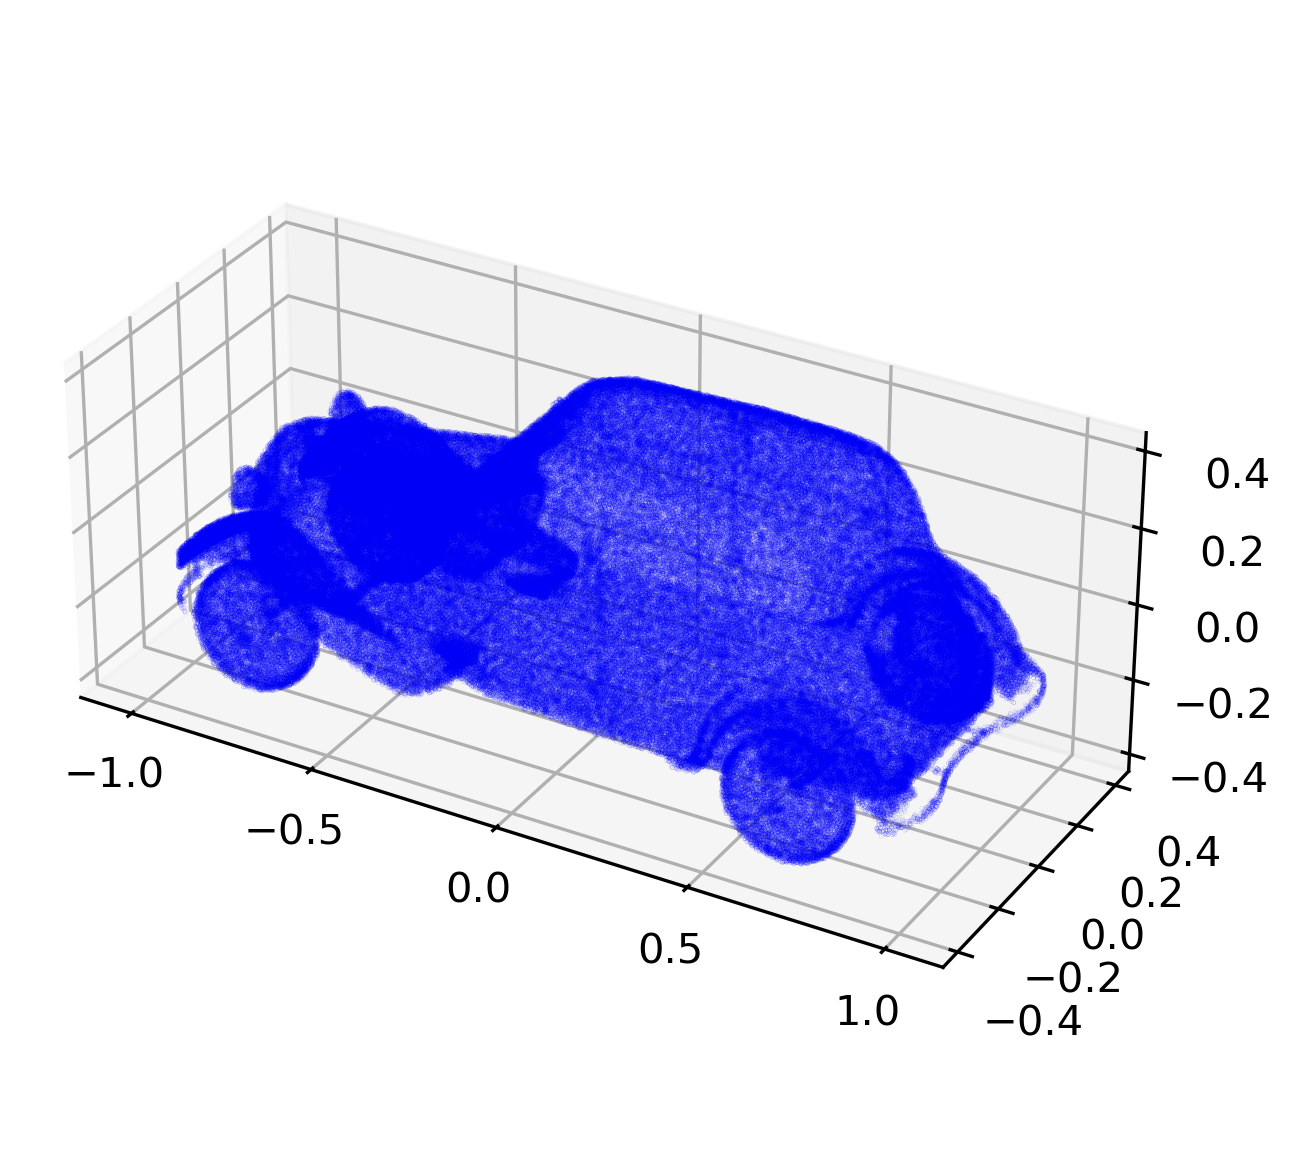

In [13]:
data = np.load(file_occ_npy)

idx_ = np.random.randint(0,data.shape[0]//2, 1000000)
idx = []
for i in idx_: 
    if data[i,-1] == 1: 
        idx.append(i)
idx = np.array(idx)


fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')

ax.scatter(data[idx,0], data[idx,1], data[idx,2], color='b',alpha=0.2,s=0.01)
plt.axis('scaled')

(-1.097882701545127,
 1.0990323409321152,
 -0.49209039575690405,
 0.49277496517690156,
 -0.4287646127322901,
 0.42965097671054764)

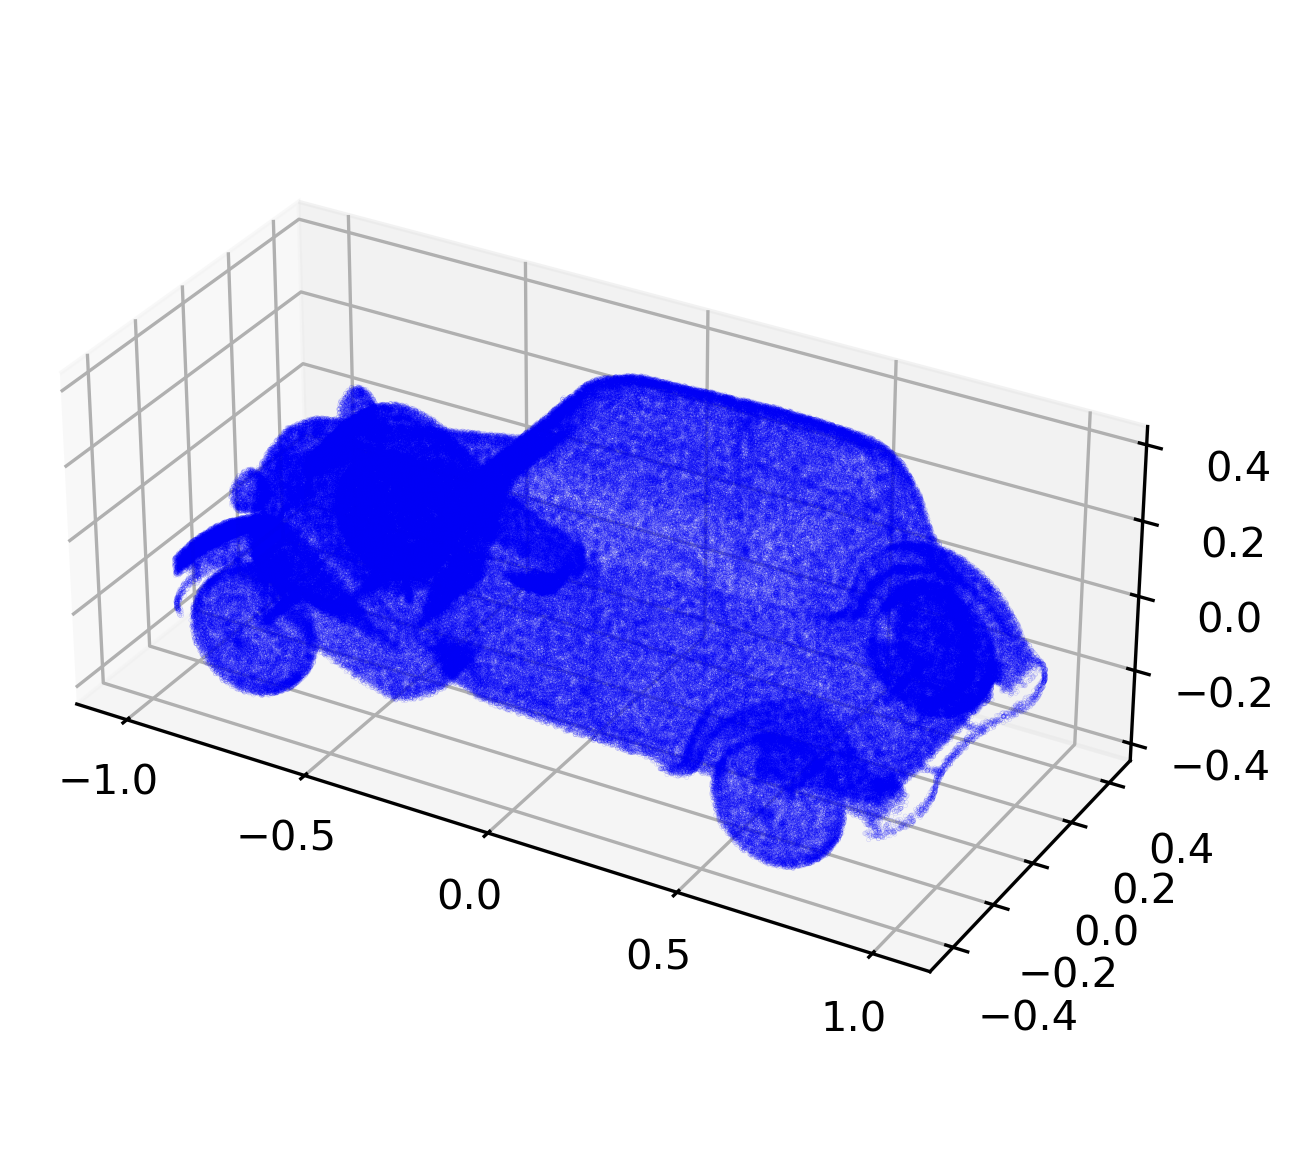

In [9]:
data = np.load(file_occ_npy)

idx_ = np.random.randint(0,data.shape[0]//2, 1000000)
idx = []
for i in idx_: 
    if data[i,-1] == 1: 
        idx.append(i)
idx = np.array(idx)


fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')

ax.scatter(data[idx,0], data[idx,1], data[idx,2], color='b',alpha=0.2,s=0.01)
plt.axis('scaled')

In [23]:
count = 5000000
EPSILON = 0.01
for file in list_stl_file: 
    stl_file = root_path_car_stl + file
    prefix = stl_file.split('.')[0]
    if prefix.endswith('flip') or prefix.endswith('aug'): 
        continue
    print("processing ", stl_file)

    file_occ_npy = root_path_occ_npy  + file.split('.')[0] + '.npy'
    generate_volume_dataset(stl_file, file_occ_npy, count, EPSILON)



processing  /home/turbo/Qian/Triplane/cars/stls/105a77e198fd243eab07f3d736b6f705.obj
Loading mesh...
Scaling Parameters:  [3.539802 1.456822 0.981019]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 401334.40it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4502779.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/10716a366de708b8fac96522b26f7fd.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.495862 0.907355]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 486359.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6023994.41it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1079efee042629d4ce28f0f1b509eda.obj
Loading mesh...
Scaling Parameters:  [3.534162 1.637215 1.063092]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 446230.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4921123.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1089cbe82dc0e72133d7c9e122eec9b6.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.403145 1.092425]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 691010.76it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6466245.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/109567d7d55b8fe515a520abec2f04dd.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.676265 1.321273]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 360826.56it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3810532.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1096a3284751db563494893564e07d4a.obj
Loading mesh...
Scaling Parameters:  [3.539804 1.570087 1.009697]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 601689.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5712897.97it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/10b59082091513b3e66cabd11ba41eae.obj
Loading mesh...
Scaling Parameters:  [3.538984 1.318406 1.053687]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 436272.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5508832.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/10c19d45fed88e6984c322bbb3fe1ad.obj
Loading mesh...
Scaling Parameters:  [3.537316 1.391881 1.091521]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 586685.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6335005.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/10cc4974157f8890c5d97accdeaf9792.obj
Loading mesh...
Scaling Parameters:  [3.5397   1.59265  0.941988]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 486421.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5793229.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/10d388f6f578e4e8851f021b9ed69c58.obj
Loading mesh...
Scaling Parameters:  [3.539199 1.526184 1.084944]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 542193.10it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5395434.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/10de315497dbce1d5d51c15712538c3c.obj
Loading mesh...
Scaling Parameters:  [3.525146 1.54949  1.084251]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 348443.89it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4861598.50it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/10e99b1475098c0aaa69dfdc5532bb13.obj
Loading mesh...
Scaling Parameters:  [3.539362 1.599594 1.249044]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 563100.21it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5133535.69it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/10f158d2f43926ac80360680c1602c7d.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.778127 1.114365]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 347534.22it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2858642.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/10fda5aa525f6232be8100817bfe3c8a.obj
Loading mesh...
Scaling Parameters:  [3.54     1.679729 0.922437]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 400971.21it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4680880.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/112dbe7aec2c6a96436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.537869 1.395953 1.082931]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 459038.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5897759.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/114b662c64caba81bb07f8c2248e54bc.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.50444  1.067997]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 649481.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6704742.17it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1151e7cd24f5bd21ccbd9e5bb82dd04.obj
Loading mesh...
Scaling Parameters:  [3.54     1.639897 1.272766]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 364060.98it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3700195.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1179e37d657c3eb66436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.539775 1.672954 1.392926]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 406558.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3271291.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/119033fe083145e22f31600ac759c763.obj
Loading mesh...
Scaling Parameters:  [3.539576 1.578165 1.039801]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 585766.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6289167.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/119464e186d8ef6f52aa494042b7c9db.obj
Loading mesh...
Scaling Parameters:  [3.460331 1.495399 0.955049]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 447108.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5077433.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/11a3ed3fa7b4b80b6782fc9cb2c37844.obj
Loading mesh...
Scaling Parameters:  [3.538443 1.566108 1.060134]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 546578.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5592960.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/11a96098620b2ebac2f9fb5458a091d1.obj
Loading mesh...
Scaling Parameters:  [3.538893 1.360148 1.060227]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 562810.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6506526.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/11d1fdaedf3ab83b8fb28f8a689c8ba3.obj
Loading mesh...
Scaling Parameters:  [3.539381 1.527371 1.100121]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 499449.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5383417.48it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/11d3ec621322ca723c35e65001c8c258.obj
Loading mesh...
Scaling Parameters:  [3.535331 1.71259  1.136368]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 396594.89it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3720426.74it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/11ed2151cc752a548958855d2c5465cf.obj
Loading mesh...
Scaling Parameters:  [3.538254 1.50889  1.057734]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 616714.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6468231.97it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1213742aa7815fd0e23d60a1b706b44f.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.639052 0.93083 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 445196.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4908833.86it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/12243301d1c8148e33d7c9e122eec9b6.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.403145 1.092425]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 597611.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6627614.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/125a4780c2d5095d19454008aa267bf.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.433213 1.473431]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 682429.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5430092.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/125be09e498dcfde55048eb8b7ed14b6.obj
Loading mesh...
Scaling Parameters:  [3.539182 1.60281  1.057353]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 432614.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4633664.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/126ab047e114433f1dd25374e2be795.obj
Loading mesh...
Scaling Parameters:  [3.538548 1.831134 1.520344]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 369470.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2620909.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/12711a683ffb81bad536c1ebda275556.obj
Loading mesh...
Scaling Parameters:  [3.517859 1.273066 0.682107]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 434589.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8511509.95it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/127435fd1a61550887dc1da2515df8f7.obj
Loading mesh...
Scaling Parameters:  [3.539043 1.711962 1.335516]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 552949.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4841093.45it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/127b9ba77b54ba59bda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.649923 1.287534]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 641535.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5483696.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1284876ac0e2371aa4dbb766064f8bbf.obj
Loading mesh...
Scaling Parameters:  [3.539604 1.478368 0.981258]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 498671.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5980109.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/128ad72f92a3e96db96212c8f6cd06e.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.662898 1.307241]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 555849.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4543520.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/12941cb870df79b9815337ac44abb964.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.417144 1.253831]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 758288.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6107524.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/129a2c9a2d2f13ec2876b98c07c9251.obj
Loading mesh...
Scaling Parameters:  [3.535724 1.004955 0.949846]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 554951.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8805966.80it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/12a034b6be9afb50ae983613a2e0a741.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.693924 1.089803]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 537203.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5551544.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/12a0dcc66c989decb915e7c6dfc74ab.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.80513  1.302903]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 398917.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3125007.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/12a11a800f6869d99ea5c205086e2a63.obj
Loading mesh...
Scaling Parameters:  [3.539182 1.672625 1.406672]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 582685.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4212857.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/12a445770f7d6f2b70a43c2d978e502e.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.440096 0.859342]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 434494.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6730247.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/12b5e4f52c22b348d8499d8846cb4c3b.obj
Loading mesh...
Scaling Parameters:  [3.539084 1.366191 0.972813]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 447253.29it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5560132.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/12cd99c20b1a5a932e877e82c90c24d.obj
Loading mesh...
Scaling Parameters:  [3.538451 1.753659 1.188658]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 306740.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3504082.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/12d463649ed6c176ab98a7077c964a60.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.462527 1.024255]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 698746.89it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6532863.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/12d7c4013415ea147f5b0cb87a91de52.obj
Loading mesh...
Scaling Parameters:  [3.538643 1.312458 0.979714]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 726160.19it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7529421.90it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/130b1d8d6ded598ef2cdad303f49c9f9.obj
Loading mesh...
Scaling Parameters:  [3.53835  1.590809 1.109141]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 414720.29it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4706426.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1313f9ebc319271b532fe10b91889f2b.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.297766 0.982749]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 620392.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7480851.55it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/1328a95d69cefe32f200a72c9245aee7.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.68483  1.02718 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 394741.19it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5383139.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/13353d601c189244c23a72fe560e6753.obj
Loading mesh...
Scaling Parameters:  [3.501408 1.29684  1.271109]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 559966.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5647857.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/135e6c63ca10dd9fab711dc2dd9249b0.obj
Loading mesh...
Scaling Parameters:  [3.54     1.486314 1.40729 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 431554.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4013036.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/136b0793373b1fc9e9d8921ebe6d5b8e.obj
Loading mesh...
Scaling Parameters:  [3.539461 1.492324 1.419501]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 316889.19it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2706674.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/139718b631cbca546a36136419d55d5c.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.642554 0.926279]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 472611.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5723240.52it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/13f816dcec3f6363f7e74112dde4b19b.obj
Loading mesh...
Scaling Parameters:  [3.539844 1.646307 1.346952]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 633941.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4935983.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1466b91f01aafba9ed3696d854eee1ec.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.580289 1.060777]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 442357.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5558389.84it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/147889b73fa491d82e877e82c90c24d.obj
Loading mesh...
Scaling Parameters:  [3.531394 1.50332  1.109152]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 457437.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5786581.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/147eca8afd2d3da291a714d137f7e052.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.414591 1.108253]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 681964.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6292703.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/149978eefad83cbafd8e7b05498794b9.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.482762 1.088909]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 343255.59it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4490097.00it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/14ace3e8d05f8d21a413908c0e169330.obj
Loading mesh...
Scaling Parameters:  [3.539885 1.553433 0.928614]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 649202.62it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6502474.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/14caf086a8cbf59f709a6634bf501a9e.obj
Loading mesh...
Scaling Parameters:  [3.538283 1.582488 1.044116]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 456849.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5170948.87it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/14d47aa57151ae4baa93570ec0c0afff.obj
Loading mesh...
Scaling Parameters:  [3.54     1.846732 1.056949]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 552479.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5008602.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/15189ac0d9a6364819d0b04fbc21ff71.obj
Loading mesh...
Scaling Parameters:  [3.538871 1.609175 1.316081]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 625949.96it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5518276.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/151bebc457224c2733d7c9e122eec9b6.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.402591 1.091513]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 505198.23it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6208534.04it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1520d7ab01b96a4d2f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.524983 0.948817]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 679334.29it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6364511.84it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1523461a96bcc90668c415156b102065.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.690733 0.871421]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 340183.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4381903.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1525d96ab2b75980aaa232d0915adae9.obj
Loading mesh...
Scaling Parameters:  [3.539833 1.414568 0.971645]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 405156.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5719281.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/152606cff5186001a544a2e1f78203c4.obj
Loading mesh...
Scaling Parameters:  [3.53914  1.635118 1.06546 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 356432.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3108266.97it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/154028cc3c2b4846436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.538526 1.601196 0.941968]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 416639.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4733853.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1548f5fb0684d08c63155b8ebc275bd1.obj
Loading mesh...
Scaling Parameters:  [3.539668 1.544835 1.51087 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 607512.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4486072.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/155066e1f87017c36e966db738361973.obj
Loading mesh...
Scaling Parameters:  [3.539591 1.455443 1.453095]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 375385.91it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3464384.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/155cf95c37a3c2c01edf5a868fdffb8d.obj
Loading mesh...
Scaling Parameters:  [3.538016 1.488472 1.014976]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 496441.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6110736.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1568c41e013b0900fc82e75321e09f82.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.579227 0.904901]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 548760.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5926631.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/156d4748560997c9a848f24544821b25.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.419675 1.111446]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 505229.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6139203.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/158a95b4da25aa1fa37f3fc191551700.obj
Loading mesh...
Scaling Parameters:  [3.539767 1.457875 1.097165]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 542563.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6362576.08it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/158bf7ce06fbc9eccc0129454ac351ce.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.499716 1.110353]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 509808.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5803736.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/15a5e859e0de30e2afe1d4530f4c6e24.obj
Loading mesh...
Scaling Parameters:  [3.539893 1.736261 1.710903]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 397919.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2486791.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/15bdc3b07627ea2f6dca8796028a1679.obj
Loading mesh...
Scaling Parameters:  [3.538956 1.318372 1.07081 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 625706.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6419871.08it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/15c785a7505992c3a9be8fd09fb14f4f.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.503771 0.9929  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 455741.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6749670.00it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/15cc37ac9b3b756acfd826dd468a5497.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.61565  1.155226]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 400085.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4902180.02it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/15d37c9fdde15a3e433084df759e05b.obj
Loading mesh...
Scaling Parameters:  [3.539084 1.578044 1.113094]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 526951.39it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5750164.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/15d6cd7877c6601d9ed410a010efa019.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.61343  1.255455]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 503548.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5191577.48it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/15fcfe91d44c0e15e5c9256f048d92d2.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.775822 0.999153]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 785279.49it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7120992.93it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/161174665f7d1ed7b4f87c42b345834.obj
Loading mesh...
Scaling Parameters:  [3.539888 1.646685 1.131121]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 430853.92it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5528242.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1621d63a7efe0ba25df3c6413d40ccb2.obj
Loading mesh...
Scaling Parameters:  [3.538623 1.637653 0.911358]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 527957.67it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5502990.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/164ca4824dd241545fcb05674109534a.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.600461 0.972904]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 390182.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5688400.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/164f9c44717d6cf1dc6ccb06c589ae6a.obj
Loading mesh...
Scaling Parameters:  [3.539588 1.783808 1.129716]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 307905.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3587067.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/165aec174bb93968a114c8c036e29a08.obj
Loading mesh...
Scaling Parameters:  [3.538899 1.3217   1.025116]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 316537.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5871612.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/165e03c012cb5b6c3bb4d660359dfc5.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.577475 1.141607]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 655212.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5716997.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/167df2c10c116eb5d61b6a34f3fd808c.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.236034 0.933683]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 611992.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7178134.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1687b77b048d1aaf635b88185c42637a.obj
Loading mesh...
Scaling Parameters:  [3.537249 1.592314 1.106215]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 550338.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5524780.18it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/16af2ec5b985f475d5e91f1b79ff5afc.obj
Loading mesh...
Scaling Parameters:  [3.54     1.679859 0.876565]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 390704.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5001077.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/16b8c04d29bb4c36b11647ffa4306609.obj
Loading mesh...
Scaling Parameters:  [3.537916 1.475349 1.06431 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 341941.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4256616.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/16bcbdca2d5911e782dca60c5dad9210.obj
Loading mesh...
Scaling Parameters:  [3.537769 1.761583 0.905879]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 539829.92it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5833828.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/16cb7990169197465c46d8051f2293ec.obj
Loading mesh...
Scaling Parameters:  [3.538464 1.634613 1.01573 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 382211.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4313796.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/16cd3253d5f9967165b633b6461ff32a.obj
Loading mesh...
Scaling Parameters:  [3.52013  1.916336 0.965981]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 465826.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4113576.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/16d214c9243bc61d25ca48e6a6faa909.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.65597  1.092913]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 750890.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6871531.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1713a1ac8aedcc522b12ea83455b0f44.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.577649 1.446071]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 540224.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4923845.58it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1714b6e57c8c4983fb1aad5dae793ff4.obj
Loading mesh...
Scaling Parameters:  [3.538296 1.525121 1.256626]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 580674.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5339914.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/171c20ce4de5ee8730f65ce13e7c1910.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.822703 0.933754]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 542296.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6156236.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/175a289947f549b0e088606e38104b2.obj
Loading mesh...
Scaling Parameters:  [3.53879  1.595931 1.023485]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 634715.29it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6567314.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/17600a4881b1ff6a5c14de0cb75f4d3e.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.680371 0.953358]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 421524.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5483974.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1768f55a3c29cd483337cb9d908ce86e.obj
Loading mesh...
Scaling Parameters:  [3.539691 1.595253 1.367119]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 449070.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4233103.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1778fb4a8eebe3b7a3018bac44737f2c.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.51034  1.063597]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 479980.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5287476.56it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1782558e47730989b96212c8f6cd06e.obj
Loading mesh...
Scaling Parameters:  [3.538679 1.617398 1.11572 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 543902.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5741950.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/178382bfcc33146dd141480e2c154d3.obj
Loading mesh...
Scaling Parameters:  [3.539689 1.614753 1.404025]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 471996.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3992092.54it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/17a5e57aaa824d85becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.313597 1.028058]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 520665.42it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6262319.00it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/17ac544cdfbf74b999c8924280047dd9.obj
Loading mesh...
Scaling Parameters:  [3.57076  1.508984 0.98624 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 438238.56it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4399464.21it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/17b74ace5d2791eeab7ec554b18515bb.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.621801 1.252198]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 493565.75it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4592677.43it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/17d3fe6fcaa66dc75bdece2095ceb985.obj
Loading mesh...
Scaling Parameters:  [3.539506 1.670146 1.0594  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 395491.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3513691.43it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/17e146cb10c72fcfa2b80c598d71bf14.obj
Loading mesh...
Scaling Parameters:  [3.539893 1.913667 1.454532]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 308775.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2058213.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/17eb10ccad874213becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.548307 1.199033]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 432473.42it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5007191.50it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/17f89c25a3142ee09d2b99af43da16b3.obj
Loading mesh...
Scaling Parameters:  [3.533463 1.387824 1.024837]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 452111.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6289403.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/18244d93dbd2afbebda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.53352  1.395549 1.142121]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 460164.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5213947.48it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/185059ee821245d176fb25377c3b547e.obj
Loading mesh...
Scaling Parameters:  [3.539564 1.525927 0.963098]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 379978.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4435895.04it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/187b002f0af1ab5a473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.593403 1.097498]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 400968.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5121716.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1883101d1c9f911aecf12ada05e4378c.obj
Loading mesh...
Scaling Parameters:  [3.54     1.432156 1.020977]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 471540.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5359721.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/188cf79b4c27bb8fef46cffe4939fce1.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.635031 1.340515]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 296191.29it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2402989.48it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/18927999d0c5a9687ba2618ede0d52ff.obj
Loading mesh...
Scaling Parameters:  [3.539499 1.531947 1.105884]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 318398.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3235963.03it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1897d39147b57221cd782e2b2753093.obj
Loading mesh...
Scaling Parameters:  [3.538662 1.567976 1.105214]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 651355.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6078404.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/189cffefcdd5cb071a126804ae24042.obj
Loading mesh...
Scaling Parameters:  [3.54     1.103114 0.896657]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 875118.17it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9417360.46it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/18a9275b78be4b9ec6d3267fc5334296.obj
Loading mesh...
Scaling Parameters:  [3.54     1.526004 1.096575]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 517087.01it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5716132.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/18aad9d102afbca57ba2273581c30cb.obj
Loading mesh...
Scaling Parameters:  [3.537827 1.421049 1.062447]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 789951.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6875713.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/18caf44713ee788b9313122d0e2587c6.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.515435 1.371744]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 291672.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2373114.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/18d1daf9f7a16d47d3a5e3d474de9eab.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.690733 0.871421]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 432890.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5825046.02it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/18d9ac72442260e0e97c6bb243ef67d.obj
Loading mesh...
Scaling Parameters:  [3.53953  1.471244 0.970712]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 608532.10it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6710301.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/18f8bf29257b7acf1d1a964dea8a7aab.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.439731 1.006418]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 460748.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6200542.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/19186a0accbf7c68ef7b860bd772a37.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.440953 1.002882]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 572183.89it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7198699.04it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/191f9cd970e5b0cc174ee7ebab9d8065.obj
Loading mesh...
Scaling Parameters:  [3.54     1.318879 0.907197]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 630284.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8004118.18it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/192182fe7a2992d19007ca45ff59e833.obj
Loading mesh...
Scaling Parameters:  [3.53897  1.789874 1.108606]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 351490.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3360566.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/192fdf42f5a2623d673ddeabdcc8c6e.obj
Loading mesh...
Scaling Parameters:  [3.54     1.557903 1.192925]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 384887.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4785958.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/193ec1089f0a98a36518e6cd1fbc5fab.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.488958 1.074768]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 637781.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6645947.52it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/19483d3b574b49a5742cc2d61ad88fbd.obj
Loading mesh...
Scaling Parameters:  [3.54     1.679859 0.876565]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 404544.91it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5342580.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/19541db644551287ee0112963a7e11e3.obj
Loading mesh...
Scaling Parameters:  [3.53935  1.63793  0.882361]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 307386.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4116496.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1963641a15916c03709ce7955adef61b.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.668055 1.094801]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 409521.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3853670.37it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1964ce6c225fb1a5994a3466f8481f8a.obj
Loading mesh...
Scaling Parameters:  [3.537492 1.740913 0.731045]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 624993.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8224883.47it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/196b1fb2c6c36fa5afe1d4530f4c6e24.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.502415 0.919491]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 605994.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6675994.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/198d8e274c59511b36a1a31af8f59.obj
Loading mesh...
Scaling Parameters:  [3.535653 1.40598  0.932917]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 689982.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7634644.83it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/198f9bc1c351c97948c9215ea29b906f.obj
Loading mesh...
Scaling Parameters:  [3.538162 1.58939  1.084875]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 452568.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4962799.74it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/19b0d347716db767b6f4ab48e881f088.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.489622 1.008584]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 562963.56it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6157364.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/19bb8605a7a5233e4d7ac55d461d1984.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.556802 1.05116 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 343069.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4481096.41it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/19c25429d34ce9748c844a5e3a5e1a93.obj
Loading mesh...
Scaling Parameters:  [3.539954 0.981616 0.809558]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 757396.21it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 10885714.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/19d0843797b8b2216abce8cb03e7794.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.554348 1.087672]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 409901.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4855083.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/19d35f3e0c0b402125ddb89f02fe6cc0.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.456654 1.088539]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 558559.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6929409.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/19d49c8015948b742d60c8689a64d7a0.obj
Loading mesh...
Scaling Parameters:  [3.535048 1.635584 1.348802]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 412158.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4784682.37it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/19f52dd4592c3fb5531e940de4b7770d.obj
Loading mesh...
Scaling Parameters:  [3.54     1.559563 1.0705  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 478007.64it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5838764.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1a0bc9ab92c915167ae33d942430658c.obj
Loading mesh...
Scaling Parameters:  [3.539818 1.754659 1.157942]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 635792.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5649927.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1a19271683597db4fe7e6f8a8e38f62d.obj
Loading mesh...
Scaling Parameters:  [3.537775 1.180272 1.20713 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 390754.98it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6387490.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1a1de15e572e039df085b75b20c2db33.obj
Loading mesh...
Scaling Parameters:  [3.537597 1.454942 1.3819  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 472110.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4552449.78it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1a3782ae4bd711b66b418c7d9fedcaa9.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.267466 1.058777]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 776309.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7203514.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1a4337da899da1936909632a947fc19b.obj
Loading mesh...
Scaling Parameters:  [3.538214 1.614043 0.782216]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 620866.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7358124.71it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/1a63a260180f11baafe717997470b28d.obj
Loading mesh...
Scaling Parameters:  [3.535964 1.492977 1.052539]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 523629.67it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6120263.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1a64bf1e658652ddb11647ffa4306609.obj
Loading mesh...
Scaling Parameters:  [3.539373 1.664507 1.296001]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 412153.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4009231.84it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1a7584ca6cbf03e41c35d6e6d8a2eb84.obj
Loading mesh...
Scaling Parameters:  [3.538578 2.032874 1.189841]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 491068.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4211169.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1a7b9697be903334b99755e16c4a9d21.obj
Loading mesh...
Scaling Parameters:  [3.537915 1.602922 1.033578]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 413233.22it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5068332.95it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1a83a525ae32afcf622ac2f50deaba1f.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.311556 0.994478]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 550290.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7324174.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1a87a329781b15763820d8f180caa23a.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.423864 0.90819 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 390598.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5866469.17it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1ab80bc91a45b7d0a31091d2234b9f68.obj
Loading mesh...
Scaling Parameters:  [3.539707 1.872891 1.625574]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 500097.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2578224.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1abeca7159db7ed9f200a72c9245aee7.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.528518 1.069563]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 355533.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4605002.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1ac8b8c486a77dbc65db4f1fb47e0c1d.obj
Loading mesh...
Scaling Parameters:  [3.54     1.362895 1.068367]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 602112.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7209972.21it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1ad321f067ffbe7e51a95aaa6caba1d3.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.603806 1.483996]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 388248.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3575765.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1ad84ebe2ab289c2ccab858630bb6357.obj
Loading mesh...
Scaling Parameters:  [3.493236 1.48052  0.949039]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 440012.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5728645.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1ae530f49a914595b491214a0cc2380.obj
Loading mesh...
Scaling Parameters:  [3.538707 1.494949 1.208489]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 687714.75it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6133682.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1aeee7288b89ec1cc805dfe4ca9f2fdb.obj
Loading mesh...
Scaling Parameters:  [3.53825  1.295077 0.991551]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 617218.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7792066.84it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/1aef0af3cdafb118c6a40bdf315062da.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.516619 0.931583]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 460309.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5789487.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1b1a7af332f8f154487edd538b3d83f6.obj
Loading mesh...
Scaling Parameters:  [3.52412  1.570285 0.961946]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 384003.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5249136.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1b25c745164e53b822d2fb8fec68f2a1.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.711435 0.923933]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 489689.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5453320.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1b2dc43f22ea46013ae58a4b81f41be1.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.567426 1.027056]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 551634.98it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5833080.17it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1b2ef0809ca1abc7ca92a4cdad802b45.obj
Loading mesh...
Scaling Parameters:  [3.538596 1.610304 0.985408]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 442814.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6120786.29it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1b2fb48dfc17b3c0c07426ce19bca2e.obj
Loading mesh...
Scaling Parameters:  [3.53913  1.621725 1.159551]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 494172.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5204976.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1b318e41d5143e7a33ae101d4377190c.obj
Loading mesh...
Scaling Parameters:  [3.539905 1.191223 0.777685]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 634854.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8829723.32it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/1b43ec15ddae61b62c6ff27a52f05cff.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.593688 0.905964]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 566368.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6563003.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1b83d1d3554d04906a34aa94ca8a3355.obj
Loading mesh...
Scaling Parameters:  [3.53975  1.457454 1.060837]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 496789.92it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6427288.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1b85c850cb4b93a6e9415adaaf77fdbf.obj
Loading mesh...
Scaling Parameters:  [3.539556 1.67148  1.177547]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 527876.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4999645.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1b94aad142e6c2b8af9f38a1ee687286.obj
Loading mesh...
Scaling Parameters:  [3.539802 1.454649 1.008975]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 310276.14it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4385464.19it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1ba30d64da90ea05283ffcfc40c29975.obj
Loading mesh...
Scaling Parameters:  [3.538857 1.76752  0.939568]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 542605.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5008584.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1be075751d7cfbf9ee8e9bd690a19ec1.obj
Loading mesh...
Scaling Parameters:  [3.538549 1.831134 1.520344]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 364050.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2661407.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1be81460e620aea65cde8c99e4b182f9.obj
Loading mesh...
Scaling Parameters:  [3.526099 2.11652  0.864886]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 558651.75it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5400785.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1beac5e41e17b680fade9f69c520312a.obj
Loading mesh...
Scaling Parameters:  [3.538849 1.674844 1.596922]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 564525.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3708230.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1c14ef4c48b7d95d61c6c61410fc904b.obj
Loading mesh...
Scaling Parameters:  [3.539088 1.412727 0.951607]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 534167.51it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6097069.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1c158fc218e27a60b11647ffa4306609.obj
Loading mesh...
Scaling Parameters:  [3.539872 1.646568 1.090099]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 422411.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5443579.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1c1bd2dcbb13aa5a6b652ed61c4ad126.obj
Loading mesh...
Scaling Parameters:  [3.538564 1.47293  1.264826]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 525884.22it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4733055.92it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1c3d0cfb621e45fbf8e4e0fd40d76860.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.470363 0.938514]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 403599.56it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6815598.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1c3d657de143e3c4bbb53134d8c41892.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.363109 1.08524 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 540442.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6704412.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1c4590ebc214e029816bd8f64e08b2bc.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.435328 1.067104]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 827268.58it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7203950.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1c4f6c884a2132903c35e65001c8c258.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.64935  1.073098]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 592710.54it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5392945.45it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1c53bc6a3992b0843677ee89898ae463.obj
Loading mesh...
Scaling Parameters:  [3.537771 1.761691 0.892131]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 590461.65it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6178292.84it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1c5a350ea0f55f793fbce9ec40e1f047.obj
Loading mesh...
Scaling Parameters:  [3.539226 1.542811 1.164195]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 739694.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6391203.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1c6627e55a840dac5b50bb0532f2ede.obj
Loading mesh...
Scaling Parameters:  [3.288585 2.211632 1.769144]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 398542.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2255315.29it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1c66dbe15a6be89a7bfe055aeab68431.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.726966 1.060007]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 403639.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4857651.54it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1c7241615911ae97469ddcfc2663669e.obj
Loading mesh...
Scaling Parameters:  [3.539606 1.382748 1.029867]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 505127.05it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7007903.79it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1c86d4441f5f38d552c4c70ef22e33be.obj
Loading mesh...
Scaling Parameters:  [3.539363 1.707644 1.127832]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 421102.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4304195.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1c9725db9005eda1aaa354fd606bff0.obj
Loading mesh...
Scaling Parameters:  [3.53662  1.405789 0.859693]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 686382.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7987739.31it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/1ca64f9d6e008fb35fcb05674109534a.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.553911 1.030246]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 320856.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4700981.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1cb095eaa6564806b8cf782e8c539948.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.554872 1.111442]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 479298.76it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5844638.50it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1cd4a2c1b3b4a9661487189ebf835715.obj
Loading mesh...
Scaling Parameters:  [3.539364 1.585907 1.025402]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 336217.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3454358.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1cd50bde9a3e711637b0898eccd7168.obj
Loading mesh...
Scaling Parameters:  [3.539154 1.45818  1.091359]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 663521.65it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6397430.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1cd6320c2778a0587f9f7271076cbfc3.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.562842 1.032673]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 489427.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6041056.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1cda44fbcc6757d9becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.395466 1.178144]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 598474.96it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5995543.69it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1cf14b4004e1d2e22c6ce678c9114ba5.obj
Loading mesh...
Scaling Parameters:  [3.539895 1.530921 1.634491]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 324974.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2369602.03it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1cf3a0122ae9d45afe58aa5d5c441132.obj
Loading mesh...
Scaling Parameters:  [3.53652  1.611595 0.832274]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 590796.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6684621.19it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1cff510c0630c3cc673ddeabdcc8c6e.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.516172 1.27959 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 694283.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5396175.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1d0a46cfc2799eefdeea60824a43a0b.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.486636 1.124893]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 377787.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5618522.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1d2c5ee3b5ef205164bd4e0c23ded276.obj
Loading mesh...
Scaling Parameters:  [3.536358 1.413273 1.066512]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 524114.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6548330.64it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1d343a64b4789983c10e9d4ee4bae4f4.obj
Loading mesh...
Scaling Parameters:  [3.533881 1.506201 1.550435]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 456965.10it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3493172.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1d4b2404a00ef4bb627014ff98c41eb1.obj
Loading mesh...
Scaling Parameters:  [3.539321 1.53567  1.1435  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 413819.36it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4315056.54it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1d4eaafea3ae8303ce94fde2d6224f79.obj
Loading mesh...
Scaling Parameters:  [3.539881 1.429075 1.03856 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 858108.12it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7995623.12it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/1d549e9c44773cb3aa69edcaeea3d6af.obj
Loading mesh...
Scaling Parameters:  [3.539126 1.481784 1.093202]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 484464.36it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5891559.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1d55c91c862fad6ff96205b49d430ba4.obj
Loading mesh...
Scaling Parameters:  [3.538278 1.596713 1.059345]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 648855.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6670633.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1d5872004edf12038644d87f4c93cda7.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.587933 0.996263]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 306128.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5670188.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1d7fd8ff8d68f74ce3ccef60655d5f2d.obj
Loading mesh...
Scaling Parameters:  [3.539718 1.521823 1.089544]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 787833.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7364788.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1d82316d98f620513b86a9df4269733.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.290018 1.043235]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 687971.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6706438.69it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1da433472693082a3b03cab05e253d9.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.763487 0.96305 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 487536.21it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5287339.92it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1dbb02c20bb93af81c1b3b2ed8d13bf8.obj
Loading mesh...
Scaling Parameters:  [3.537614 1.694435 0.96124 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 435705.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5806786.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1dbb24dedcb23beab1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.539541 1.727029 1.121942]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:14<00:03, 279553.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2402876.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1dc08fb398ba1b389b63159808b36877.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.548662 1.098947]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 392550.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5136554.92it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1dc757e77f3cfad0253c03b7df20edd5.obj
Loading mesh...
Scaling Parameters:  [3.538967 1.655524 1.33878 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 469085.96it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4488534.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1dd6eb41ad5a1267bda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.536692 1.264194 1.167993]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 667103.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7320406.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1e17510abe8f98bea697d949e28d773c.obj
Loading mesh...
Scaling Parameters:  [3.539433 1.566852 1.519095]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 505053.21it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4061690.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1e4976203d1dc1887eaeab1f0c9120b7.obj
Loading mesh...
Scaling Parameters:  [3.5398   1.578698 1.045907]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 422031.62it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5056495.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1e58b82b7c7c93b3e3e80cf56a92a302.obj
Loading mesh...
Scaling Parameters:  [3.54     1.642708 1.236972]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 618613.76it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5293155.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1e6e7bfb08b6b44d615949fb78ffe44f.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.475591 1.317834]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 424737.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4485343.35it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1e8e92f8b3192f4515ceb5e63caaf714.obj
Loading mesh...
Scaling Parameters:  [3.539501 1.514508 1.042463]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 503238.84it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6006026.35it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1eae4fcec701c176e742b0b5e87bec54.obj
Loading mesh...
Scaling Parameters:  [3.539752 1.571056 1.33859 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 612149.42it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5359204.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1ebb7511feac4d62381a9e1cee6d0b00.obj
Loading mesh...
Scaling Parameters:  [3.538874 1.511444 1.085899]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 427042.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5285530.93it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1ed012d3232de232473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.347103 1.086662]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 531213.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6299612.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1ed1a74a5e70539e280b225afd3dc9fd.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.529347 1.18543 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 482466.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5479169.17it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1ef1be2d62d35937f3efc94c2d31dc5.obj
Loading mesh...
Scaling Parameters:  [3.538618 1.470729 1.044184]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 534852.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6238012.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1ef2d722d005fb46892a3ef1aeeb86fa.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.48811  1.048201]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 339038.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4685581.35it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1ef773413c60acba6ca2b6e5474aad11.obj
Loading mesh...
Scaling Parameters:  [3.539492 1.494594 1.598639]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 429202.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3219080.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1ef8f98842f2a388a4dbb766064f8bbf.obj
Loading mesh...
Scaling Parameters:  [3.539769 1.514079 1.070242]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 302231.91it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5258412.03it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1f04bbab96c75a7572152988eac576ab.obj
Loading mesh...
Scaling Parameters:  [3.539437 1.598892 1.291613]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 415482.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3701372.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1f0d149b320aa4faafe1d4530f4c6e24.obj
Loading mesh...
Scaling Parameters:  [3.538113 1.739396 1.045355]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 294973.96it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2713499.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1f167c74bca9ec83622a8f038ee88042.obj
Loading mesh...
Scaling Parameters:  [3.538399 1.655128 0.859144]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 313519.75it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4760776.95it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1f191e0327ce54474cdd04162f008888.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.584676 1.097771]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 577604.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5828998.56it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1f1b5c7c01557c484354740e038a7994.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.544229 1.248122]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 301900.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2705732.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1f2346c860def4345a70c4e5328e0b9f.obj
Loading mesh...
Scaling Parameters:  [3.539779 1.633558 1.091337]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 493949.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5951222.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1f43243b81df21277925d1ea63246010.obj
Loading mesh...
Scaling Parameters:  [3.537202 1.580418 0.973669]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 450248.36it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5195630.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1f5a6d3c74f32053b6163196882ac0ca.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.430135 0.983529]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 341904.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4452860.46it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1f5e1b0661b340fc81dcc09cafd93d2e.obj
Loading mesh...
Scaling Parameters:  [3.393332 1.969285 1.769941]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 621906.62it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2859679.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1f8aee726cbf44c23d27832ab9ea6d92.obj
Loading mesh...
Scaling Parameters:  [3.539637 1.484072 1.548878]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 387318.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3192899.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1f92e07294960629a39ce7aafdab8210.obj
Loading mesh...
Scaling Parameters:  [3.539462 1.503231 0.985971]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 552570.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5670988.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1fa08a3c56c3e9a99393793f9cf3dbea.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.904813 0.915354]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 371202.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4527069.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1fb16b5399a4b3a710bd1697bfc4e3eb.obj
Loading mesh...
Scaling Parameters:  [3.538465 1.581375 1.083253]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 704120.01it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6108613.74it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1fde8f41c6a39c07111f983eb293b51a.obj
Loading mesh...
Scaling Parameters:  [3.53959  1.629659 1.275297]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 525026.75it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5135886.64it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1feeeaeb8b56e46d2dfaf88f42097063.obj
Loading mesh...
Scaling Parameters:  [3.538522 1.514334 1.337599]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 483021.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5056069.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/1ffe99aba88ca413ca71c17c1eef7213.obj
Loading mesh...
Scaling Parameters:  [3.538994 1.565962 1.06432 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 414102.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4600643.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/202e16b2af5297daadfc67bbb12b5d60.obj
Loading mesh...
Scaling Parameters:  [3.538793 1.274036 1.069753]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 395427.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6244227.78it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/204b1b3e35df174859fcf77704d7f1e8.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.419428 0.954877]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 490929.84it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6339150.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/20649c88556a7e7a113ef105f1affa3f.obj
Loading mesh...
Scaling Parameters:  [3.531882 1.397664 0.82114 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 654767.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7356879.25it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/206e39a5f67f4a4a81d0c86cc18e6647.obj
Loading mesh...
Scaling Parameters:  [3.53934  1.544483 1.351548]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 586602.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5139610.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2076be423fa5bb9f9e908ecb03b3d6fb.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.537885 1.018579]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 553554.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6343659.56it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/209c79dbd4f7ad944ee32d005103a21a.obj
Loading mesh...
Scaling Parameters:  [3.539151 1.624129 1.336647]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 474342.76it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4268336.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/20a3df3de67f309d8e35db9103756ad5.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.528221 1.539878]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 601680.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4615725.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/20a967d68b6d291512da0dbf3c68e847.obj
Loading mesh...
Scaling Parameters:  [3.54     1.526042 1.11267 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 408563.76it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5156681.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/20dd2b72086b5149d536c1ebda275556.obj
Loading mesh...
Scaling Parameters:  [3.538593 1.576713 0.828968]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 446039.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4719345.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/20e01ed9c14d4659e61b9ff60b1be412.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.462509 1.005828]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 362397.54it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3344874.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/20e2b3537a335557e8d8ad3bdef6aca2.obj
Loading mesh...
Scaling Parameters:  [3.538774 1.445389 1.043169]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 408951.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6362180.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/20ece5093ff8da0bbda72093f9b5aa73.obj
Loading mesh...
Scaling Parameters:  [3.456862 1.525592 1.77    ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 449396.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3015225.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/21205bdb7ca9be1d977e464a4b82757d.obj
Loading mesh...
Scaling Parameters:  [3.538879 1.772546 0.959954]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 361325.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5065511.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/212685bfc2a32cd9fe8cfdfb3bfc3376.obj
Loading mesh...
Scaling Parameters:  [3.539787 1.424737 1.314134]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 530109.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5360420.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2131d5bcea38ce3a68bdb39538968e8e.obj
Loading mesh...
Scaling Parameters:  [3.537182 1.262249 1.063055]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 638288.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7153682.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2136f0f7edf45982b7727d322e44e79b.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.534956 1.55534 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 410000.92it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3455157.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/21411688ce54f56484c8590fa96123c.obj
Loading mesh...
Scaling Parameters:  [3.539052 1.544999 1.093782]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 743059.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6697202.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/215da971831129bf63ee8a34069b7c5.obj
Loading mesh...
Scaling Parameters:  [3.534781 1.372893 1.086805]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 622770.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6715020.17it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2181653ec5313196d2c8600344d8bfab.obj
Loading mesh...
Scaling Parameters:  [3.539521 1.792295 1.103573]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 638096.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5331145.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2181ff0bcb76d33428044fe9244db50a.obj
Loading mesh...
Scaling Parameters:  [3.522115 1.571085 1.368885]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 658967.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5057352.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2198bc0843bbe5b452e828d2fd3a2cfa.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.65768  0.992513]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 434047.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4640386.69it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/21fcf7b6cfcd2c7933d7c9e122eec9b6.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.403145 1.091624]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 742087.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7270474.46it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/21ffb9fa5bae1c583ce0d177711e253.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.594285 1.349824]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 466452.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5002240.95it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2203e5410a92a5874ef0d0a5fdfd8e84.obj
Loading mesh...
Scaling Parameters:  [3.45734  1.701384 1.068984]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 325066.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3222141.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2254e63f695a1cccbbae182929bb7dd.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.497313 0.919467]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 418695.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5525706.37it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/22bc49837550bed21e570d3da54bf9d.obj
Loading mesh...
Scaling Parameters:  [3.537256 1.673754 1.268864]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 620077.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5003668.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/22c0b90fbda00bb9a3a61aa922ccc66.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.682329 0.999514]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 378260.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3810645.37it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/22cc85ff2ce8213f2ac826a3c82da491.obj
Loading mesh...
Scaling Parameters:  [3.539438 1.312868 1.083586]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 510554.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6510374.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/22d20559bdb13284aa4eefa8f42b566e.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.479035 1.304756]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 422286.91it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4355885.58it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/22d477830b1bbbded536c1ebda275556.obj
Loading mesh...
Scaling Parameters:  [3.617693 1.503048 0.801611]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 320181.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4775140.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/22d57b895b9cd22137ca7da637f7c918.obj
Loading mesh...
Scaling Parameters:  [3.534111 1.419483 0.909664]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 384667.51it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6530376.35it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/22db50ecb45656fe8b55a52bfd1cce7a.obj
Loading mesh...
Scaling Parameters:  [3.539895 1.43909  1.458928]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 387075.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3890349.08it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/22e133c21d752d3f4c73522dbcdc56cf.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.353302 1.520205]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 701020.21it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5452462.43it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2303fe92496bfb76994a3466f8481f8a.obj
Loading mesh...
Scaling Parameters:  [3.537578 1.659251 0.707826]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 619406.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8591839.37it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/2307ced410b955a8cf1e58caa15acb49.obj
Loading mesh...
Scaling Parameters:  [3.53793  1.38316  0.959552]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 604308.56it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7023232.00it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/23085a72163f922e997c7633d86f582.obj
Loading mesh...
Scaling Parameters:  [3.539152 1.453313 1.04706 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 392876.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4632694.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/232a1bf61d6d80ffab0e638d7c0cfd7b.obj
Loading mesh...
Scaling Parameters:  [3.539851 1.550792 1.149873]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 495686.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6220651.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/233ac4ee75d1ff0c6d111cf7e70d924e.obj
Loading mesh...
Scaling Parameters:  [3.538701 1.385306 0.946267]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 680506.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8110793.06it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/2359486974efded33121f82ae456ac81.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.677269 1.134773]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 468870.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4215162.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/235d860b389ec53d247a5be450795511.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.521723 0.959722]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 524645.84it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6543090.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/236e1b16ca990f0cfd8bb46132433226.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.602167 1.164383]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 697284.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5999196.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/23744f1fb889cc623406fd3b2a45eff0.obj
Loading mesh...
Scaling Parameters:  [3.539827 1.642841 1.230743]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 522264.14it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4261356.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/239783ded35d9a4e9f40394aed156c70.obj
Loading mesh...
Scaling Parameters:  [3.539779 1.37683  0.981149]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 666099.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7481655.53it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/23bfcd49917919006a34aa94ca8a3355.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.542988 1.044057]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 440152.62it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5672322.69it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/23c84c3c7a1307966a34aa94ca8a3355.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.697359 0.982365]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 406162.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4653575.87it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/23d2db7e6f2aba5c4f50abbae3b72c24.obj
Loading mesh...
Scaling Parameters:  [3.539777 1.570991 1.387306]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 517255.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4704548.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/23e7ae83601f893b575116d39d0ffbba.obj
Loading mesh...
Scaling Parameters:  [3.538989 1.51734  1.018215]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 406082.92it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5494741.79it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/23e8adb3bf1961f85332d3b92481b499.obj
Loading mesh...
Scaling Parameters:  [3.54     1.4585   0.991613]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 658062.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6233212.86it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/23f2f97471aa5b35955202389e5b84ef.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.330871 1.092804]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 776142.40it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7592541.42it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/2401f097228fdc1348b30181b0729b3.obj
Loading mesh...
Scaling Parameters:  [3.539679 1.763864 1.290522]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 422512.19it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4313386.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/244a8476648bd073834daea73aa18748.obj
Loading mesh...
Scaling Parameters:  [3.537872 1.562118 1.187534]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 745925.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6741395.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/245f95be9ba8d0a59eee05dc567338ff.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.705633 0.973404]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 485790.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5798866.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/247ef562c455e2ef47636974febf98e9.obj
Loading mesh...
Scaling Parameters:  [3.539692 1.774202 1.061795]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 309933.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3895166.87it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2485b755d54f95b17461dc7993bb5c2a.obj
Loading mesh...
Scaling Parameters:  [3.538673 1.493042 1.095724]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 452809.23it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5009413.17it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2490227846d06e5a2387c64d55d0b4e5.obj
Loading mesh...
Scaling Parameters:  [3.54     1.364636 1.078172]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 627700.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6460642.46it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2497102501b31f984eb766e5a46fceab.obj
Loading mesh...
Scaling Parameters:  [3.539326 1.829322 1.489975]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 293982.75it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2520329.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/24c0a08cf0f7421d979ef391885ee5d2.obj
Loading mesh...
Scaling Parameters:  [3.539607 1.40359  0.985464]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 363019.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4645725.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/24c0c6d558d4d01d8772618b7452025.obj
Loading mesh...
Scaling Parameters:  [3.536922 1.673757 1.056442]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 458534.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5250167.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/24c46b3a467bb4954b1bdab82d834140.obj
Loading mesh...
Scaling Parameters:  [3.538837 1.370976 1.060144]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 592522.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7189275.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/24dc3903b254fe41b448bf2dc92c4fab.obj
Loading mesh...
Scaling Parameters:  [3.54     1.432156 1.020977]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 421633.89it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5154612.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/251353eb8979994129cfbb056766b8ea.obj
Loading mesh...
Scaling Parameters:  [3.539788 1.578086 1.155305]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 581494.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6059974.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2523a7b2ef6603a128ccbb4eb8965b05.obj
Loading mesh...
Scaling Parameters:  [3.535103 1.521144 1.061688]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 414160.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5617748.87it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2525b83c84bd3afbde2d51ea8231791.obj
Loading mesh...
Scaling Parameters:  [3.538133 1.508193 1.209762]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 578994.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5462270.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/25378c7370a06c497ef186a2ac298b0c.obj
Loading mesh...
Scaling Parameters:  [3.54     1.680535 0.978781]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 369395.05it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5042497.45it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/25622109dc17ae726a34aa94ca8a3355.obj
Loading mesh...
Scaling Parameters:  [3.5389   1.676474 1.0592  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 543598.29it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5990880.78it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2570bf6d0cc906221e825931dbd71da1.obj
Loading mesh...
Scaling Parameters:  [3.539793 1.818631 1.070394]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 634201.14it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5802845.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/258937a9788af7e1859a7164d38b0d13.obj
Loading mesh...
Scaling Parameters:  [3.531343 1.438934 1.421198]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 290110.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3464633.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/259bf3c89b0b2152c1f18a2d53a6674a.obj
Loading mesh...
Scaling Parameters:  [3.539806 1.262139 1.055442]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 644466.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7678932.57it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/25a44213579e75782e877e82c90c24d.obj
Loading mesh...
Scaling Parameters:  [3.539202 1.545304 1.116266]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 754086.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6230597.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/25cc6d360c06241a939c3370a496e098.obj
Loading mesh...
Scaling Parameters:  [3.539747 1.696017 1.056519]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 345800.64it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3094077.79it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/25d2aa151fca45f0ff1370452e3a0154.obj
Loading mesh...
Scaling Parameters:  [3.539375 1.842717 1.7225  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 672178.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3752738.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/25de320e58cb3898f43db49cede9f847.obj
Loading mesh...
Scaling Parameters:  [3.539796 1.61166  1.235195]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 598338.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5004658.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/25e8138829b6b452ca129cdbed375b2.obj
Loading mesh...
Scaling Parameters:  [3.538605 1.50709  0.975646]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 548459.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6703437.54it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/25f9e0e65b8fae1f9916e41a3ca14d3a.obj
Loading mesh...
Scaling Parameters:  [3.539322 1.696535 0.865604]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 634468.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6881726.64it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/260f0644b293fccbfbc06ad9015523cf.obj
Loading mesh...
Scaling Parameters:  [3.538902 1.583965 1.285518]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 601420.91it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5396975.46it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/26296fdbb8e78f34b96212c8f6cd06e.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.542178 1.046409]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 411417.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5147357.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/26297555087049952047baddcfa1c2fd.obj
Loading mesh...
Scaling Parameters:  [3.539655 1.445893 1.550179]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 398469.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3319763.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/263e3ee9f0182cc48e35db9103756ad5.obj
Loading mesh...
Scaling Parameters:  [3.539205 1.308115 1.169826]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 722364.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6451428.03it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2650ad9e7a1d0ebf6df8cb2765f8ec95.obj
Loading mesh...
Scaling Parameters:  [3.539596 1.544637 1.174752]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 350433.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3362786.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/265559742ce70231fc6d5ebddbbbc39f.obj
Loading mesh...
Scaling Parameters:  [3.53759  1.636852 0.911382]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 536804.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5857420.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2668f2d9b8a2daad95551e0d9e50cb0d.obj
Loading mesh...
Scaling Parameters:  [3.538325 1.395559 1.14592 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 633987.99it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6469284.50it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/269676546548fba38e271c56304de147.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.513523 1.121226]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 686429.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6699794.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/26b66bb4a3c767dbb2d73c0334653f3.obj
Loading mesh...
Scaling Parameters:  [3.539895 1.760585 1.363801]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 624761.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4736133.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/26bc52b1307fca053e5ddfb0ef6345db.obj
Loading mesh...
Scaling Parameters:  [3.539387 1.655358 1.197204]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 333934.56it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3237540.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/26c2c91d8eb660ecbeaa545f7f633287.obj
Loading mesh...
Scaling Parameters:  [3.538933 1.692006 1.04967 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 369328.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4103808.86it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/26c382bda051376daebb91b7dc4caa91.obj
Loading mesh...
Scaling Parameters:  [3.539817 1.525677 1.220501]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 830114.63it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6305337.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/26d201a532879a60a7fd25564c2e888e.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.590402 1.023065]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 462669.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5991817.92it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/26e2b2920a2330b2cdb8ce1e61248143.obj
Loading mesh...
Scaling Parameters:  [3.54     1.734471 1.319778]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:14<00:03, 274368.29it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:02<00:00, 1884609.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/26eb9c499fe0ff9edc10f9c1726304b1.obj
Loading mesh...
Scaling Parameters:  [3.539794 1.587078 1.408619]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 765251.14it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4760620.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/270b0846304e3d66bda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.539515 1.401064 1.462289]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 449453.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3520557.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/271763226ab37272d0880b696df4ceef.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.49023  1.630428]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 535354.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4460226.02it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/27495a8836ead3d55c5dd9508493909b.obj
Loading mesh...
Scaling Parameters:  [3.53892  1.38186  1.052254]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 508794.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6862983.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/274bb81c9dd9420b748999a5d81a158c.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.642747 1.317763]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 559229.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5080260.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/27645458fec3d7ed514e3d96995c555d.obj
Loading mesh...
Scaling Parameters:  [3.539804 1.2301   1.138255]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 475979.56it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6092203.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/27a7ce3296a758a2becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.538055 1.779855 1.628765]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 604900.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3026625.19it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/27d3ee026a16be6a6aedbd2a02b96953.obj
Loading mesh...
Scaling Parameters:  [3.538023 1.599338 1.492854]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:15<00:03, 255627.99it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:02<00:00, 1914698.03it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/27d42437168ccd7ddd75f724c0ccbe00.obj
Loading mesh...
Scaling Parameters:  [3.539371 1.353943 0.947067]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 652886.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7549836.29it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/27e8f6a9c6323bd687dc1da2515df8f7.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.581687 1.374787]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:14<00:03, 271022.76it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2038884.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/27f7336ff6ace6d460c94cf1a48e53cb.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.657392 1.026348]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 392978.30it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5106258.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/28151fb21f5a3c94887b6e2409779132.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.724789 1.391505]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 646090.62it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4552651.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/281b225dcf12021d34fec0c79f314221.obj
Loading mesh...
Scaling Parameters:  [3.538864 1.480815 1.108017]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 373489.30it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4730729.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/282293948b21262769416db9b743e50b.obj
Loading mesh...
Scaling Parameters:  [3.539483 1.116147 0.843614]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 760447.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9720630.91it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/282da7bfa22dd34e42482346d117d615.obj
Loading mesh...
Scaling Parameters:  [3.539894 1.906154 1.381712]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 513645.98it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3985933.35it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2830f11dbd7172222214ff09b39580e9.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.577033 1.407946]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 438915.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4148509.64it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/283604eb126cfde4ed3696d854eee1ec.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.471712 1.166072]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 673790.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6122521.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2854a948ff81145d2d7d789814cae761.obj
Loading mesh...
Scaling Parameters:  [3.538476 1.18824  0.927371]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 607681.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9651629.95it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/285d27a62a2bdad7520f563b6d5bc71a.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.370881 1.396666]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 352611.40it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4005437.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2861ac374a2ea7f997692eea6221681c.obj
Loading mesh...
Scaling Parameters:  [3.53833  1.485693 1.012943]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 466713.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6191487.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/286ce4a8390b317f93680c5a9a367b4a.obj
Loading mesh...
Scaling Parameters:  [3.539747 1.696017 1.056519]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 332662.10it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3000067.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/28736c744804d071fdb8b8367a53ee36.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.285124 1.071278]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 507431.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6837768.02it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2894449c2f1992bc3a65ca10b9ee2981.obj
Loading mesh...
Scaling Parameters:  [3.539451 1.416888 1.021958]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 637566.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7207302.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/28aff1e73c832dfb3ab3dfa44f5fab01.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.370275 1.030283]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 693899.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7020772.04it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/28fe2af4fd6ab3848772afa45900d07f.obj
Loading mesh...
Scaling Parameters:  [3.538986 1.512526 1.054063]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 347774.10it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4216501.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/292f6606c6072b96715e04edb8af9c53.obj
Loading mesh...
Scaling Parameters:  [3.539715 1.556792 1.210258]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 608392.22it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5807877.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/293c7cf5fdde18258acb0ff76f4aec7d.obj
Loading mesh...
Scaling Parameters:  [3.539221 1.151573 1.097694]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 577619.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7345203.48it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/293fe07eb78cb55b3082076dab7b0d4e.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.570155 1.058838]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 680170.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6622264.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/294331fc6c86a51ec805dfe4ca9f2fdb.obj
Loading mesh...
Scaling Parameters:  [3.539592 1.360523 0.954468]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 637241.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8843840.26it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/29487596941c12dd99f6b4f86609dd6a.obj
Loading mesh...
Scaling Parameters:  [3.539022 1.321745 1.035855]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 608068.56it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6905224.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2948b8714d3f04fd994a3466f8481f8a.obj
Loading mesh...
Scaling Parameters:  [3.537701 1.926143 0.930284]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 436103.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3912815.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/294b9a0150636c6796adde1bbd7dc66e.obj
Loading mesh...
Scaling Parameters:  [3.002827 1.75554  1.769446]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 376351.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:02<00:00, 1500368.18it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2961e679a651dd5ad95ed6bb7181c98f.obj
Loading mesh...
Scaling Parameters:  [3.536921 1.539863 1.088897]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 537951.98it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6094345.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2963d5c144f5a9b5de9a7fcb3efb0e42.obj
Loading mesh...
Scaling Parameters:  [3.539247 1.55702  1.017385]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 373066.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5338162.87it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/296a15d4e4b903db94b42287616a3ea7.obj
Loading mesh...
Scaling Parameters:  [3.539113 1.498204 0.995374]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 514221.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6345269.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/296a5f99b079abe18ab26f528d37ad87.obj
Loading mesh...
Scaling Parameters:  [3.538291 1.796199 1.493629]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 723467.30it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4648104.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/296c92e4e7233de47d1dd50d46b1e3d1.obj
Loading mesh...
Scaling Parameters:  [3.538922 1.41645  0.91342 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 587852.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7215097.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2973b6871da4230f60ed0d611ab79ae0.obj
Loading mesh...
Scaling Parameters:  [3.536435 1.48126  1.025056]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 679935.42it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6909475.79it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2973df1111c2a11afef78228d4881428.obj
Loading mesh...
Scaling Parameters:  [3.539703 1.480684 0.992906]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 520519.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5860166.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2999f005f1eba724bda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.52683  1.293724]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 684805.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6092683.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/299f542ba44b656f99b3feac56bd521e.obj
Loading mesh...
Scaling Parameters:  [3.538937 1.713349 1.149712]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 374974.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4371466.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/29b558ed31fcbb48a2cf64b275615f0b.obj
Loading mesh...
Scaling Parameters:  [3.539831 1.549385 1.249376]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 487358.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5474945.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/29c0b746704727593030e8e3910d2b3b.obj
Loading mesh...
Scaling Parameters:  [3.54     1.632126 1.449647]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 680396.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5250406.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/29e9a4beeaeea1becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.470884 1.021143]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 383125.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5747653.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/29fa33a3950ab6adfc262705c0432659.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.313023 1.09964 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 533082.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6769663.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/29fb88f78a4a11de58c27e607f6e2d4c.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.578234 1.12717 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 555642.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5612344.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/29fc55965346a53733d7c9e122eec9b6.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.403145 1.092422]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 723320.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6795366.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2a1523ee15233761d9f8911ce020a037.obj
Loading mesh...
Scaling Parameters:  [2.529442 1.177326 1.76997 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 575240.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2953835.58it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2a2a1822fcf96394ed3696d854eee1ec.obj
Loading mesh...
Scaling Parameters:  [3.539804 1.687961 1.062681]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 499524.75it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5444298.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2a45d4af69471fbfba9a2870774c1424.obj
Loading mesh...
Scaling Parameters:  [3.539947 1.642627 1.263462]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 675379.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5520348.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2a554a704a27618ea37f3fc191551700.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.510779 1.1678  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 618170.36it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6157644.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2a61302f6e769696afa781871c8b9ebb.obj
Loading mesh...
Scaling Parameters:  [3.259015 2.210901 1.767724]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 654151.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2429373.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2a771048127cf0b85dca6305fb9f97ca.obj
Loading mesh...
Scaling Parameters:  [3.539693 1.632682 1.243932]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 601565.05it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5056223.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2a844013c66dd19d32e3a970ba4fb82b.obj
Loading mesh...
Scaling Parameters:  [3.54     1.483339 0.94855 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 440116.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5532869.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2a9306d1731de5d1477e0f09d1bb4f44.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.591138 1.110697]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 420916.21it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5262822.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2a9b4308929f91a6e1007bcfcf09901.obj
Loading mesh...
Scaling Parameters:  [3.529007 1.479583 1.276098]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 661397.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5663208.66it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2ac7a740405a3ad0becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.488136 1.06664 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 713783.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6263394.43it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2ae6a90caa074a3228044fe9244db50a.obj
Loading mesh...
Scaling Parameters:  [3.54     1.335758 0.924131]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:14<00:03, 269928.05it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3067920.74it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2af6524826ac578b1013a32517339e21.obj
Loading mesh...
Scaling Parameters:  [3.539051 1.501061 1.028631]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 459231.05it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5032519.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2b0207d7f6a6f23bf0ff8cc77ea4c273.obj
Loading mesh...
Scaling Parameters:  [3.54     1.489858 1.124572]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 511958.22it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5749293.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2b043f3cae45d4937cbc6cda01aaca49.obj
Loading mesh...
Scaling Parameters:  [3.538542 1.649567 0.957638]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 443106.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6319285.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2b0f7206f871bed39f1ae0afc11c9394.obj
Loading mesh...
Scaling Parameters:  [3.539797 1.769492 0.946564]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:14<00:03, 278774.64it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2652109.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2b18b149cfccacec1d4fdb0e0fa715b.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.467735 1.017412]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 704137.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7518533.26it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/2b236f0333fe789ed4b0a2774191078f.obj
Loading mesh...
Scaling Parameters:  [3.537191 1.734228 1.411173]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 728657.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4812426.50it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2b246a989e9e8be151db49e653372c20.obj
Loading mesh...
Scaling Parameters:  [3.53936  1.59248  1.259374]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 415814.31it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5008299.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2b340c4719dcf9b828044fe9244db50a.obj
Loading mesh...
Scaling Parameters:  [3.539381 1.520817 1.169331]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 527153.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5381877.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2b5a333c1a5aede3b5449ea1678de914.obj
Loading mesh...
Scaling Parameters:  [3.539751 1.579029 1.36402 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 686489.51it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5377523.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2b5af55efaf27f6e92775927bb83d81b.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.551728 1.032216]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 443804.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5995342.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2b766a7abde647c7175d829215e53daf.obj
Loading mesh...
Scaling Parameters:  [3.53741  1.768626 1.491356]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 402397.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3322905.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2b800f158324986ab6f657757c95f74e.obj
Loading mesh...
Scaling Parameters:  [3.538608 1.391644 1.15909 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 542539.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6162541.03it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2b8c1b23b617671d1a964dea8a7aab.obj
Loading mesh...
Scaling Parameters:  [3.534505 1.598944 1.311149]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 372363.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3546021.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2b92417cee9dfe0cb94d1aa50e685ffa.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.579724 1.099149]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 534376.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5296164.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2b9cebe9ceae3f79186bed5098d348af.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.52845  1.035794]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 677830.64it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6472311.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2ba7ea78b9b6e2a6b420256a03f575c0.obj
Loading mesh...
Scaling Parameters:  [3.539698 1.253791 0.941685]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 791039.31it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8912389.11it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/2bbc4efc3218c140c427f8508e3d634b.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.500644 1.047326]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 490878.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5974155.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2bbd9749c101515667f6fefc01cc7126.obj
Loading mesh...
Scaling Parameters:  [3.53912  1.69996  1.205613]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 509446.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5440691.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2bbea02b59ed2bab944bfc22204b55bb.obj
Loading mesh...
Scaling Parameters:  [3.538951 1.43597  1.09584 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 318954.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5119250.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2bcdaa6516a98b552abd245afcc79403.obj
Loading mesh...
Scaling Parameters:  [3.539702 1.502286 1.026341]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 554348.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6464939.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2be48d960f585be4afe1d4530f4c6e24.obj
Loading mesh...
Scaling Parameters:  [3.539788 1.729718 1.566787]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 579743.31it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3620111.74it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2be8bd6b150a9fee97df6383472cc5b6.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.569596 0.970481]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 609971.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6303051.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2bf4966de9f45bdc651e8da9cf70afea.obj
Loading mesh...
Scaling Parameters:  [3.539655 1.578016 1.283255]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 702544.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5425237.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2bfea38242ba63cce77aa0b62eed1492.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.693768 1.137127]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 293647.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3790042.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2c0d0fae5478b3858d55a69e9d5b7355.obj
Loading mesh...
Scaling Parameters:  [3.54     1.639601 1.086047]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 856043.61it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6562410.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2c1c8c4aee1e79d52aa494042b7c9db.obj
Loading mesh...
Scaling Parameters:  [3.539855 1.691601 1.225005]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 484800.98it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4826727.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2c304c54a6141d214ff3c6764341833.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.454664 1.164718]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 513833.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5983946.95it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2c3a5d170774da5ae4a44d0583e1bb01.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.461261 1.091065]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 588007.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6313518.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2c407d592623011eda2ff65a113288d.obj
Loading mesh...
Scaling Parameters:  [3.536517 1.436147 1.087362]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 564698.51it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6346556.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2cb6de89f5b6e702b626f6a649199824.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.340231 1.224956]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 459127.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5635490.54it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2cc413c3ea9800b3cf1e58caa15acb49.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.681744 1.104105]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 348899.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3165278.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2ccaaa66525d7f095473e57e894e0ef5.obj
Loading mesh...
Scaling Parameters:  [3.486532 1.455242 1.046938]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 498074.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6207383.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2ccc8183090b97cb21a66e8dfcce514a.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.529076 1.033287]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 507537.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5998272.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2cccdc287a5329c2ca92a4cdad802b45.obj
Loading mesh...
Scaling Parameters:  [3.54     1.54904  1.162742]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 391814.30it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4842460.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2cd119ce9ec61f1af63ee8a34069b7c5.obj
Loading mesh...
Scaling Parameters:  [3.538157 1.469812 1.109352]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 582507.92it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6370575.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2ce2fcd00dc7100a3d2fc2b80c43fc04.obj
Loading mesh...
Scaling Parameters:  [3.539655 1.527489 0.963098]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 670335.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7070953.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2ce5f1e81989b5ce284432ce2f42f498.obj
Loading mesh...
Scaling Parameters:  [3.53984  1.548638 1.031843]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 746379.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6970481.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2d06e6940e43c32fca92a4cdad802b45.obj
Loading mesh...
Scaling Parameters:  [3.538815 1.879222 1.350243]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 615971.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4168952.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2d1718bda87f59dc673ddeabdcc8c6e.obj
Loading mesh...
Scaling Parameters:  [3.536929 1.744717 1.090097]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 451563.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4791695.45it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2d1adb247cc7a1e353da660a6567c5ff.obj
Loading mesh...
Scaling Parameters:  [3.538879 1.396968 0.978806]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 752446.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8268186.00it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/2d5c6f88dc81b668283ffcfc40c29975.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.692225 1.16233 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 419728.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5552216.54it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2d730665526ee755a134736201a79843.obj
Loading mesh...
Scaling Parameters:  [3.539747 1.696017 1.056467]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 338084.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3177463.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2d7d287ccd106caaae51dedd6161ec17.obj
Loading mesh...
Scaling Parameters:  [3.539066 1.714347 1.332516]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 640436.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4980415.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2d817a6f23d35494d991a658ca89186.obj
Loading mesh...
Scaling Parameters:  [3.539553 1.530328 1.059477]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 491208.64it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5613162.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2d8b8d98d4e3c76e3000d241e527f650.obj
Loading mesh...
Scaling Parameters:  [3.539384 1.59374  0.969355]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 387433.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5654346.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2d9b790608d32763ec2f3f4c642b88b2.obj
Loading mesh...
Scaling Parameters:  [3.539124 1.697904 1.038393]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 431898.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4807267.92it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2dbd3e61fe27cd29bddac102ee6384.obj
Loading mesh...
Scaling Parameters:  [3.538505 1.61238  0.949395]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 502240.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5354648.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2dbfc333297696121ca2e8373597f711.obj
Loading mesh...
Scaling Parameters:  [3.527123 1.711735 0.987469]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 606010.92it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5675966.92it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2dcc5ed5780462da124dae0a32996c4c.obj
Loading mesh...
Scaling Parameters:  [3.539684 1.441509 1.054128]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 576383.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6646468.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2dd174957a2053345fcb05674109534a.obj
Loading mesh...
Scaling Parameters:  [3.539612 1.433158 1.002333]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 352349.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5696058.41it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2dd397a57b35e57f2c6000457712c234.obj
Loading mesh...
Scaling Parameters:  [3.539374 1.592373 1.35666 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 616309.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4967360.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2de4bafa4a67cd6653acaffa430ebd91.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.563684 1.205755]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 816627.30it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6166468.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2df225b8df2633c231141a7d4d06dc13.obj
Loading mesh...
Scaling Parameters:  [3.539906 1.040718 0.706178]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 647249.31it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 12189891.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2df69555e19fe666fbadc09828f37c0b.obj
Loading mesh...
Scaling Parameters:  [3.535798 1.456087 0.949528]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 472496.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5936618.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2e24d5a4c49c6d76becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.462625 0.963536]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 485150.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7340097.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2e37013195d95f494470fce578e2b84c.obj
Loading mesh...
Scaling Parameters:  [3.539892 1.527553 1.121629]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 366920.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4611988.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2e37a9a6abbdf6cf25d175f53644eac1.obj
Loading mesh...
Scaling Parameters:  [3.520924 1.67349  1.2194  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 388611.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3039721.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2e5a50cefaf1817156674dbfe4f38e58.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.435548 1.164392]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 683292.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6499667.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2e5ab446d0767e1aa6dd909dc6fc8d4.obj
Loading mesh...
Scaling Parameters:  [3.539394 1.625882 1.097986]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 686158.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6426222.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2e5dbf98157a53a55cde8c99e4b182f9.obj
Loading mesh...
Scaling Parameters:  [3.539292 1.795489 0.784122]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 383796.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5700732.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2e6a9622bf83f04c38ee77d0178bbf4a.obj
Loading mesh...
Scaling Parameters:  [3.539512 1.62414  1.281371]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 515826.75it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4705618.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2ec788cc9f11c67f7f3d1ba295ba6834.obj
Loading mesh...
Scaling Parameters:  [3.538035 1.627721 1.054673]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 667842.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6129073.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2ecbacde09270d49cbf57aaa2ef6598c.obj
Loading mesh...
Scaling Parameters:  [3.539675 1.604728 1.166947]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 754782.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5998767.87it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2ef03b91692d6dae5828087fef11ba9b.obj
Loading mesh...
Scaling Parameters:  [3.535439 1.300161 0.871179]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 589937.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7679171.57it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/2f0ca88dc76e39a7ff1370452e3a0154.obj
Loading mesh...
Scaling Parameters:  [3.539714 1.465314 1.123477]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:15<00:03, 259942.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2925667.86it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2f1001870f90e06bc48492b454f1615a.obj
Loading mesh...
Scaling Parameters:  [3.539639 0.593613 0.415827]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 482460.96it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 17994315.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2f2ed1fa349d50f3bb15a692385994d1.obj
Loading mesh...
Scaling Parameters:  [3.539073 1.58954  1.231962]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 392096.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4199100.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2f369806f69ba9cb55048eb8b7ed14b6.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.529319 0.977794]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 372307.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5164324.17it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2f7cf2c2d170e3c936f37029483b3e41.obj
Loading mesh...
Scaling Parameters:  [3.539258 1.711887 1.080845]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 459020.19it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4743023.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2f805ef7df3aafd869856ab03b318817.obj
Loading mesh...
Scaling Parameters:  [3.539631 1.742629 1.6493  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 412682.05it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2844493.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2f808e62727255576ea225a16bdc5da0.obj
Loading mesh...
Scaling Parameters:  [3.537403 1.485559 1.221867]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 452569.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4883525.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2f826785603d9c21eb631ba05bd8dfe.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.282774 1.07684 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:16<00:04, 245909.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6373765.21it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2f8e4636316cfb5bc6c1899513a1528e.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.5079   1.047688]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 347278.31it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5578236.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2faff2861e87020a4d9558e8f1b57178.obj
Loading mesh...
Scaling Parameters:  [3.539893 1.660492 1.68316 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 390687.36it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2727812.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2fb5fe84c28b8b35cc02882a83047172.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.364707 1.183113]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 629497.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6226744.56it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2fb672709e5ad6fcf9175fe1c361ba4b.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.431391 1.549136]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 596902.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4485212.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2fb85eb620e64e13361d6b341e033015.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.727954 1.032415]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 555748.36it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5275965.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2fc1fc5f6e695bfc2853b0b780acc66a.obj
Loading mesh...
Scaling Parameters:  [3.539387 1.593688 0.906232]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 595883.05it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6435229.48it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2fc27dad23406a2a7ae33d942430658c.obj
Loading mesh...
Scaling Parameters:  [3.539671 1.542906 1.345455]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 641044.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5183443.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2fc99d3fe3f1f3b3b5e3401710af905a.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.584795 1.125652]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 489587.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6020319.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/2fcec17ab09a42782a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.532903 1.821112 1.411441]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 606591.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4775641.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/30045ee0751d6ee88b3ab49d2e0e41ab.obj
Loading mesh...
Scaling Parameters:  [3.539836 1.511477 1.027321]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 533121.29it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5355858.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/300f9c418d6ec9f6473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.328559 1.112839]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 559392.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6041865.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/301bb9e0308d960c933f95f53a0e7da.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.559386 1.070497]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 503419.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5862889.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3027c4594df09e5a15b5ce4486462d3f.obj
Loading mesh...
Scaling Parameters:  [3.539892 1.938926 1.502184]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 429754.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3543203.96it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/303bbfd0c5862496ec8ca19d7516cb42.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.551658 1.064843]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 465056.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6266583.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3045cc22be31372859139efcde1fedcb.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.449452 1.410415]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 579353.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4814684.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3046e10fccf226311ccbd9e5bb82dd04.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.560865 1.103363]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 614482.29it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6469336.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3051cefe039bb55702386fbd5a40a1c.obj
Loading mesh...
Scaling Parameters:  [3.53972  1.649844 0.88639 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 652866.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6937085.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/306f684fa89eb73ee151bdef07e713a2.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.437791 1.054128]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 569510.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6876655.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/30774e3218da1f793eccc98914b46c47.obj
Loading mesh...
Scaling Parameters:  [3.53928  1.718425 1.354056]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 413247.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3642314.04it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/30776fb35aa99150ee3dd0c47654345b.obj
Loading mesh...
Scaling Parameters:  [3.538101 1.604606 0.954772]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 523537.39it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6711192.43it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/307e83044ed81f6c473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.54     1.096586 1.261   ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 511728.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6359255.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/30964e51b5218487577fbd27130e143.obj
Loading mesh...
Scaling Parameters:  [3.53931  1.718773 1.433935]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 466343.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4518784.35it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/30aa3b5ca29daa5507844133249670d.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.483678 1.320626]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 465898.59it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4123260.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/30afbf3253986ff6a9f8f83ea9f96b9.obj
Loading mesh...
Scaling Parameters:  [3.538782 1.555066 1.034222]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 373989.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4412252.74it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/30f96aa701d4e088becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.538275 1.584766 1.080181]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 435742.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5159727.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/30feb9f00597aa2a3781057335c8a2e8.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.703947 0.980067]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 470306.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4027164.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/31055873d40dc262c7477eb29831a699.obj
Loading mesh...
Scaling Parameters:  [3.538023 1.710518 0.957178]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 460442.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5414997.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/31113e971449471a2373d49ca1ea5ed2.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.586152 1.305875]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 487665.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4893817.74it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3122596930e8455595fa5038bea98770.obj
Loading mesh...
Scaling Parameters:  [3.53951  1.54564  1.448393]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 722598.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5109134.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/312cfe616ce515be5826faa473422ba6.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.486554 0.998111]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 484789.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6676600.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/312da43baca104262c98dffdf7adc4e3.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.505503 0.900259]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 566834.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6753789.17it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3141d4b56a40ea95d76439fb95cdd2ed.obj
Loading mesh...
Scaling Parameters:  [3.53871  1.499747 0.94065 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 480736.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6491394.19it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/314db20693e7373dac23221a45894c28.obj
Loading mesh...
Scaling Parameters:  [3.53812  1.462904 0.769364]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 615199.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7931882.29it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/3163c8037d5782365688db6590f826c8.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.700407 1.238949]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 575239.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4420207.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/317529975ce5f72f6a2345809e2bb169.obj
Loading mesh...
Scaling Parameters:  [3.54     1.449553 0.961399]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 649865.84it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6915750.29it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3179b4a45d5d98b0163843e83bf47f9c.obj
Loading mesh...
Scaling Parameters:  [3.538468 1.819814 1.304288]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 651084.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4867738.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/318d7143d2a1760b162acccc33a3006b.obj
Loading mesh...
Scaling Parameters:  [3.535768 1.41724  0.979517]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 636968.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7480604.72it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/31998170afc1a0b9d13bda570aea1f6d.obj
Loading mesh...
Scaling Parameters:  [3.539051 1.322261 0.955275]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 689839.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8247108.24it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/31bf243489edf7debecf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.75815  1.034765]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 431319.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4797055.18it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/31bfd930c2c612b4320fa6e2cd857828.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.830823 0.842377]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 736167.92it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7027329.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/31c0c7065364ce2f414af6b83d63cf35.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.4494   1.363311]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 613364.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4953264.19it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/31c81dcebbfc09da5550ccda3a0b42dc.obj
Loading mesh...
Scaling Parameters:  [3.520795 1.694191 0.967145]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 388577.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4165676.43it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/31cfc24310109174b11647ffa4306609.obj
Loading mesh...
Scaling Parameters:  [3.539821 1.49254  1.011571]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 436441.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4993464.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3217e41f424ec403cfd1806414cca1fe.obj
Loading mesh...
Scaling Parameters:  [3.537974 1.629951 1.012347]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 658053.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6382079.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/323fc6bcca8394a45b48f89d50b1db79.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.572026 1.008334]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 542949.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6549798.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/324434f8eea2839bf63ee8a34069b7c5.obj
Loading mesh...
Scaling Parameters:  [3.537428 1.37956  1.172061]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 559639.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5914315.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/325ce7d1af0e0621221f497d46720397.obj
Loading mesh...
Scaling Parameters:  [3.5398   1.592735 0.940813]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 331473.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4385069.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3264f78bfc3bc58c9213ea6cb12e4e3c.obj
Loading mesh...
Scaling Parameters:  [3.538919 1.566836 1.291837]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 544803.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5245473.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/326f35674c70e67634717505031260cb.obj
Loading mesh...
Scaling Parameters:  [3.539143 1.797755 1.126147]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 602625.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4492909.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/327769e8f48bd7239393793f9cf3dbea.obj
Loading mesh...
Scaling Parameters:  [3.539606 1.407848 1.016497]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 405084.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5476479.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/329943e64f188c7e9393793f9cf3dbea.obj
Loading mesh...
Scaling Parameters:  [3.53909  1.609576 1.050705]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 313266.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3437618.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/32d34104b77cede23f3ab8a1708b6fd7.obj
Loading mesh...
Scaling Parameters:  [3.54     1.744152 0.706105]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 373235.19it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5748293.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/32e6ee437b8fa3fb5e52943dcb52313c.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.392506 1.025766]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 379032.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5822634.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3302dbdd74d978eeb1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.538768 1.551426 1.110514]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 563253.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5656743.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/330645ba272910524376d2685f42f96f.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.31851  0.872788]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 673419.10it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8929708.13it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/330a8f1243e7bf8b2ca8bf2993ca245b.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.616754 1.204005]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 715323.59it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6025078.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/33114dc0a73b1e3cfc78902445ccff8.obj
Loading mesh...
Scaling Parameters:  [3.53916  1.564715 1.625797]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 393815.14it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3390773.02it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3325f3186fdd1b332985800e54dbac3.obj
Loading mesh...
Scaling Parameters:  [3.539726 1.511918 1.033662]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 399231.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5431996.66it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/33264fcd9f6217fb514e3d96995c555d.obj
Loading mesh...
Scaling Parameters:  [3.536117 1.577517 1.132089]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 382659.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4397869.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/33395dcb83b43eee21e570d3da54bf9d.obj
Loading mesh...
Scaling Parameters:  [3.539481 1.695675 1.354775]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 410380.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3973732.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3359894ee08dac426436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.53944  1.19769  0.935473]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 731460.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9113921.19it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/338eb8e836639e09f8f1f8fdb364ff3c.obj
Loading mesh...
Scaling Parameters:  [3.537999 1.375299 1.152946]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 589508.56it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6367002.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3397f15757f51279e55e3ad998a1ecb4.obj
Loading mesh...
Scaling Parameters:  [3.493335 1.48052  0.948644]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 575929.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5488971.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/33aa518b90882160b3628215e327f7d4.obj
Loading mesh...
Scaling Parameters:  [3.539792 1.76362  1.346562]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 533203.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4895038.56it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/33b398f1c431dbc674947b78e2c63deb.obj
Loading mesh...
Scaling Parameters:  [3.538809 1.509755 0.974929]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 479298.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6549401.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/33bf7907fac16541b7e6526ac114a149.obj
Loading mesh...
Scaling Parameters:  [3.539064 1.514534 1.052999]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 457501.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5942091.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/33f95e59143938ddb490a9cf145bf702.obj
Loading mesh...
Scaling Parameters:  [3.538266 1.668165 1.151521]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 664066.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5561422.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/34211d29d94cbd52b7c4f0665aafbacd.obj
Loading mesh...
Scaling Parameters:  [3.537998 1.375299 1.152946]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 577524.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6008672.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3423242c2becebd085c812a50d0d7f7d.obj
Loading mesh...
Scaling Parameters:  [3.539783 1.481483 1.234183]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 484737.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5416182.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3428307ad66c58c53a0daf3e5400b95c.obj
Loading mesh...
Scaling Parameters:  [3.537607 1.664976 1.193064]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 475188.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4740855.95it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/34412b56217de1112b12ea83455b0f44.obj
Loading mesh...
Scaling Parameters:  [3.539895 1.676482 1.547352]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 661446.31it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4465428.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/345a8a514dd34b33c80c88e498c96689.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.535996 1.025669]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 376606.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4151323.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3461e7287b54eded9b4810259f1c2e3b.obj
Loading mesh...
Scaling Parameters:  [3.53935  1.318389 1.029661]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 660915.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6839814.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3462d5da3654b52d4a47c09276b7f6b1.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.455349 1.069785]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 367932.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4610147.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/346880ad31079fd6becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.615587 1.126809]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 636344.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5952628.66it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3468b02ffe66d9fe6d5276f21f9e88b4.obj
Loading mesh...
Scaling Parameters:  [3.539392 1.549664 1.238087]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 327674.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4544153.86it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3469d3ab2d353da43a3afd30f2e86bd7.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.581524 1.113107]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 868378.77it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6404876.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/347ffb0b0761c6ba8514fc08fc0d2ea6.obj
Loading mesh...
Scaling Parameters:  [3.54     1.816221 0.949168]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 441338.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4430535.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3495f25f99a61044c66e38c3984e156f.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.486568 0.998111]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 508211.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6456833.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/34a1b830873d2c11a6acaa294b899272.obj
Loading mesh...
Scaling Parameters:  [3.539728 1.638747 1.04183 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 401263.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4781491.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/34c63e0c93d8cc82db9f9299795bb8d1.obj
Loading mesh...
Scaling Parameters:  [3.539457 1.50903  1.061225]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 465654.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5567016.03it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/35155f8cacf6d72471fc7d1bbf34b979.obj
Loading mesh...
Scaling Parameters:  [3.539416 1.62376  1.042807]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 364010.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4917716.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/351e819192251de1c0d4d79d6889498c.obj
Loading mesh...
Scaling Parameters:  [3.537146 1.533894 0.968859]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 705795.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7031432.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/354274e1c27653a318d9ca1acf6633f6.obj
Loading mesh...
Scaling Parameters:  [3.539637 1.6476   1.072681]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 304566.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3744701.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/354c1c380911fd2f4fa6b747e2cb679.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.50767  1.133185]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 305372.91it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2941608.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/355e7a7bde7d43c1ace5721ccacba16.obj
Loading mesh...
Scaling Parameters:  [3.539736 1.790964 1.209299]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 669530.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5193578.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3587008282540864673ddeabdcc8c6e.obj
Loading mesh...
Scaling Parameters:  [3.539144 1.470256 1.07386 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 546158.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6157660.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/358ddbe8b39125e9e81913b1de19c3f7.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.600398 1.195344]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 399568.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4148218.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3590916b8ae2fb069b58a6529594c9d.obj
Loading mesh...
Scaling Parameters:  [3.539635 1.512431 1.026   ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 383000.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4385408.02it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/359841936db476cc8cf4cf458d5ff7b.obj
Loading mesh...
Scaling Parameters:  [3.539895 2.006931 1.050343]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 610795.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4957372.52it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/35a5df31347d25e0bb89490388e27ab4.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.254241 1.034188]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 679090.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7557001.54it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/35c17e10076d15a59dec042b190729cc.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.467232 1.15056 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 580912.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6073319.08it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/35d1938e4ab14fa79ea5c205086e2a63.obj
Loading mesh...
Scaling Parameters:  [3.53914  1.492032 1.071456]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 429188.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5786755.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/35d8d94bdd379556a37f3fc191551700.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.494982 1.116163]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 541593.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6327051.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/35e486df1b2711a9e28a584800d0936c.obj
Loading mesh...
Scaling Parameters:  [3.539733 1.263343 0.978353]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 620780.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8087049.99it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/35f6b9780e173878a8c38723d07b122f.obj
Loading mesh...
Scaling Parameters:  [3.539372 1.431157 1.030224]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 715840.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7655288.75it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/35fc22147c160f501636a25380d820df.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.41451  0.981235]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 524532.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6849271.83it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3607a4c72cae722ee96990e603a3abea.obj
Loading mesh...
Scaling Parameters:  [3.539462 1.54805  1.045726]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 475136.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5815842.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/360c40d76038d67cd97f019cb91636fd.obj
Loading mesh...
Scaling Parameters:  [3.538823 1.361281 0.978368]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 606390.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7537225.61it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/36190ce6fe041e452d647b1c17442c93.obj
Loading mesh...
Scaling Parameters:  [3.539465 1.576784 1.572602]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 345288.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3046216.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/361dcc57a8e4a6fb51a95aaa6caba1d3.obj
Loading mesh...
Scaling Parameters:  [3.539311 1.553588 1.153594]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 325859.91it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3187456.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3622a74cc97d887ac2c2c81e2232aa95.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.339228 1.043116]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 528326.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6875184.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/36365360485ac53291454060aeb65892.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.564255 1.15953 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 462544.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5353329.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/36410079bc2e1e582945b2c6ef45a4c1.obj
Loading mesh...
Scaling Parameters:  [3.539804 1.437561 0.892386]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 501935.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6625847.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3645fce32715e0a4bda72093f9b5aa73.obj
Loading mesh...
Scaling Parameters:  [3.538055 1.653003 1.020471]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 455592.01it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4637255.84it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/36544a5105a4b22a87dc1da2515df8f7.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.546172 1.321325]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 392186.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4383027.29it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/366e55d58371ac296f6acd736364e47e.obj
Loading mesh...
Scaling Parameters:  [3.54     1.558602 0.867603]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 382724.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4987102.43it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3671b83524f48dc5801b0db1d49ea10c.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.568818 0.978603]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 426535.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5153481.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3698b024286f13392f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.665425 1.014431]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 650620.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6013168.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/36b211593bfa7c2f7f33a9b0659de0d7.obj
Loading mesh...
Scaling Parameters:  [3.538973 0.843355 0.6782  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 699968.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 13248932.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/36ba5d46f034ec58236804c5ee26a2ab.obj
Loading mesh...
Scaling Parameters:  [3.537779 1.508399 1.069903]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 420921.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5121104.93it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/36c10e1d312b7927becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539799 1.534046 1.119707]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 349228.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3569785.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/36c2770d00fdd0bdf1ee968c9039cc3.obj
Loading mesh...
Scaling Parameters:  [3.539014 1.433853 0.987762]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 584471.10it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6241581.86it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/36c7142fdbe846fd99e0e274325bd6f4.obj
Loading mesh...
Scaling Parameters:  [3.539892 1.734263 0.856389]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 437941.59it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6321001.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/36d0591781587d9fb1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.538618 1.528586 1.06526 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 652966.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6762486.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/36f8760e54a7a1835cb0db8915167503.obj
Loading mesh...
Scaling Parameters:  [3.539751 1.470858 0.99579 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 657871.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7392658.02it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/371c5e74c66d22d451973ec97171fea3.obj
Loading mesh...
Scaling Parameters:  [3.53833  1.481355 1.02272 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 443791.39it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6543490.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/37249c6f16b203de2e877e82c90c24d.obj
Loading mesh...
Scaling Parameters:  [3.539854 1.514063 0.984168]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 500491.01it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6612445.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/372b1a139379f5198e42313717d27982.obj
Loading mesh...
Scaling Parameters:  [3.538644 1.680123 1.18795 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 684470.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5899881.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3731a034ebd3bcf2afe717997470b28d.obj
Loading mesh...
Scaling Parameters:  [3.537611 1.493022 1.037561]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 475820.05it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5826917.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/37878b1100b357f93343f5fadc4a2136.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.321137 0.906838]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 482909.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8038857.41it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/37954fb8bb9a7e351076d1567fc9aa51.obj
Loading mesh...
Scaling Parameters:  [3.5397   1.499734 1.122835]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 442797.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3836045.19it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/379a741bc285409a1a0cb0f1720d27f1.obj
Loading mesh...
Scaling Parameters:  [3.538602 1.620129 1.167457]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 688955.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5989197.66it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/37a049a9e32c17b2afe1d4530f4c6e24.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.685302 1.099884]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 446922.01it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5316549.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/37a08c1f24ab4e87b0ffe0dbb29190c3.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.490553 1.426884]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 543954.19it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4677325.56it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/37a75534a7a006ffbda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.539273 1.467497 1.300867]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 694897.21it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5824138.08it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/37c5ac3d5b34761add75f724c0ccbe00.obj
Loading mesh...
Scaling Parameters:  [3.539452 1.354114 0.901606]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 612107.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7710631.45it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/37c80061ad6de6332828f70ce8bbc42f.obj
Loading mesh...
Scaling Parameters:  [3.538905 1.599687 1.065472]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 348675.01it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4410159.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/37e781aa8ae8933a61c6c61410fc904b.obj
Loading mesh...
Scaling Parameters:  [3.539373 1.626478 1.68091 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 445009.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3540056.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/380e0c29c9ea00e9ce158c6cc0278580.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.604162 1.204633]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 481263.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5196428.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/382496958e58e9a0658e57fd275f6bed.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.802521 0.871463]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 367110.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5713150.87it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3831ed7bc22100f7c3c8fbe62717803d.obj
Loading mesh...
Scaling Parameters:  [3.54     1.581154 1.070896]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 465169.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5743159.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/38326e6ede45e5ab7b1fe308bc94d4e0.obj
Loading mesh...
Scaling Parameters:  [3.539797 1.55603  1.085378]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 522143.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6006974.69it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/383a4d1ee8022e9a61fd7e090d4d0d45.obj
Loading mesh...
Scaling Parameters:  [3.539525 1.571381 1.224002]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 435836.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4401276.21it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/385c51716782bfb112da0dbf3c68e847.obj
Loading mesh...
Scaling Parameters:  [3.538572 1.564871 0.970671]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 595559.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6666514.08it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/385faf86d27068709aefb49443bfd70b.obj
Loading mesh...
Scaling Parameters:  [3.537603 1.708186 0.924507]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 730639.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7335151.83it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3870022ab97149605697f65a2d559457.obj
Loading mesh...
Scaling Parameters:  [3.539622 1.572964 1.117123]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 493334.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5290728.02it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/38723131ab4f10a9c37c5da1e56f230b.obj
Loading mesh...
Scaling Parameters:  [3.539906 0.72868  1.048941]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 952321.21it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 12125358.56it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/388307353ae44dd26436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.615721 0.980372]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 396868.51it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4640669.08it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/389263c942257ceab11647ffa4306609.obj
Loading mesh...
Scaling Parameters:  [3.539882 1.462927 0.998742]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 422256.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5186919.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/38a31290b713a52c1f04f00875c02ef9.obj
Loading mesh...
Scaling Parameters:  [3.539287 1.240733 0.969728]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 703875.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8106027.82it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/38b76f9ebe07ff52ce638347977b4bb9.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.510985 0.945471]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 580446.89it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7051208.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/38b966a5304336205b85bf2bb499a0e0.obj
Loading mesh...
Scaling Parameters:  [3.538438 1.762787 0.935955]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 318766.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4907933.48it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/38d83fba99a3cb29f40f70a3bacc4284.obj
Loading mesh...
Scaling Parameters:  [3.53836  1.639014 1.270674]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 301859.65it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2399482.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/38dc06ab7fa29c3611e4f14b55307fe2.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.560217 1.133718]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 464788.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5588502.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/38f323fd119d14ed2a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.565658 1.049977]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 804241.04it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7967115.71it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/38f403b915d950d3ce8f4a5eeb103d2.obj
Loading mesh...
Scaling Parameters:  [3.539888 1.7232   1.097672]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 616144.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5579440.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3905d1dcfd5e702333d445f141c62a67.obj
Loading mesh...
Scaling Parameters:  [3.537969 1.811474 0.894662]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 327696.01it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4896395.74it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/391b85b86792e216ba9a2870774c1424.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.56666  1.28388 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 537942.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4792748.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/39201299cf83ec2577763486d77d1cb.obj
Loading mesh...
Scaling Parameters:  [3.539653 1.431689 0.870896]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 358199.76it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7079582.56it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3973846825fc4d857cb2a55fa21392b7.obj
Loading mesh...
Scaling Parameters:  [3.539639 1.51298  0.947892]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 771717.23it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7481345.26it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/3975b2350688e38c65552c4ac8607d25.obj
Loading mesh...
Scaling Parameters:  [3.536616 1.654072 1.31075 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 749047.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5493753.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3992b906e9d5be4e7cda04700ec3c08e.obj
Loading mesh...
Scaling Parameters:  [3.539697 1.603447 1.095682]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 514238.31it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6132227.35it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/39957ba700c2461d6b6786771012aae1.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.515981 1.046812]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 463338.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5934759.87it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/39a1c850493d0c991059003d2120a559.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.568782 0.903787]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 351846.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5013675.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/39b5dbbae0601f9dd256613b1c283b64.obj
Loading mesh...
Scaling Parameters:  [3.539658 1.673109 1.308647]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 590228.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4607591.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/39e10c5d24fee4a6311f5d9a1681aa3b.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.540605 1.075033]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 477945.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6357382.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/39ec376b0df877986483e7894702b192.obj
Loading mesh...
Scaling Parameters:  [3.539482 1.437398 1.124165]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 531484.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5993513.21it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3a46c9b9e8b18d6a61c6c61410fc904b.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.325115 0.932301]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 497658.76it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5798950.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3a48188e012364f8921cb81cb1632a5e.obj
Loading mesh...
Scaling Parameters:  [3.539262 1.498578 1.111902]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 464688.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6093818.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3a5df1c214322cd4a5f6e4975dafe8b5.obj
Loading mesh...
Scaling Parameters:  [3.53751  1.497083 1.041638]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 723764.29it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6842310.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3a6a1feb338c884a8079d5a13e411210.obj
Loading mesh...
Scaling Parameters:  [3.539099 1.659338 0.873283]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 455096.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6535087.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3a735f1a5fe8906cab0fd77f2e9aa584.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.489403 1.017108]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 422009.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5226875.96it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3a7e096d05d688548413778731d6cd28.obj
Loading mesh...
Scaling Parameters:  [3.528616 1.30006  0.989367]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 580483.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6539078.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3a82c293b186af07f4213c5c5dab14f1.obj
Loading mesh...
Scaling Parameters:  [3.539845 1.581717 1.419474]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:15<00:03, 254483.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2024203.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3ab8955673545a5fd1ac79089a28a604.obj
Loading mesh...
Scaling Parameters:  [3.539406 1.596301 1.195549]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 625239.99it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5528929.54it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3ab98667cabf774e3343f5fadc4a2136.obj
Loading mesh...
Scaling Parameters:  [3.537564 1.031946 0.667195]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 656514.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 12877398.79it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3ac664a7486a0bdff200a72c9245aee7.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.659281 0.962151]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 430162.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5668554.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3ad559063d40c4c60bdd926249e2b05.obj
Loading mesh...
Scaling Parameters:  [3.539906 0.769454 1.048913]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 894647.29it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 11665312.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3adc2762fb84dbf5fbc3f50f5c477a1.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.825065 1.009817]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 537729.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5624404.45it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3ae4fab37dc68340cb6391fcfc57235a.obj
Loading mesh...
Scaling Parameters:  [3.539894 1.934246 1.325005]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 631641.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4673194.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3ae62dd54a2dd59ad7d2e5d7d40456b9.obj
Loading mesh...
Scaling Parameters:  [3.538703 1.703372 1.191999]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 664963.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5660816.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3af1559045965b6f1f1bf16cb0b58c6d.obj
Loading mesh...
Scaling Parameters:  [3.539222 1.613574 0.932742]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 382042.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5633174.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3af21a911e837edc5e5ae9b72c865f07.obj
Loading mesh...
Scaling Parameters:  [3.538488 1.581275 1.109243]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 489735.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5935249.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3b2d9c065622422c373d55cb23dc8dea.obj
Loading mesh...
Scaling Parameters:  [3.54     1.680477 0.95137 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 503680.62it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6278980.45it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3b337db6699772cbbc0d90fc8f6db562.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.392714 1.134447]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 794633.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6386366.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3b3a3b0d9082236cba77eb053523da42.obj
Loading mesh...
Scaling Parameters:  [3.537826 1.593795 1.064879]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 416765.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4641592.19it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3b41ffcb4bec60cc21a66e8dfcce514a.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.31015  0.932077]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 590683.23it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8204410.77it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/3b443af42615b09db284ea1ac21b9a56.obj
Loading mesh...
Scaling Parameters:  [3.535268 1.620704 1.415279]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 477341.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3984861.66it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3b56b3bd4f874de23781057335c8a2e8.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.689061 0.889223]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 414496.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4981052.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3b636848ed4202a093680c5a9a367b4a.obj
Loading mesh...
Scaling Parameters:  [3.537137 1.265075 1.210575]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 455037.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5339104.00it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3b800720bd8d41657810f4dc287137e0.obj
Loading mesh...
Scaling Parameters:  [3.539755 1.50441  1.035378]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 597668.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5422198.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3b95f46c0133167b80e98029b8cda1b.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.286318 1.092814]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 686097.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6872212.97it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3ba58acd1d3805f3c627f7f719e1032.obj
Loading mesh...
Scaling Parameters:  [3.539087 1.849309 1.305073]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 309016.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2449938.56it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3ba5bce1b29f0be725f689444c7effe2.obj
Loading mesh...
Scaling Parameters:  [3.535758 1.596598 0.949364]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 374380.54it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4308838.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3bb5bcf2907c0fc49ea5c205086e2a63.obj
Loading mesh...
Scaling Parameters:  [3.539311 1.532564 1.092145]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 374554.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4628002.18it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3bb7cc89486d4a7e83653a771e25099b.obj
Loading mesh...
Scaling Parameters:  [3.470922 1.236471 0.97552 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 485818.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6362790.84it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3bc8541641d3c4377576ca78d6d860dd.obj
Loading mesh...
Scaling Parameters:  [3.538151 1.704096 1.099828]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 348521.22it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4262928.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3bcbafd03ee9ffa8bdd335dc46cd4089.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.528522 1.216591]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 498535.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4794390.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3bfa196d1b48f1e0c5dccef20baf829a.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.852826 0.920929]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 743087.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6154371.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3c02c18d64d3f13b8c988ea512260358.obj
Loading mesh...
Scaling Parameters:  [3.53942  1.562696 1.149322]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 350377.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3833275.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3c059c7851eafc192a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.539318 1.624744 1.105843]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 696985.56it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6327758.35it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3c1ecfc2dc88c1919214bcda3ade39f4.obj
Loading mesh...
Scaling Parameters:  [3.539699 1.519149 1.106702]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 674705.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6494560.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3c310afdf363201cefe5f291bc2f5fd0.obj
Loading mesh...
Scaling Parameters:  [3.539879 3.045953 1.324982]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 461653.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2957246.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3c46426a9cb15acf939ac12197528bfb.obj
Loading mesh...
Scaling Parameters:  [3.539804 1.570087 1.009748]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 610109.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6388842.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3c46617db70c57fc2b12ea83455b0f44.obj
Loading mesh...
Scaling Parameters:  [3.539727 1.581291 1.346545]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 841467.12it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5700674.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3c524224465b710b7c03a37e653d396d.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.589103 1.428153]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:14<00:03, 274540.89it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3014780.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3c649b9c3cf7918f4e8a823f7ba49383.obj
Loading mesh...
Scaling Parameters:  [3.539642 1.518828 1.062507]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 491005.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6105483.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3c97b002e510db11e23d60a1b706b44f.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.680347 0.938943]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 395233.75it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4371011.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3ca54975da150b7946d83d16be057f3e.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.438719 1.313206]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 591591.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5530137.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3cbd3316c92c01a5a726a694118c25d.obj
Loading mesh...
Scaling Parameters:  [3.539805 1.59869  1.120176]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 734951.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6564082.02it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3cd26093e5ee296183811804db877cf9.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.60722  1.149008]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 605706.39it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6040240.87it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3cd61ebc18ec96affc94758a34a3a18e.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.594398 1.051572]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 335125.59it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4179363.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3cdb021c923034c68bb386c7dede359e.obj
Loading mesh...
Scaling Parameters:  [3.5398   1.498329 1.080984]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 396033.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4219935.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3cf716241914a00587dc1da2515df8f7.obj
Loading mesh...
Scaling Parameters:  [3.54     1.633369 1.370629]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 646722.22it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5423560.84it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3cfac655e0ea04d32f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.5398   1.560541 1.007431]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 683475.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6411159.56it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3d01c13b8748aa539c03a2dfa36dffa6.obj
Loading mesh...
Scaling Parameters:  [3.538942 1.664396 1.14493 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 618629.05it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5601001.00it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3d34b6b64bdb9c79ff1370452e3a0154.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.570962 0.77766 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 501356.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7499470.75it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/3d3a58d17893a77a3bd2cc67e52d22a9.obj
Loading mesh...
Scaling Parameters:  [3.539573 1.667861 1.349665]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 526753.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4387314.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3d693af6fbae47f9cfb661f69a0dfbbd.obj
Loading mesh...
Scaling Parameters:  [3.538808 1.478282 0.965864]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 387873.59it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4959768.66it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3d6f238f5fd65f07b96212c8f6cd06e.obj
Loading mesh...
Scaling Parameters:  [3.528763 1.493497 1.095762]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 687396.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6786551.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3d81e36e5252c8f0becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539821 1.754727 1.192009]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 507107.64it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4194058.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3d82bddea5955ac0becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539463 1.577494 1.095177]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 496999.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5492128.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3d8b7e8119af289782b157e7120744ea.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.455795 1.360955]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 373388.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3964102.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3da0d2ecb594ceae348b30181b0729b3.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.383585 1.040502]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 768144.67it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7848949.55it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/3dab4ef100f906c2bda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.22727  1.174227]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 582448.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6204417.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3db034e1e5651f6e6a2345809e2bb169.obj
Loading mesh...
Scaling Parameters:  [3.538606 1.428956 1.024261]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 618403.92it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6921901.97it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3db1970109895e82994a3466f8481f8a.obj
Loading mesh...
Scaling Parameters:  [3.539084 1.846387 0.7535  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 553541.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6822771.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3dbae1a6a8ae9185f37067c0689e0c2d.obj
Loading mesh...
Scaling Parameters:  [3.219862 1.500997 1.77    ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:15<00:03, 255782.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:02<00:00, 1592513.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3dcf26cad7c11c1951af9d78d70f02c2.obj
Loading mesh...
Scaling Parameters:  [3.538615 1.363493 0.876875]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 655630.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7607893.57it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/3dd52c850785a6ebbaf1745483a8b34a.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.52234  1.058335]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 604350.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6238996.18it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3ddda21d4496fbc693680c5a9a367b4a.obj
Loading mesh...
Scaling Parameters:  [3.539082 1.529278 0.954646]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 729747.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7914087.24it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/3de03da286bbbb51668fb352a6b0ef80.obj
Loading mesh...
Scaling Parameters:  [3.53949  1.43943  0.953704]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 547130.99it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7438687.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3de31527384b83aa8b442b65428b99da.obj
Loading mesh...
Scaling Parameters:  [3.538122 1.59669  1.08654 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 660087.36it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6118386.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3deb4075ca83bfebbe3dfcfbb5fff3f2.obj
Loading mesh...
Scaling Parameters:  [3.538996 1.45624  0.979216]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 397255.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6198139.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3df6230b2382ec12473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.539165 1.60104  1.064387]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 609287.91it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6002349.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3e10027b648b8ded72152988eac576ab.obj
Loading mesh...
Scaling Parameters:  [3.538981 1.63483  1.014059]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 644537.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6597896.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3e37a76f38d057cd3f823401cb5b3c88.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.750454 0.905138]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 732159.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7153029.46it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3e533ad7e5dded6ddcbc0209cb34bd3d.obj
Loading mesh...
Scaling Parameters:  [3.538765 1.649956 1.085994]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 486261.96it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5017414.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3e59d4cf6d27e606c3ca60fdb6f83ff.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.454123 1.255754]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 712787.42it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5737705.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3e823f89c611fe57a413908c0e169330.obj
Loading mesh...
Scaling Parameters:  [3.539718 1.621414 0.949784]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 642952.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6518709.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3e8c8845e6df47923343f5fadc4a2136.obj
Loading mesh...
Scaling Parameters:  [3.539624 1.286629 0.92522 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 456161.22it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7141535.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3eb545f745d827752e4d5bd853781216.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.583028 1.276427]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 767161.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5481997.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3ed07ff8b46b2bdcb1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.473574 1.067493]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 500805.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5951015.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3ee69e1c709202ed52c186f34c18ae52.obj
Loading mesh...
Scaling Parameters:  [3.537487 1.449019 1.030658]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 495366.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5973402.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3ef364afe692557edd344a2b29517bb.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.44937  0.912657]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 599062.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7016001.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3ef7cfbc172840b2393bf61b30c528bb.obj
Loading mesh...
Scaling Parameters:  [3.539625 1.581586 0.973697]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 292093.19it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4294434.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3efdb762f2663a014c9dc258dd1682ab.obj
Loading mesh...
Scaling Parameters:  [3.539413 1.639768 1.294434]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 494594.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4683034.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3f18c23d7628966848368c1a2f71c5f3.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.566023 1.406527]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 589551.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4536403.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3f45207622b1e246f8969a4e90a1eff7.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.680522 1.186757]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 806694.11it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6356024.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3f4aa5a25121750a5927b31a107dab78.obj
Loading mesh...
Scaling Parameters:  [3.538839 1.460189 0.984566]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 464458.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6228591.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3f5c58f2865f2264acd33d751bf62106.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.614848 0.987816]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 498050.91it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4907126.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3f7a7ee4ad18b6eb60c405ce7cd87beb.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.63731  0.899128]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 437318.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5361712.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3fb8813b0096c565e9d8921ebe6d5b8e.obj
Loading mesh...
Scaling Parameters:  [3.539717 1.513477 1.14816 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 708525.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6279253.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3fefe1e60f5683db247a5be450795511.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.575    1.097202]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 477340.19it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5370517.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3ff887eaebf0bc7e9d2b99af43da16b3.obj
Loading mesh...
Scaling Parameters:  [3.522085 1.553016 1.040328]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 608851.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6199407.97it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/3ffd5155eaeab76bb17445a1c29f6d34.obj
Loading mesh...
Scaling Parameters:  [3.537691 1.55365  1.066211]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 394477.84it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4397033.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4024c9fccd9fce80bda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.22727  1.174227]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 502654.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5229557.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4026bb045c2cfc669f4536d76626fb35.obj
Loading mesh...
Scaling Parameters:  [3.518418 1.879296 1.769958]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 456422.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2376875.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/402d1624e1c28422383a5be3771c595c.obj
Loading mesh...
Scaling Parameters:  [3.532607 1.30006  0.988476]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 607486.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6780242.86it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/402e8895c2d462e09b79980d508c79a0.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.583184 0.99076 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 394411.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4775647.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/40313368870df2c0df59ad08996c77e8.obj
Loading mesh...
Scaling Parameters:  [3.54     1.433304 1.424642]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 694646.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5536114.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/40337576c5134d289ed410a010efa019.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.474849 1.245724]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 540248.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5174910.78it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4043418e6f4219406a34aa94ca8a3355.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.731195 0.895661]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 331150.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4360285.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/404b2f8095249ce183653a771e25099b.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.546095 1.387966]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 390146.10it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3904572.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/406ff3d73672bb2b21669bcdba443569.obj
Loading mesh...
Scaling Parameters:  [3.538513 1.512199 0.955402]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 616972.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7099282.46it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4089b39379d7794b627014ff98c41eb1.obj
Loading mesh...
Scaling Parameters:  [3.538536 1.57472  1.025201]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 463958.29it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6028888.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/408fed50769efc48725a7749daae1afa.obj
Loading mesh...
Scaling Parameters:  [3.534714 1.502026 1.061066]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 498262.89it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5973319.97it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/40953c3fd24e9d65ecf689885b7c1e59.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.456503 0.97296 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 611063.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6626789.79it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/40b272e537fae1418277d1ad96e14e9a.obj
Loading mesh...
Scaling Parameters:  [3.539491 1.364239 1.120862]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 374953.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4005588.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/40e51788da97a9c7212ff4933c4abe56.obj
Loading mesh...
Scaling Parameters:  [3.539893 1.995505 1.390347]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 500479.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3697209.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/40e7559b88089f4ba7fd25564c2e888e.obj
Loading mesh...
Scaling Parameters:  [3.539588 1.860637 0.989279]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 342544.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4669560.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4103f782ece1531197c255cc01646d.obj
Loading mesh...
Scaling Parameters:  [3.539691 1.767943 1.12051 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 357880.65it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3758842.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4120ce4b887695f617e76f36a4eac3ec.obj
Loading mesh...
Scaling Parameters:  [3.54     1.749598 0.819105]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 450668.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6541406.41it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4139440f2ca0a47e630d975f58b463da.obj
Loading mesh...
Scaling Parameters:  [3.538642 1.713019 1.154708]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 353985.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3258213.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/413c5de93bf213ebe2a08ef407c557a4.obj
Loading mesh...
Scaling Parameters:  [3.53516  1.320874 0.956813]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 559149.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7829006.29it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/413fcc9afd53136a16abce8cb03e7794.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.348754 0.947662]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 710301.22it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7644075.09it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/4145debb6cf68ec0afe1d4530f4c6e24.obj
Loading mesh...
Scaling Parameters:  [3.538756 1.456371 1.16983 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 480494.20it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4947573.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/41461e8bd8053145b519248121fd0088.obj
Loading mesh...
Scaling Parameters:  [3.539893 1.729089 1.682501]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 380831.23it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2797096.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/415c24869f57fec9d9e74b7f1cf9cf3c.obj
Loading mesh...
Scaling Parameters:  [3.538897 1.538498 1.085521]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 366678.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4410401.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4170249750ecb23d2630fc4a206fe3d7.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.744177 1.375017]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 692805.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4949340.78it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/41a6deadd39b4c754d0f9a1ef5f184fe.obj
Loading mesh...
Scaling Parameters:  [3.539212 1.65647  0.992284]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 462065.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5347432.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/41cd1b9f5ff2387587dc1da2515df8f7.obj
Loading mesh...
Scaling Parameters:  [3.539182 1.672992 1.406672]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 582370.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4237325.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/41d317b520eec9d38d3d01fa03326bb0.obj
Loading mesh...
Scaling Parameters:  [3.538569 1.179744 0.939052]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 764292.98it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9459381.62it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/41d3cd608e2675eeaf9e5699a6e5cba6.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.647424 1.379911]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 600325.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4567097.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/41d9a381c12ee3e2b7863a3a9a8d5d0d.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.311556 0.994478]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 570166.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7736106.13it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/41e1e33fa04d2fd087dc1da2515df8f7.obj
Loading mesh...
Scaling Parameters:  [3.537917 1.562872 1.322823]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 469901.39it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4582376.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/41ff40a86a9dbf384ce28f0f1b509eda.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.600556 1.083998]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 470323.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5000465.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/42071d127c13becbecf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539876 1.463236 1.108819]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 653896.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6420229.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/420d1b7af7ceaad59ad3ae277a5ccc98.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.600476 1.1886  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 507289.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5084145.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/420f29a5ee41b9502b9531835ba67393.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.46807  1.134759]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 568690.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5313058.87it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4212ae43231ba858b1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.608254 1.067445]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 583707.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6332090.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/42134787c805fffe1ab9df4be75138d0.obj
Loading mesh...
Scaling Parameters:  [3.532636 1.461605 1.021951]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 510676.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6378388.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/42147d774e08199564c7d8ebbbb68f5.obj
Loading mesh...
Scaling Parameters:  [3.54     1.318495 0.846947]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 535695.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7134799.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/421da4b60388ecef17e76f36a4eac3ec.obj
Loading mesh...
Scaling Parameters:  [3.539805 1.750796 0.911932]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 696119.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7134744.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/421e53ff6f8c3f06e8506ccca1425206.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.607519 1.123279]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 373823.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5331987.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/423a7a7d2cb277fb8132f697bf8139a4.obj
Loading mesh...
Scaling Parameters:  [3.538682 1.468217 0.962288]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 800570.44it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7986005.51it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/424828093021681bb2d73c0334653f3.obj
Loading mesh...
Scaling Parameters:  [3.537495 1.734384 1.460292]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 647937.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4313858.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/425db95a3377f4d6e62a01eefce42a80.obj
Loading mesh...
Scaling Parameters:  [3.539616 1.291597 0.949422]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 845395.84it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9169972.16it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/4270f4f3372a1b24546b7395fb17f97e.obj
Loading mesh...
Scaling Parameters:  [3.539348 1.625111 1.443379]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 443589.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3577268.93it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4288f27cc67cb5a8bb502cd7593da1c5.obj
Loading mesh...
Scaling Parameters:  [3.537013 1.501982 1.117034]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 682712.89it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6567322.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/428c916d849e7f63b709d901e98e4c72.obj
Loading mesh...
Scaling Parameters:  [3.539508 1.448898 0.934942]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 531038.51it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6015091.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/429c36127071847c2f64ac07e7a44b41.obj
Loading mesh...
Scaling Parameters:  [3.53985  1.432686 1.210418]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 588503.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5531191.64it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/42ad4b456bb964e1d57c4849288ce494.obj
Loading mesh...
Scaling Parameters:  [3.539387 1.508464 1.105529]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 506033.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6259265.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/42ca4f6a7d7a39712a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.537316 1.607064 1.082634]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 691703.39it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6655644.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/42ccff0d88276152e341b5704aa568bd.obj
Loading mesh...
Scaling Parameters:  [3.538679 1.619731 1.11572 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 576702.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6353210.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/42dae5b435c27851b11647ffa4306609.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.693719 1.222787]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 435026.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4069143.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/42e6ce03b361102ab86e0633bb69faea.obj
Loading mesh...
Scaling Parameters:  [3.53728  1.534314 1.092814]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 607513.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6185794.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/42eb287e220fd02c2e466666025c187.obj
Loading mesh...
Scaling Parameters:  [3.536397 1.860892 1.47196 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 394532.62it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3726287.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/42f45d024ab3309eff673973a435017f.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.475436 1.665546]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 691623.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4699442.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/430941674faedcff6436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.538736 1.436995 1.003649]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 479672.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6873758.74it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4316ba2ef571065e318daa5ebe03f180.obj
Loading mesh...
Scaling Parameters:  [3.538967 1.398647 0.99587 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 476124.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6554918.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/431ca41fdf0897c628ccbb4eb8965b05.obj
Loading mesh...
Scaling Parameters:  [3.539001 1.842126 1.47122 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 513507.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3223506.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/43319fbb378083669d5b1db3ffcc1210.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.475379 0.953913]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 700724.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7232758.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/43491b4d4d626e68adbfb30d8d1b297e.obj
Loading mesh...
Scaling Parameters:  [3.538969 1.593833 1.026274]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 488174.30it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5533013.96it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/43510dbed87fe57f111f983eb293b51a.obj
Loading mesh...
Scaling Parameters:  [3.538169 1.549949 0.854524]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 539426.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6876099.83it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4363d8341509f3ee1d5adc8c112e7772.obj
Loading mesh...
Scaling Parameters:  [3.54     2.278638 1.309699]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:03<00:00, 1012500.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4439802.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/437f3ed08c32f2b9092ea6b09901598.obj
Loading mesh...
Scaling Parameters:  [3.538552 1.561509 1.425661]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 657494.19it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4814071.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/43868fff7782ab4d83653a771e25099b.obj
Loading mesh...
Scaling Parameters:  [3.539409 1.403555 1.028446]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 293867.59it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6080569.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/43959275d39e4f33d9b7169d7955304d.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.70378  1.010016]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 627961.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6374152.66it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/43ab6040f50843615a717620d39d23d4.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.259483 1.024889]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 382342.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6063338.79it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/43be650d6fd7468fd9952f9e00a53f0e.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.680511 0.964575]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 466120.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5308281.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/43c94459db9719735b85bf2bb499a0e0.obj
Loading mesh...
Scaling Parameters:  [3.539864 1.819716 1.225777]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:14<00:03, 270695.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3011802.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/43cb6a878cf18fd92a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.539272 1.722059 1.228719]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 508863.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5244956.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/43e48813760ad55875c67b3b1e763fcf.obj
Loading mesh...
Scaling Parameters:  [3.539973 1.672291 1.035387]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 655322.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6521372.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4404885f273e246613b86a9df4269733.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.381311 1.122442]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 798351.79it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6556617.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/44108b58784ea6a1b5c12c7484d0ec31.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.516115 1.272604]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 447236.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4714857.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4415ef6ca1d9a6a3ed734d5df4ac741.obj
Loading mesh...
Scaling Parameters:  [3.539787 1.754802 1.014068]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 704850.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6735154.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/441d0b3f687e3721fed6082009db27d.obj
Loading mesh...
Scaling Parameters:  [3.538514 1.523228 1.268241]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 701227.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5410207.58it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/442303b7cd7a3e172dae267ca3a7ca2b.obj
Loading mesh...
Scaling Parameters:  [3.539616 1.660386 1.213371]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 428044.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4208276.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/444f02ed303e9179994a3466f8481f8a.obj
Loading mesh...
Scaling Parameters:  [3.539406 1.749045 0.805856]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 668175.42it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7710914.96it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/445185842d893b6978fe949fc1419876.obj
Loading mesh...
Scaling Parameters:  [3.539147 1.622695 0.98342 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 579018.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6440612.54it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4471c286051d2bb94da8bffed051ff6a.obj
Loading mesh...
Scaling Parameters:  [3.537042 1.760208 0.819267]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 422873.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6525568.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4473248660e07e47e5102ed6b4c335af.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.610091 1.348415]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 494740.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3951759.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/447c0e1928e844353d34880baf402ee3.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.77613  0.98898 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 612594.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6095898.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4483bb2b4c9a5ee2c2f9fb5458a091d1.obj
Loading mesh...
Scaling Parameters:  [3.538411 1.525596 1.087201]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 365650.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4840869.95it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/448efa9c287dac40a1523482d6af89d8.obj
Loading mesh...
Scaling Parameters:  [3.538531 1.608978 1.397861]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 470906.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4312890.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/44cc90939a67b72c71778fcae3da6f00.obj
Loading mesh...
Scaling Parameters:  [3.539036 1.397487 0.930816]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 569334.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6571080.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/44d2090c0baeb9b272152988eac576ab.obj
Loading mesh...
Scaling Parameters:  [3.539591 1.812093 0.950571]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 356380.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4902102.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/44d912dbbd14e913b8cf782e8c539948.obj
Loading mesh...
Scaling Parameters:  [3.539197 1.51072  1.202648]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 458415.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5529948.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/44e059df7a3d4a6f468bac13e007a6e9.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.734681 0.813154]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 628863.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6467075.08it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/44e0973cd2de89c2afe1d4530f4c6e24.obj
Loading mesh...
Scaling Parameters:  [3.539728 1.679943 1.197938]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 567802.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5715834.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/44eb9496921072b6e5f9082491d52810.obj
Loading mesh...
Scaling Parameters:  [3.538188 1.361729 1.158089]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 686747.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6968740.97it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/44f30f4c65c3142a16abce8cb03e7794.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.313793 0.928632]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 443741.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6589207.46it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/44f4bebe8b14badf314b3b3dfd6337f4.obj
Loading mesh...
Scaling Parameters:  [3.538285 1.584177 1.044138]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 477346.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5577587.54it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/45016d3b479286c22a379e66bbd47e14.obj
Loading mesh...
Scaling Parameters:  [3.539613 1.489314 1.081251]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 602489.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6448809.37it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4510559f5587f601147d1b898220921a.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.214919 1.00826 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 475171.21it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7702783.01it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/45186c083231f2207b5338996083748c.obj
Loading mesh...
Scaling Parameters:  [3.156965 1.402977 1.769936]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 563548.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2649061.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/45189b11f0524a85e921d7ca67acd2a.obj
Loading mesh...
Scaling Parameters:  [3.539187 1.335504 0.965198]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 582063.23it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7012147.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4522d74eeb4ac04e4a44d0583e1bb01.obj
Loading mesh...
Scaling Parameters:  [3.54     1.461222 1.214976]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 578167.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5549270.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4551d0c55ed7eb3bfa075a4ed48acc70.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.473469 1.02175 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 572961.76it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6513063.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/455b4d176345f2ce247a5be450795511.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.453925 1.068863]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 695706.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6725666.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4571e0fbe9cfb5f8fd52c8b6dd37752d.obj
Loading mesh...
Scaling Parameters:  [3.536541 1.558677 0.941613]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 349806.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4464230.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/45745eab59d4ed09e9415adaaf77fdbf.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.414976 0.987967]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 676468.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6621762.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/45d4fae3d107296728e9ca8e8fb04e0a.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.612318 1.194806]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 367812.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4154135.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/45d94dee6634efd516abce8cb03e7794.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.370212 0.944197]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 507324.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6935588.37it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/45e69263902d77304dde7b6e74a2cede.obj
Loading mesh...
Scaling Parameters:  [3.538338 1.446199 1.216518]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 692459.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6136010.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/45f0ea3cd0df8624e341b5704aa568bd.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.728792 1.311201]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 612527.31it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4980493.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/45ff3c9bc849f2e33a2844e8778fdc6.obj
Loading mesh...
Scaling Parameters:  [3.54     1.935092 1.026995]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 711876.64it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5389748.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/460f7950d804d4564d7ac55d461d1984.obj
Loading mesh...
Scaling Parameters:  [3.538297 1.565875 1.150358]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 510474.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5093342.64it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/46549c511f8af42b589b835e458be15e.obj
Loading mesh...
Scaling Parameters:  [3.539828 1.677619 1.485631]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 372006.40it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3563118.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/46671d77ea90a482dc9f599e001fc85d.obj
Loading mesh...
Scaling Parameters:  [3.539583 1.534748 1.087244]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 802745.48it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7298589.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/46726bf3daab9d14b1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.539673 1.531969 1.059807]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 398344.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5915500.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/468045163aa84ede99684c8184952917.obj
Loading mesh...
Scaling Parameters:  [3.538088 1.653003 1.020471]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 466530.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4879930.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/468780ef4ace9a422e877e82c90c24d.obj
Loading mesh...
Scaling Parameters:  [3.5376   1.372027 1.118696]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 433870.89it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6117351.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4688554f5aaa2fac8a0eccefcde0bc7c.obj
Loading mesh...
Scaling Parameters:  [3.539797 1.499294 1.314934]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 497580.21it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5109695.78it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/46adf74e07a86c55e370ad7734071a37.obj
Loading mesh...
Scaling Parameters:  [3.534945 1.779648 1.639643]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 574100.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3744034.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/46c057acb7fe7afe21db6cdfa0a63acc.obj
Loading mesh...
Scaling Parameters:  [3.54     1.488021 1.028291]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 417303.40it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5105398.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/46c504c9760fcf0e7540f431cab4686.obj
Loading mesh...
Scaling Parameters:  [3.537826 1.372175 0.976646]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 536116.40it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5664688.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/46db1f283da707d0702b2f4f118ea21d.obj
Loading mesh...
Scaling Parameters:  [3.538567 1.723537 1.085142]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 382138.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4718596.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/46dc79a2cf4f4cb3ef7b860bd772a37.obj
Loading mesh...
Scaling Parameters:  [3.539524 1.659726 1.623214]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 448036.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3353372.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/46e66750eda0d32beaa9c8c8460fdd5f.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.467307 1.069719]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 665092.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6277739.92it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/46f8271327b3bb029ed410a010efa019.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.455543 0.892817]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 593152.36it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6785129.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/470fc68779da0f923d68b6d025852738.obj
Loading mesh...
Scaling Parameters:  [3.539092 1.257799 0.938824]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 734186.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8429851.05it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/471194695fccbffe9d0b49534cc9bd85.obj
Loading mesh...
Scaling Parameters:  [3.539693 1.667792 1.21226 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:14<00:03, 281336.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4089019.92it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/471673f3f062abd473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.170665 1.059242]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 743935.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7800152.77it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/474e45f1ca3336348ce98ecf3121d12f.obj
Loading mesh...
Scaling Parameters:  [3.539486 1.511493 1.030306]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 462485.30it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4696624.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/47611ab1a07b2f716fcf891b4bf26d30.obj
Loading mesh...
Scaling Parameters:  [3.539473 1.501499 1.15428 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 526603.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5234514.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/476a54545e873ddf6cfecb6c9c824fc6.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.650544 1.490224]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 475034.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3154671.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/477ffb061f40e10e148f8c864a546424.obj
Loading mesh...
Scaling Parameters:  [3.539211 1.534802 1.083967]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 686605.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6430747.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/47fcc0e1aee36584b1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.693555 1.164834]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 586544.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5823240.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/48071634bdeb66e271a126804ae24042.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.267901 1.011008]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 809227.89it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7777621.40it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/481999bad4bfe8bd3dc7f272b20d8426.obj
Loading mesh...
Scaling Parameters:  [3.53895  1.561457 1.098319]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 553572.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5695060.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/481c55b1fa36f6c7d834dead2eb68d68.obj
Loading mesh...
Scaling Parameters:  [3.538908 1.522009 0.966478]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 467150.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5391796.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/482566b1b6de5bed2214ff09b39580e9.obj
Loading mesh...
Scaling Parameters:  [3.539894 1.533534 1.735484]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 388563.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3023692.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/48260abd4ff73f99473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.023702 1.196498]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 511251.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6450879.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4836466e85175a462c4cef95ae3d6c50.obj
Loading mesh...
Scaling Parameters:  [3.539705 1.752887 1.642893]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 653563.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4219710.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4849c61634fe3023fbeef84a1ff2df7f.obj
Loading mesh...
Scaling Parameters:  [3.54     1.591006 1.00377 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 884153.00it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7493304.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/485df8eb9c410c132a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.703036 1.386132]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 640787.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4658258.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/48862b67f5932cd4473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.54     1.34194  1.067511]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 585427.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6057655.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/488af6c0c3ee1f4d693d1d2d0ee6e519.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.649275 1.101937]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 526266.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5054186.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/488e4530f2b157c2e877e82c90c24d.obj
Loading mesh...
Scaling Parameters:  [3.539126 1.638241 0.919234]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 320394.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3723804.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/48d5396927f7237bbecf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.538784 1.437285 1.013066]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 428514.20it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5070288.95it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/48ebf3c4efd0928132ccb256bed659d0.obj
Loading mesh...
Scaling Parameters:  [3.539731 1.539973 1.113225]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 501768.10it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5754203.96it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/48f5446e6ac9c1b51f1446551412bde4.obj
Loading mesh...
Scaling Parameters:  [3.539737 1.159591 1.089634]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 508384.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7101079.35it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/491653e537f1a701697b84068abf146c.obj
Loading mesh...
Scaling Parameters:  [3.538654 1.543417 0.991315]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 481665.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5831421.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/491df319c52dccdafb5c1b0f759e2bc1.obj
Loading mesh...
Scaling Parameters:  [3.54     1.416417 1.112752]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 494641.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5772773.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/494e45d11299de95c571e4850ce1413.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.619934 0.971732]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 404380.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4375363.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4978669ce8b9cf40fd84d71c7fc1041c.obj
Loading mesh...
Scaling Parameters:  [3.520853 1.673357 0.952317]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 471406.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4668894.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/497937f0e8d14fea207694bbc24dd52.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.273674 1.087552]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 561736.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6292741.29it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/498a09eb74a7f71bbecf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.422352 1.308116]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 585255.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4970203.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/49a114b29a54300e51a95aaa6caba1d3.obj
Loading mesh...
Scaling Parameters:  [3.539836 1.717525 1.534652]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 425305.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3432486.04it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/49ba8098a48374a95225b2095509ba5a.obj
Loading mesh...
Scaling Parameters:  [3.535701 1.485843 1.249314]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 510472.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4010504.58it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/49defa8dd73d03f1a7fd25564c2e888e.obj
Loading mesh...
Scaling Parameters:  [3.537617 1.732559 1.014303]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 576824.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6044094.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/49f3932e6fe0828951cc889a6330ab15.obj
Loading mesh...
Scaling Parameters:  [3.54     1.722028 1.015247]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:14<00:03, 275991.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3789673.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/49fbdddc2470807bd76439fb95cdd2ed.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.293411 0.853582]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 691903.05it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8799611.45it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/4a0d636918304718adbfb30d8d1b297e.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.351207 1.424076]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 501561.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4995493.78it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4a23138e9dc20916147f7a82b2d95068.obj
Loading mesh...
Scaling Parameters:  [3.539123 1.767833 1.170609]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 716398.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6035977.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4a30d2147d0e27d13ded1857c15b5b6.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.385739 1.12176 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 528552.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6361702.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4a423ae9a28afe3588cf40718544e7cc.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.622202 1.246243]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 394501.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4932336.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4a6dea7ffa04531cf63ee8a34069b7c5.obj
Loading mesh...
Scaling Parameters:  [3.539161 1.463145 1.176527]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 693021.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6334739.69it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4a8560d377bce3bc52e828d2fd3a2cfa.obj
Loading mesh...
Scaling Parameters:  [3.537727 1.490085 0.931698]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 440681.51it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6697726.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4a8aaa19c413328d2557e2b5350c7e1f.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.551076 1.032364]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 432516.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5589785.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4abc3e08e9bfb8aabecf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539033 1.603943 1.06479 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 407903.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4647640.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4ac021653126a29e98618a1ba17f086b.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.768168 0.931614]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 588041.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6606644.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4ac9a7a9a44e0820e868aa9c76f0c53b.obj
Loading mesh...
Scaling Parameters:  [3.539612 1.513912 1.029336]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 548601.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6696611.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4acbd15c2045735becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539669 1.921399 1.482115]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 413905.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3645490.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4acc28685ab111b672601793664460d.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.459464 1.004049]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 646094.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6420905.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4aea19480c325466ac922d597da8f180.obj
Loading mesh...
Scaling Parameters:  [3.538166 1.480416 1.037751]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 528525.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6344499.19it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4aed0ca64b42bdbc709ce7955adef61b.obj
Loading mesh...
Scaling Parameters:  [3.537904 1.562905 1.224526]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 443522.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5258342.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4af41048861594b4897e805df74453bf.obj
Loading mesh...
Scaling Parameters:  [3.537305 1.558706 1.484829]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 637827.54it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4809263.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4b1227b5dbf1cad92e877e82c90c24d.obj
Loading mesh...
Scaling Parameters:  [3.539713 1.76615  1.295551]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 447231.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4369139.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4b339f645507508aa83aa2c84a424148.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.437421 1.133836]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 720443.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6687989.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4b6e6fa36c1e6f865cb51d79fcf5dad4.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.6007   0.995805]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 479748.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5242632.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4b7b3b54dc04df53c19f1e8ed99ac2fa.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.533393 1.064075]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 434962.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5586351.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4b80b259c0eec3dbe3404f62b5b5ed0a.obj
Loading mesh...
Scaling Parameters:  [3.537709 1.564536 0.943119]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 477794.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5655469.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4b94cdc9c703d00fef3ecc8551d2c1fa.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.521526 1.159766]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 361104.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3653755.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4bb61e5a72bea4506ca2b6e5474aad11.obj
Loading mesh...
Scaling Parameters:  [3.53979  1.612695 1.539899]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 534687.39it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3848844.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4bb9baa521b7717c6436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.361456 1.034252]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 811115.30it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7670050.80it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/4bc6e8ed28cc50b6402daefedce1ef17.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.382387 1.051105]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 690313.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7393306.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4c2412cf0f720bb9618e9d35559b7aa.obj
Loading mesh...
Scaling Parameters:  [3.539707 1.457571 0.987569]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 461200.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7017122.03it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4c2c33070c6597ca9004afc0d5dfd164.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.700875 0.932229]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 502581.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6627912.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4c3b9ecbafc80b9cd485372bb746f3c7.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.530136 1.38255 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 457582.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5184606.64it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4c456e47a09ec8c96c13d41607812b45.obj
Loading mesh...
Scaling Parameters:  [3.539816 1.583483 1.05378 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 403073.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4851170.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4c4a0494be5d55a1c1f5715a3de3a64e.obj
Loading mesh...
Scaling Parameters:  [3.539561 1.646834 0.936545]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 423876.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4767913.83it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4c53afe560e36d8380ba2a9340bf2d77.obj
Loading mesh...
Scaling Parameters:  [3.53966  0.904021 0.652324]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 843913.44it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 13949986.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4c60f32b6efdc7217dfb1ee6a4b12bf8.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.589578 1.317561]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 673718.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5178178.66it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4c6aa3e7a8130295b528c0abff96f586.obj
Loading mesh...
Scaling Parameters:  [3.539967 1.801292 1.08599 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 666038.76it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6028176.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4cabd6d81c0a9e8c6436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.539219 1.616459 1.036501]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 568311.91it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6145894.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4cacb4895a5b2c672eaeb1f3ba51dddc.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.751012 1.037289]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 568878.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6060716.93it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4cb9e7878fa9ba3253c9e030adc1e59c.obj
Loading mesh...
Scaling Parameters:  [3.537466 1.535715 0.941388]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 609189.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6455208.50it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4cce557de0c31a0e70a43c2d978e502e.obj
Loading mesh...
Scaling Parameters:  [3.5396   1.747191 1.609808]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 448585.29it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3039438.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4ce77c92ba3f02492f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.510322 0.976473]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 684317.31it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6997486.66it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4ceeed48d1a48d4ce09e4fc69d1a2697.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.445875 1.106563]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 714431.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6735908.95it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4d144162b4172a96ce4868fac09056.obj
Loading mesh...
Scaling Parameters:  [3.519577 1.632032 1.173118]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 386365.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4498271.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4d24f5e0f3f394c030e91498c0369393.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.536848 0.988549]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 608048.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6969774.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4d2daaa14ab2f051bbfdd95a15649dec.obj
Loading mesh...
Scaling Parameters:  [3.538094 1.483867 0.986445]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 599247.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7104576.56it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4d3ae3117f74025af7dd551aa2ee4bba.obj
Loading mesh...
Scaling Parameters:  [3.53975  1.457454 1.060735]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 515246.99it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6403578.66it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4d6276d53d2c41faf500cc506a763c18.obj
Loading mesh...
Scaling Parameters:  [3.53834  1.437428 1.119792]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 579770.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6355087.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4d6ca15dcadbbf68fea6ee00e607df38.obj
Loading mesh...
Scaling Parameters:  [3.539893 1.784439 1.609344]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 315201.67it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:02<00:00, 1984901.83it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4d8045997209a8cb1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.539767 1.697217 1.080547]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 347830.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5157296.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4d8a4808e9bf605b11647ffa4306609.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.47772  1.057397]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 450996.10it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5081107.08it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4dad98955a47e81a8b3877a62f2cbe1d.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.645405 1.281483]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 449819.65it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4261117.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4db6c644912bfbb3e0445fc6d980dd5c.obj
Loading mesh...
Scaling Parameters:  [3.419483 1.862691 1.767138]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 463631.29it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2755346.84it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4dbf4e0654d0c234e811106a82796d20.obj
Loading mesh...
Scaling Parameters:  [3.539904 1.21522  0.911809]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 758882.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9155784.96it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/4dc0f5b4727412bc51a95aaa6caba1d3.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.503223 1.174704]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 566701.96it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5638564.50it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4dca1b07d1a3567bb4c3d24abcfb072a.obj
Loading mesh...
Scaling Parameters:  [3.537351 1.6477   0.895868]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 545362.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5591298.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4dca2e572dc278d563f2c3a55558a78f.obj
Loading mesh...
Scaling Parameters:  [3.537493 1.594776 0.906799]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 449964.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5123242.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4dd97a6805c2797d18d95feceda870ca.obj
Loading mesh...
Scaling Parameters:  [3.538627 1.511004 1.01868 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 765366.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7305428.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4de61edaa8e41c3a53c5346b68828e77.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.509068 1.143824]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 477160.62it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5144359.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4de80d6104368f4be194052f3f12cb2e.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.466958 1.072984]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 726811.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7298671.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4e201189ae860008bc1bdcb65bf3d926.obj
Loading mesh...
Scaling Parameters:  [3.539832 1.561484 1.272886]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 381203.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3381492.19it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4e2ca20091449636599389919f6522e6.obj
Loading mesh...
Scaling Parameters:  [3.539714 1.514114 1.546647]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 510580.31it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4007041.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4e373e3337c3a0405a756223b9726740.obj
Loading mesh...
Scaling Parameters:  [3.53876  1.666507 1.759168]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 403386.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2839896.37it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4e384de22a760ef72e877e82c90c24d.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.610604 0.868612]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 374617.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6207690.97it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4e42e2b6986a3d86a20249b45c17a5c9.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.734096 1.265529]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 453851.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4649659.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4e48511f4dce6230b14d276b88665c4a.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.530279 1.194847]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 421940.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5242255.84it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4e7d91a6e2300d88a3049d0dcf503cdf.obj
Loading mesh...
Scaling Parameters:  [3.539255 1.485454 1.008879]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 704118.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6865994.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4e932f7b6d03445558c27e607f6e2d4c.obj
Loading mesh...
Scaling Parameters:  [3.54     1.834389 1.363893]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 415010.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4174849.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4eb276926f620fa831354a729b0d6b5c.obj
Loading mesh...
Scaling Parameters:  [3.538844 1.469876 1.208535]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 336246.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4063456.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4ebf1a8cbbd4a05228044fe9244db50a.obj
Loading mesh...
Scaling Parameters:  [3.537859 1.152244 0.94911 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 470705.75it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7901634.23it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/4f2ef861d32a6f0b45594023db7cd10b.obj
Loading mesh...
Scaling Parameters:  [3.539904 1.21522  0.911809]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 762883.65it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9255419.70it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/4f31142fb24b4814ff1370452e3a0154.obj
Loading mesh...
Scaling Parameters:  [3.54     1.619845 0.900217]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 616322.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6676614.00it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4f351da3222a68d51e5c3090a74916c1.obj
Loading mesh...
Scaling Parameters:  [3.539886 1.493528 1.146185]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 691764.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5732419.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4f3941a1fe9234f3278d487b747b0a3d.obj
Loading mesh...
Scaling Parameters:  [3.539766 1.674103 1.406672]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 600894.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4436467.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4f54d7acc33111a56afa0fe12a1de326.obj
Loading mesh...
Scaling Parameters:  [3.53982  1.579361 1.38656 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 425403.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4503535.92it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4f5f16bc05b6bd0f72a38ac2b8f5cd48.obj
Loading mesh...
Scaling Parameters:  [3.539487 1.437482 1.020362]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 787647.23it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7671839.54it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/4f965a94919a44fe8f603ea098f8cff8.obj
Loading mesh...
Scaling Parameters:  [3.538556 1.455871 1.019677]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 442490.40it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6876128.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4f9db143aa853e69b207e9cc82f7c858.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.649343 1.093379]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 498092.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4983661.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4fa9b14789c8af5e3781057335c8a2e8.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.689079 0.885402]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 416719.99it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4137466.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4fab8a201745fbd8b7e8401e0a096042.obj
Loading mesh...
Scaling Parameters:  [3.538944 1.321768 1.039011]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 612292.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6802331.50it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4fd6aa7821d7b1072f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.664311 1.03066 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 613198.64it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5133777.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4fd6fe1f81a83dcee6513d84422cefc4.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.458599 1.015429]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 379256.59it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6076169.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4fea9b67188b830f6a2345809e2bb169.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.459072 0.938689]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 676945.19it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7401186.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4ff03bb0f58a80a1376ecb60cdc696ff.obj
Loading mesh...
Scaling Parameters:  [3.539222 1.566581 1.437863]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 539299.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4489788.18it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4ff291758d03aab8d935b10ea652d50e.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.449308 0.921068]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 596384.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7072026.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4ffcd9ac4e9e275b4a09828e3e3dc0c6.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.492998 0.98445 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 303695.20it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4381268.04it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/4ffe3fea9d1a357a5bff54de03f42ea1.obj
Loading mesh...
Scaling Parameters:  [3.538983 1.38389  0.942564]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 455295.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6188002.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5003ebea180c1ff51a24be318f2d4b55.obj
Loading mesh...
Scaling Parameters:  [3.53977  1.109916 1.108755]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 486251.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7306532.46it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/501ac8493044eff04d44f5db04bf14b8.obj
Loading mesh...
Scaling Parameters:  [3.54     0.543234 0.44462 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 818089.47it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 20165141.21it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/50373a413497eb966436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.538539 1.16073  1.06479 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 476005.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6787803.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5042d8f781a58c4c9be457a8c6fa099b.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.522132 1.320906]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 420117.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4190701.04it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/50443a90a25df9402224c2419008e86a.obj
Loading mesh...
Scaling Parameters:  [3.54     1.590113 1.154374]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 497914.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5527920.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/504e8dbdccd8beea7e488037e176d2f0.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.531492 1.318574]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 463587.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4901778.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5057c9dbf72e0352728fa2df514c65d4.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.426379 1.286592]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 567876.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5645976.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/505ab718b8083f02ff1370452e3a0154.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.605422 1.192905]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 569611.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5171355.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5072b22ad4cf2b63d3a4a147150abca8.obj
Loading mesh...
Scaling Parameters:  [3.538364 1.728097 1.201071]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 426120.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4212270.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/50840e502ec2a45aafe1d4530f4c6e24.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.337542 0.817051]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 501224.36it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6785274.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5089b134ef31941edacf4de272c1e30.obj
Loading mesh...
Scaling Parameters:  [3.54     1.359652 1.087779]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 698786.99it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6801870.95it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/508b9f9da70d70dc809a9c98ca4d300a.obj
Loading mesh...
Scaling Parameters:  [3.539684 1.347008 1.014309]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 759135.10it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7684363.02it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/50ba203c086c496df43db49cede9f847.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.465589 1.002554]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 396306.21it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5918467.52it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/50e3333f66829c8fbe40bb45ea25a041.obj
Loading mesh...
Scaling Parameters:  [3.539484 1.721075 1.313516]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 414972.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4083642.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/50e986077b994d6aa848f24544821b25.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.361856 1.10956 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 505271.67it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6364526.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/50fa753adf091f70fab547ee2b6eb21f.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.321233 1.030007]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 495590.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6300097.37it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/51048ab1eeca5e8dee79ed7216eaef91.obj
Loading mesh...
Scaling Parameters:  [3.539966 1.41625  1.052378]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 762901.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7302766.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/51062ec9b0dadf971c65421fe734e7bc.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.624942 0.916415]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 362738.22it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5119553.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/510df40932e79779a324deea8acbeebe.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.512576 1.114867]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 426551.22it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5598827.19it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/511090945611bf779c42a23393daea65.obj
Loading mesh...
Scaling Parameters:  [3.539598 1.513912 1.029336]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 533980.36it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6616798.18it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/511d8959ac8eeee51ee7db286609e030.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.550439 1.038727]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 355951.29it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4647157.92it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/512f51decc70c3f47f847276af24aeae.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.587762 0.962974]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 356421.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4282557.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5135ad38043cfe64eb766e5a46fceab.obj
Loading mesh...
Scaling Parameters:  [3.535895 1.608106 0.911973]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 355757.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6477399.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/513c8eab397929afd536c1ebda275556.obj
Loading mesh...
Scaling Parameters:  [3.537859 1.521378 0.673436]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 625527.91it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9021308.45it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/515492715a04d8756a2345809e2bb169.obj
Loading mesh...
Scaling Parameters:  [3.537395 1.306755 0.726038]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 655875.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8670539.25it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/5159e66285698fc4b97c9314bd4647d5.obj
Loading mesh...
Scaling Parameters:  [3.53785  2.211784 1.42609 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 336909.23it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2288927.50it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/515ff7b5b651f4481bbfdba35dd7d1f0.obj
Loading mesh...
Scaling Parameters:  [3.538736 1.436995 1.003649]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 489865.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7168549.54it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/516d59c753cc3592437c534ce64aed50.obj
Loading mesh...
Scaling Parameters:  [3.54     1.511984 1.166512]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 501582.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5428360.29it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/51859ebb0c03d756227cba038bf7c95.obj
Loading mesh...
Scaling Parameters:  [3.53944  1.815455 1.244566]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 532220.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4784891.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/51ae6558e6914920253c03b7df20edd5.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.524967 0.975834]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 412330.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4799018.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/51c41b07ac64a0de9bc0c5b67eaafbc.obj
Loading mesh...
Scaling Parameters:  [3.539523 1.418305 0.992146]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 642235.20it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7801621.78it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/51c957fc4a2690ea7af49dac67ce8f.obj
Loading mesh...
Scaling Parameters:  [3.539863 1.557133 0.97741 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 505712.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7033808.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/51d9af66315d76f9e6b335b85df4d203.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.514706 1.047736]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 460723.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5095333.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/51db4b49c5fc04a1d2350421a9405ba.obj
Loading mesh...
Scaling Parameters:  [3.539904 1.164356 0.855284]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 714261.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9639380.24it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/51e74bc165f2cb21e2a6bd02594b7cd0.obj
Loading mesh...
Scaling Parameters:  [3.538339 1.336387 0.927374]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 780754.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9068392.87it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/51ea557600eeae82ed3696d854eee1ec.obj
Loading mesh...
Scaling Parameters:  [3.539802 1.45462  0.980999]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 329108.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5149146.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/51eb6c713070607db9cc180a886c1254.obj
Loading mesh...
Scaling Parameters:  [3.539511 1.746288 1.326833]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 414186.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3260615.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/51f4aebb148459a45fae7711b4095f8.obj
Loading mesh...
Scaling Parameters:  [3.53926  1.592244 1.449906]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 588160.05it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4711084.00it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/51fe585495557cbadb876653e19ce9fb.obj
Loading mesh...
Scaling Parameters:  [3.539715 1.570999 1.342384]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 517624.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5155825.50it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5214a2888fe7d163804272696dc83193.obj
Loading mesh...
Scaling Parameters:  [3.538354 1.55387  1.014092]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 419950.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4709820.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5214b176cd4fc5c3bc9c5e43ef06f078.obj
Loading mesh...
Scaling Parameters:  [3.539111 1.599588 1.021461]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 630916.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6101160.79it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/52372e0a6b8a10b86a34aa94ca8a3355.obj
Loading mesh...
Scaling Parameters:  [3.539443 1.482531 0.971278]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 590376.14it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6999676.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5250613c7f05a1454040f65a4155bbbf.obj
Loading mesh...
Scaling Parameters:  [3.536326 1.595502 1.169095]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 683983.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5852614.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5276f39f1f70d2c6843b896bbab350c.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.525122 1.055446]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 450380.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5636075.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/527d01f97c633c252f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.661507 1.047386]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 684970.67it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5960663.04it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/528c01214da6d4bca7fd25564c2e888e.obj
Loading mesh...
Scaling Parameters:  [3.539785 1.702395 1.143146]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 800715.02it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6130880.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5299cadd553c34ad9d1eb836604648db.obj
Loading mesh...
Scaling Parameters:  [3.538435 1.774174 0.952865]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 331173.42it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4761986.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/52a1d23a09e38c4d50577cf04f3bf74a.obj
Loading mesh...
Scaling Parameters:  [3.539019 1.489855 0.951768]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 594851.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6869863.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/52a988b361f6cefd685753e73124c6e8.obj
Loading mesh...
Scaling Parameters:  [3.538599 1.430296 1.001219]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 661186.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7191681.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/52abca690cceb7c634a65e2e5c663c7e.obj
Loading mesh...
Scaling Parameters:  [3.528734 1.64839  1.007121]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 520964.39it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5455072.08it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/52c589e86fd500cd4a42886683bb52d2.obj
Loading mesh...
Scaling Parameters:  [3.436279 1.816766 1.424018]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 346190.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2133311.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/52ee842db08cd881979ef391885ee5d2.obj
Loading mesh...
Scaling Parameters:  [3.539256 1.689551 1.2082  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 661990.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5118019.52it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/52f2a2472411fe2e6b418c7d9fedcaa9.obj
Loading mesh...
Scaling Parameters:  [3.53853  1.411324 1.078998]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 506725.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6086739.92it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/52f592a68c828a1e190cf42afcf85660.obj
Loading mesh...
Scaling Parameters:  [3.539895 1.564271 1.567713]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 467475.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3115558.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/52ff21d1ba10add4bda72093f9b5aa73.obj
Loading mesh...
Scaling Parameters:  [3.538924 1.529464 1.084563]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 438160.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5133194.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/532eb0f5117764035fcdc4eb40a828be.obj
Loading mesh...
Scaling Parameters:  [3.518923 1.688395 0.707981]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 616637.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7783423.47it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/53362dc7488884a4468bac13e007a6e9.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.454058 0.777847]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 644403.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8068533.32it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/534c6dd5fbc556a9bb195c9c4c7ff969.obj
Loading mesh...
Scaling Parameters:  [3.537554 1.792715 1.102635]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 483947.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5049630.64it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5351646fca246bc989c6f1079da7a8d4.obj
Loading mesh...
Scaling Parameters:  [3.539719 1.581852 1.278957]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 572915.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5017983.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5357fd81d212951a1c64dffb0265c4d6.obj
Loading mesh...
Scaling Parameters:  [3.53908  1.64463  1.222607]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 405806.39it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4974394.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5360120fa2068486d76439fb95cdd2ed.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.502016 1.096585]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 558130.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5817598.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/536b6629c4f60d07e78002a96f52ef26.obj
Loading mesh...
Scaling Parameters:  [3.53986  1.559603 1.125785]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 588704.59it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6163788.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/53895830484cd75d9a68e1b6bb3d1631.obj
Loading mesh...
Scaling Parameters:  [3.539004 1.599699 1.048452]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 631858.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6365789.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5389c96e84e9e0582b1e8dc2f1faa8cb.obj
Loading mesh...
Scaling Parameters:  [3.539808 1.531096 1.363474]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 401370.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4246256.95it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/53a031dd120e81dc3aa562f24645e326.obj
Loading mesh...
Scaling Parameters:  [3.53882  1.435904 0.945812]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 768683.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8446687.42it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/53a517763b58e145997c7633d86f582.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.600793 1.186215]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 505037.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4897808.00it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/53a604e4037c650beedcafe524c3dc4c.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.459173 0.947753]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 421399.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6615089.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/53d9995a0b94fd37428df271ebc70bc0.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.551413 1.166423]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 545075.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6047935.86it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/53eefcccd5cd3f503321f92c0620b811.obj
Loading mesh...
Scaling Parameters:  [3.5385   1.468587 1.375128]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 460798.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4164058.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5403d8e32029e75cbecf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.538753 1.545185 1.139544]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 572614.91it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5795114.58it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5424fa10c9e12e6317a54d13fb550a39.obj
Loading mesh...
Scaling Parameters:  [3.538842 1.507173 0.932587]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 525868.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7087876.37it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/543559b7c7f862f9cac1226cb3e860ca.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.739552 1.266165]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 655952.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5082828.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/543a6562ae746ed45daf03c341f7f599.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.729187 1.104204]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 397498.21it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4136161.97it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5440c9346c179c5d4a7af88b18aff469.obj
Loading mesh...
Scaling Parameters:  [3.539891 1.721486 1.091297]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 493478.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5447922.79it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/54454eefe74ee4f63f7e28616073ba48.obj
Loading mesh...
Scaling Parameters:  [3.538228 1.497591 1.209822]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 528951.67it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5869149.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/545abd37dd50dad953536e7c905b301.obj
Loading mesh...
Scaling Parameters:  [3.5397   1.561488 1.031026]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 460177.99it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4642714.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5494ca610eb9fad59bd53ddfa65bb6b1.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.705631 1.144805]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 821385.25it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6548885.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/54b10fd57a55e249ad07230f53fe98be.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.267753 1.005849]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 551060.39it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7182912.96it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/54b89bb4ed5aa492e23d60a1b706b44f.obj
Loading mesh...
Scaling Parameters:  [3.539831 1.541962 1.07235 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 590088.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6867065.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/54c28bf8e8a6a806cbc037029ba71043.obj
Loading mesh...
Scaling Parameters:  [3.539701 1.514151 1.031636]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 800130.71it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7293214.58it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/54d525937d9c6921afe717997470b28d.obj
Loading mesh...
Scaling Parameters:  [3.538345 1.571988 0.941342]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 409800.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4803773.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/54f2de708b1bad2172152988eac576ab.obj
Loading mesh...
Scaling Parameters:  [3.536177 1.646557 1.066068]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 409650.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4171628.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5507053326da6259ce7f21d2f164a63d.obj
Loading mesh...
Scaling Parameters:  [3.539148 1.418813 1.35647 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 428624.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3858314.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/55097ab4a757d74b61ff86840a249bb4.obj
Loading mesh...
Scaling Parameters:  [3.538806 1.679447 1.225642]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 620567.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5269530.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5520fb5a664dfb7de76055e4b66d9fc0.obj
Loading mesh...
Scaling Parameters:  [3.525233 1.631937 1.105313]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 484781.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5772082.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/554a04784b2f0eccbc513bbf92336c2a.obj
Loading mesh...
Scaling Parameters:  [3.539837 1.455257 1.269947]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 700693.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5221718.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/554bfeff3c44a3d6425b2c354eccabaf.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.394941 0.963848]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 575147.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7099594.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/556ec1ccfcb79f08a7fd25564c2e888e.obj
Loading mesh...
Scaling Parameters:  [3.539206 1.409516 1.135709]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 652689.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6179624.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/557315ec87e7ab9d3189f4fd2261a1d0.obj
Loading mesh...
Scaling Parameters:  [3.538911 1.458363 1.015145]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 631913.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7073332.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/557413032afecbd4c627f7f719e1032.obj
Loading mesh...
Scaling Parameters:  [3.450845 1.908574 1.768054]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 447280.98it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2550243.96it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/558404e6c17c58997302a5e36ce363de.obj
Loading mesh...
Scaling Parameters:  [3.54     1.596944 1.029856]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 737829.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7312331.52it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/55dff9523c757ff2c8c241cb24f7e0ac.obj
Loading mesh...
Scaling Parameters:  [3.539615 1.600545 1.216187]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 497279.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5005660.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/55e0897c0ac089a6da5cb3be8feeaadc.obj
Loading mesh...
Scaling Parameters:  [3.536615 1.48246  1.055648]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 480102.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5987030.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/560cc2e69f589475704715417c0f83c1.obj
Loading mesh...
Scaling Parameters:  [3.539265 1.771723 0.874559]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 319004.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3742420.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/560cef57d7fc0969b1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.538994 1.799424 1.133979]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:16<00:04, 245441.56it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2471301.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/56314476c02435b2f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.764541 1.155414]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 631483.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4837144.83it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/56332360ecedaf4fb095dfb45b5ad0ce.obj
Loading mesh...
Scaling Parameters:  [3.538539 1.416549 1.025846]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 519434.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6296439.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5638a11ff98eca571ca2e8373597f711.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.709617 1.188902]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 747993.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6130672.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/56478692749392a19dfd5136ef0f2af.obj
Loading mesh...
Scaling Parameters:  [3.539488 1.437366 0.994003]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 848187.94it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8194648.86it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/564e3756a84b50412b3e419826b961ef.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.60626  1.219207]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 590195.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5933462.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5662d48de15dcacee1c2519ec6f06d41.obj
Loading mesh...
Scaling Parameters:  [3.538816 1.464614 1.068239]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 413077.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4952338.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5675ff1d006c56009b2acbfd8323f804.obj
Loading mesh...
Scaling Parameters:  [3.539793 1.775416 1.359305]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 343172.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2427453.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/56a3f3d118f350a516abce8cb03e7794.obj
Loading mesh...
Scaling Parameters:  [3.5398   1.463226 1.200241]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 576441.05it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5954475.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/56c056544a2fba1614d5081e13f5a1db.obj
Loading mesh...
Scaling Parameters:  [3.536969 1.554924 1.114875]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 609166.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6125559.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/56c80ed5da821cd0179005454847728d.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.429809 0.931068]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 695026.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7240531.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/56cca58a4f37323bd0889537a7d54003.obj
Loading mesh...
Scaling Parameters:  [3.538768 1.444806 1.111152]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 596655.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6752497.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/56d463162ff5352cbd835ce3c63f4d10.obj
Loading mesh...
Scaling Parameters:  [3.539859 0.898951 0.704025]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 606017.01it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 12952648.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/56d5921f58898cbc56e8a11c9bc9a7f.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.648989 1.073261]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 585328.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5311546.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/56dafc275ef1367d307cb03f4c762959.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.529542 1.031876]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 866130.75it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7023223.18it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/56dc27e4374cf87132eaaf3b7c9989f6.obj
Loading mesh...
Scaling Parameters:  [3.538742 1.152507 0.787482]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 729776.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 10898811.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/56e0fef0632aed0f1d27be7764701cfe.obj
Loading mesh...
Scaling Parameters:  [3.539798 1.511217 1.204219]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 485977.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5270873.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/56e51b3272fd628f3781057335c8a2e8.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.264638 1.418431]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 493650.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5119111.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/57265f883e5a1298a8b8314b2f08d3c8.obj
Loading mesh...
Scaling Parameters:  [3.518212 1.500718 1.77    ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 286967.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2268417.52it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/572edac8bce600c56f2b832ee4c8c232.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.423151 1.11006 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 562496.51it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6082454.50it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/57473b02b663949d65c0dac43610f94b.obj
Loading mesh...
Scaling Parameters:  [3.537979 1.64272  1.181122]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 619557.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5464147.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/575266906372ef117cc922af3684d251.obj
Loading mesh...
Scaling Parameters:  [3.539142 1.543294 1.022827]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 474386.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5980480.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/575ac5c53ab9fe21a26fdd1a1e470de9.obj
Loading mesh...
Scaling Parameters:  [3.533708 1.667902 0.846992]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 570998.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6170212.86it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5768ae99da7499feadca4990256df2c6.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.70195  1.129661]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 627037.64it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5471301.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/57a2d812153fa225c740046119b36696.obj
Loading mesh...
Scaling Parameters:  [3.538836 1.606569 1.333808]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 508361.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4801121.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/57aa7560dcfecea81edf5a868fdffb8d.obj
Loading mesh...
Scaling Parameters:  [3.53961  1.42351  0.906521]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 531340.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7367291.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/57b8d6a0e58f7f5712da0dbf3c68e847.obj
Loading mesh...
Scaling Parameters:  [3.53864  1.540052 0.975564]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 680248.98it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7156654.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/57e91b50c5420cbb4628d74a95bb7fe.obj
Loading mesh...
Scaling Parameters:  [3.538678 1.555068 1.069617]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 541657.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6032619.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/57f33e6592637b678db6098b79d0204.obj
Loading mesh...
Scaling Parameters:  [3.53818  1.681217 1.36997 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 486362.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4748752.96it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/57f6b143a7bf935aaacd121612f6f300.obj
Loading mesh...
Scaling Parameters:  [3.539894 1.727473 1.603937]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 610526.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4003307.21it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/580a963a52e298ccb97b74f46d9f5700.obj
Loading mesh...
Scaling Parameters:  [3.539749 1.451458 1.185547]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 771014.10it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7108682.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5823e5205bc7eb46cebc874b6631de1.obj
Loading mesh...
Scaling Parameters:  [3.539119 1.573276 1.421633]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 356425.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3770344.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/58569e7feac27d3e5da8146fec888d45.obj
Loading mesh...
Scaling Parameters:  [3.539205 1.570715 0.908062]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 444272.19it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5820680.79it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/586da8cf648767222a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.539559 1.535072 1.125633]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 679491.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6792851.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5878efce4b7ea3039c2b9cd6d90d53c8.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.396711 0.940603]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 532338.05it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7128096.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/58a500adc776ffd5a9655fa3e976d18a.obj
Loading mesh...
Scaling Parameters:  [3.5238   1.479538 1.040083]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 671773.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6797792.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/58d9741ad324623e9872e22d6b8eb647.obj
Loading mesh...
Scaling Parameters:  [3.539602 1.428534 1.054495]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 701240.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6869027.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/58da19fef63348a56b6ef877dc525506.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.772038 0.975054]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 327805.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4753043.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/58dfa36440ada6cf2a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.537452 1.31491  1.018845]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 673304.51it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7501945.55it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/58e35129e689d3d54d93061ac43f4822.obj
Loading mesh...
Scaling Parameters:  [3.539883 1.901084 0.96294 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 387290.59it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5151644.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/58f447ce8de6b9794c40f34de8f3bdb8.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.634967 1.378587]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 572323.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4427734.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/598a9101a7e1c0775527ebc0bc3c5c13.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.438766 1.013969]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 517130.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6809006.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/598f5748053b4023bbbe6da598bf8093.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.631393 0.997167]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 461381.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5230894.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5994e6c564daca5b3e76bf14d07b33b0.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.545131 1.071091]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 509397.42it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5676043.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/59b0f2197cac1d79ef7b860bd772a37.obj
Loading mesh...
Scaling Parameters:  [3.53977  1.73244  1.154813]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 398234.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4067766.96it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/59dc4e357ad7f0b28044fe9244db50a.obj
Loading mesh...
Scaling Parameters:  [3.539255 1.673713 1.3758  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 624281.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4561930.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/59ed9bf99fd1262fd77312c90516c805.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.849298 0.868605]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 465240.23it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6328708.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/59ef61bfa7b428002db5437b4a62726e.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.784451 1.044962]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 512388.23it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4561134.37it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5a09229a46613b40831d1e2b3448216.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.778189 1.068619]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 631949.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5628534.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5a56285761f2d6cf261c731730128248.obj
Loading mesh...
Scaling Parameters:  [3.54     1.482812 1.095081]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 369612.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5287411.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5a5b0e1cbb38bdb12d08a76380360b3b.obj
Loading mesh...
Scaling Parameters:  [3.537698 0.913233 0.719038]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 586969.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 11807997.41it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5a6c9aa09f8fea59c087e064fa0d5b91.obj
Loading mesh...
Scaling Parameters:  [3.539895 1.612676 1.302172]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 336603.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4003370.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5a6e36ace3d6b89155048eb8b7ed14b6.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.697359 0.982365]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 395656.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4798764.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5a728c7371f8fa3f1e0401312b984eca.obj
Loading mesh...
Scaling Parameters:  [3.539784 1.423672 1.063741]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 486983.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6232978.97it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5a72d00d9e11b7e1bda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.539515 1.399744 1.462289]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 648766.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5197562.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5a73b73d8faec5fbea32020ecba440c1.obj
Loading mesh...
Scaling Parameters:  [3.537981 1.642763 1.30224 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 572411.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5248686.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5a78b875ab6690792f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.760864 0.924104]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 678479.64it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6938832.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5a841a8269d3560d756e18912340de0e.obj
Loading mesh...
Scaling Parameters:  [3.489457 1.567428 1.019264]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 736057.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6374818.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5a95fd2640602d944794da8d462f32a2.obj
Loading mesh...
Scaling Parameters:  [3.537842 1.646528 1.179063]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 615414.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5329228.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5a98a0458e2d97c7c646fcd7b8b50a71.obj
Loading mesh...
Scaling Parameters:  [3.53989  1.807286 1.029962]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 481974.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4722275.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5aac7e6813771b2f22cd6c209adfc63b.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.59639  1.159292]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 451239.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5515923.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5ac9d85db6c0d396249cfd7cdcfe814e.obj
Loading mesh...
Scaling Parameters:  [3.538183 1.321994 0.9576  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 629884.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8436531.72it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/5ad4cc3f8e191c61d31d4c555d4c5a0.obj
Loading mesh...
Scaling Parameters:  [3.54     1.379192 0.964529]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 576682.39it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7007195.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5ad845ccc1a5795ecc19d582c2bc11b6.obj
Loading mesh...
Scaling Parameters:  [3.229254 1.602729 1.769991]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 297275.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:02<00:00, 1951392.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5b0710d5e9467e847d80f0c0ccad8837.obj
Loading mesh...
Scaling Parameters:  [3.537654 1.522    1.192762]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 457464.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4965374.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5b1afd92c9b967a469a9b3049f3b54b5.obj
Loading mesh...
Scaling Parameters:  [3.539688 1.677648 1.427174]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 416128.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3679622.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5b3fe515eaa63bcc53023beffe62cd72.obj
Loading mesh...
Scaling Parameters:  [3.539358 1.478536 1.002824]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 457523.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5011394.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5b4243556369155858c383066ceeaaec.obj
Loading mesh...
Scaling Parameters:  [3.539892 1.722702 1.12632 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 654268.62it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5297845.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5b74aff38b82c58f453226473c9b5a05.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.480326 1.064329]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 595326.21it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5971191.87it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5b925881cf8678cabda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.580472 1.485916]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 456960.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3553620.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5b9c875541bd914d3915c76cab6c1209.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.41304  0.917332]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 781005.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7967592.45it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/5bab0881b7a18b12733269057ed164db.obj
Loading mesh...
Scaling Parameters:  [3.54     1.677279 1.21942 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 571372.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5352154.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5bad87083fdd420d66741fba8bc3508e.obj
Loading mesh...
Scaling Parameters:  [3.539722 1.483339 1.46839 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 302010.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2835646.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5bb83a60fb8d5f45a1089359fc10d7fb.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.492875 1.023669]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 446193.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5967424.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5be09d9042175a47fbfd931924135513.obj
Loading mesh...
Scaling Parameters:  [3.539673 1.862177 1.414557]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 399457.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2518834.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5c29bf38845b4ecbea0f3fb9c87b9c6a.obj
Loading mesh...
Scaling Parameters:  [3.538903 1.321656 1.013527]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 608317.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7403361.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5c4bb9e23c6cd8511371f3c322b54f2c.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.473783 0.929621]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 475567.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6357845.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5c542cd5371a631d6436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.539892 1.971406 1.497534]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 564503.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3488694.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5c5908b7a19d8df7402ac33e676077b1.obj
Loading mesh...
Scaling Parameters:  [3.53965  1.535377 0.94777 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 592183.23it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6310998.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5c6800df295defbe439f47486b37271e.obj
Loading mesh...
Scaling Parameters:  [3.535463 1.487536 1.297412]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 615796.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5880944.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5c997a7c241190937cbd61b2affd051d.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.641168 0.898714]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 354946.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5348141.45it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5c9be526f3199cd487dc1da2515df8f7.obj
Loading mesh...
Scaling Parameters:  [3.537151 1.610008 1.238134]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 576931.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5047687.50it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5cda9e169c45835063d9bfe4c7d4811a.obj
Loading mesh...
Scaling Parameters:  [3.539131 1.454613 1.072101]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 405925.64it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5526130.45it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5ce9ef613933a245538f2c6e5c51cc7e.obj
Loading mesh...
Scaling Parameters:  [3.53869  0.831798 0.596518]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 877119.98it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 15321980.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5d007162f01d48dd119ea2f0f7caa28.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.456133 0.950278]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 576906.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6933384.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5d0858f119013fc65df3c6413d40ccb2.obj
Loading mesh...
Scaling Parameters:  [3.539977 1.769274 1.23221 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 426923.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4122766.78it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5d0a0ac4b57dabc57c4509228487875f.obj
Loading mesh...
Scaling Parameters:  [3.53939  1.574195 1.098171]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 377991.20it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5371333.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5d0e79c02907bb8f5cde8c99e4b182f9.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.725087 0.878511]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 430318.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5522196.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5d0fc4ae6b7b6284ce28f0f1b509eda.obj
Loading mesh...
Scaling Parameters:  [3.539424 1.643442 0.912676]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 529742.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6587155.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5d55e460caabadaa9ea5c205086e2a63.obj
Loading mesh...
Scaling Parameters:  [3.539715 1.570999 1.342384]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 487565.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4912618.48it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5d6160c6e87be84631d01cb0ca6cb2e2.obj
Loading mesh...
Scaling Parameters:  [3.539738 1.512778 1.290609]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 382069.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4868637.00it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5d6bfe38c2fe8ae43f0e92e826556b8.obj
Loading mesh...
Scaling Parameters:  [3.53987  1.56245  1.201523]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 411012.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5311307.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5d756a52f6f361abf500cc506a763c18.obj
Loading mesh...
Scaling Parameters:  [3.539705 1.599306 1.590649]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 577191.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4090892.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5d8476a9aecbbe1e9ec9fbf723f60ac0.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.45927  0.736596]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 361392.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6749892.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5d962e09aea561268b166880ccbbc8c.obj
Loading mesh...
Scaling Parameters:  [3.535969 1.35945  0.994854]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 472266.36it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6595776.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5dbed4f17ebc271a3aac79fb478fb6b.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.513238 0.871234]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 687141.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7734390.70it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/5dde5594b4e9e86ce60ff101126e254.obj
Loading mesh...
Scaling Parameters:  [3.539905 1.160007 0.816654]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 407990.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8319815.60it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/5df661df63465da0e7540f431cab4686.obj
Loading mesh...
Scaling Parameters:  [3.536864 1.435677 1.021848]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 506487.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6228265.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5e014eb2bd03daab9fbe97de4a41d527.obj
Loading mesh...
Scaling Parameters:  [3.5399 1.5024 1.0994]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 408817.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5284829.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5e236dc6f4381ed37af61b3a12bec0aa.obj
Loading mesh...
Scaling Parameters:  [3.538836 1.849748 1.119979]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 578182.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5207645.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5e4a1ac9bdce2766473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.54     1.079548 0.958547]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 598818.76it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7578065.67it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/5e6ff8b1a62968e3a9b52d5cc159f2a9.obj
Loading mesh...
Scaling Parameters:  [3.539683 1.360043 1.107894]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 438680.54it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6189591.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5e87b04efd58cc8922412d2a728de1d5.obj
Loading mesh...
Scaling Parameters:  [3.53906  1.417482 1.026217]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 520142.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6818778.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5e93dfb8e4d59a0630714334794526d4.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.548547 1.177397]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 568969.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6383917.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5ebe8c53a7b1f554f445715e3bbcd7d0.obj
Loading mesh...
Scaling Parameters:  [3.539502 1.55176  0.950745]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 505562.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6488607.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5ec7fa8170eee943713e820becfd99b.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.315985 1.110911]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 569825.65it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6863607.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5ecbcfd5f6a795c4b11647ffa4306609.obj
Loading mesh...
Scaling Parameters:  [3.539796 1.60797  1.274359]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 470157.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4747221.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5edaef36af2826762bf75f4335c3829b.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.633118 1.306083]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 343169.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2481900.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5eea43d1f7d3d3e94fa22c482c32995d.obj
Loading mesh...
Scaling Parameters:  [3.539681 1.513912 1.029336]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 575391.98it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6394406.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5ef0ca80ddee9c3f7e92bca298b8aefa.obj
Loading mesh...
Scaling Parameters:  [3.538743 1.507175 0.976759]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 601237.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6780574.43it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5f2ae8bd2d571e7c6436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.272487 1.073915]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 667948.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7103866.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5f4918dd477b88f6283ffcfc40c29975.obj
Loading mesh...
Scaling Parameters:  [3.53983  1.683    0.864634]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 410810.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5332362.03it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5f742b43bd5884c6a352068a7fd7afee.obj
Loading mesh...
Scaling Parameters:  [3.53833  1.311209 0.891864]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 692295.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9107815.78it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/5fb19e8ecfe42bd170bc1eaaf2d60138.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.470546 0.986943]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 488624.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5897295.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5fbabfc8cfaf651987dc1da2515df8f7.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.633494 1.428066]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 618082.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4698614.52it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5fe1b8a8c495575e46f8ee02bd8f9824.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.481606 0.86823 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 351416.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5423452.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5fe3753b18cb01ae1b581e1887fa67b.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.327361 1.244881]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 571783.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5879567.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/5fe9cca902d8135aa36fba949f601317.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.703493 1.195641]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 412281.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4676233.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6056451a4b65a12858dbdf2b5c6acfca.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.488551 1.205894]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 658466.19it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5623243.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/605be4facdcdfb194dcb1867559ba976.obj
Loading mesh...
Scaling Parameters:  [3.538912 1.538674 1.047618]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 380792.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4387238.29it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/60963ce07aa742382a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.539007 1.429818 1.098047]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 669179.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6636564.84it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/60aadbf4a0a42360ab62a01524fcb1ec.obj
Loading mesh...
Scaling Parameters:  [3.538467 1.31123  0.943853]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 716988.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8274682.18it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/60c6194b6f164cdc30276fff5ca3093a.obj
Loading mesh...
Scaling Parameters:  [3.536859 1.601723 1.149782]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 444238.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4574252.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/60d123b24aa3ace4672601793664460d.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.669172 1.127767]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 589673.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5255631.48it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/60ebbfb2f04fcb30533de439fe9c361e.obj
Loading mesh...
Scaling Parameters:  [3.539891 1.871492 1.733046]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 382049.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2659301.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/61348ed95aac6b3799cbdd78ced2546.obj
Loading mesh...
Scaling Parameters:  [3.537658 1.347519 1.413898]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 659160.91it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5503010.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/614d683fa574cd817fea5423f91210c9.obj
Loading mesh...
Scaling Parameters:  [3.539011 1.434289 1.023245]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 499138.96it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6812656.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6165a435160e69bef997a8fb55b67177.obj
Loading mesh...
Scaling Parameters:  [3.539895 1.874445 1.258902]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 486557.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4203493.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6188f5bafcd88523215d73d375c978d5.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.5486   1.066625]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 359624.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5971529.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6189466a39cfb1d028ccbb4eb8965b05.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.571914 1.091425]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 591763.65it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5560683.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/618e8b78bfa803dab1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.539341 1.542857 1.142563]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 584554.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5947846.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/61c4db4cd886250f473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.136595 1.124166]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 422449.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6162400.69it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/61e1b631dbd3d6b67d78cc65dbe486c0.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.76052  1.317811]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 569556.30it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4393223.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/61f70557b8bda7422ee0f9a97b71d505.obj
Loading mesh...
Scaling Parameters:  [3.539583 1.879714 1.168353]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:16<00:04, 238746.59it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3006820.41it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/61ff6beffb91b6a82a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.539095 1.922792 1.278546]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 422667.99it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4721395.92it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6208c5fcc94fb6ddafec9b6a5ecfd79d.obj
Loading mesh...
Scaling Parameters:  [3.538572 1.767144 0.996108]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 428551.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5363014.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/620e8aac415e9805ea752ba39dde460.obj
Loading mesh...
Scaling Parameters:  [3.539784 1.388405 1.037799]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 605599.96it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7452608.78it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/62128b128c9a54c6389cb55d070b61d3.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.379802 1.063085]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 445085.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4451251.37it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6232fe1824a6d1775b72003cd427d0c1.obj
Loading mesh...
Scaling Parameters:  [3.53893  1.728229 1.155013]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 304732.01it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4043183.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/62594eba0f2e014c3afc1448e73cf8fa.obj
Loading mesh...
Scaling Parameters:  [3.539079 1.610403 0.857034]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 468778.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5460842.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/626a407fd0fa17d3aa1fca93ac59c77e.obj
Loading mesh...
Scaling Parameters:  [3.54     1.547311 0.901069]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 462612.39it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6233412.03it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/626a72bf666ec7ed2a379e66bbd47e14.obj
Loading mesh...
Scaling Parameters:  [3.539882 1.52297  1.024222]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 670806.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6375487.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/626d2837c66ddf8bbdd9f66b16772d99.obj
Loading mesh...
Scaling Parameters:  [3.403679 2.149482 1.270487]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 609910.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3980456.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/629b39811969c5ff238f0f7b0b25ca61.obj
Loading mesh...
Scaling Parameters:  [3.517765 1.587342 0.969499]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 431169.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4930355.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/629ddd33f4337c01ea32020ecba440c1.obj
Loading mesh...
Scaling Parameters:  [3.538107 1.519947 1.016861]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 388560.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5027911.64it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/62a7e17ce83e2f9cc0ed6ec757ca50f5.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.403915 1.021311]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 612670.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6650626.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/62ae93b7dc17bcccc2876b98c07c9251.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.31205  1.045958]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 543681.30it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7841868.97it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/62f2dd810d531630d0fa2ac29df954d.obj
Loading mesh...
Scaling Parameters:  [3.539489 1.433987 1.308928]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 498528.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5239418.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/63256979051ad6a378687364338287b.obj
Loading mesh...
Scaling Parameters:  [3.538856 1.514116 1.005727]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 464022.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4954530.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6333b9c777384ad14362be10a3fc8255.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.384297 1.164563]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 397042.64it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4610325.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/633dd9755319ce369dfd5136ef0f2af.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.542256 0.990866]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 521064.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6624599.66it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6365ee4eaa3847f7afe1d4530f4c6e24.obj
Loading mesh...
Scaling Parameters:  [3.53932  1.435843 1.031435]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 531459.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6398279.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/63950eb0e6b2adf56171d14862875338.obj
Loading mesh...
Scaling Parameters:  [3.536976 1.554937 1.086358]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 592384.92it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6301791.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/63cc90709837d314a0b2db16370345f0.obj
Loading mesh...
Scaling Parameters:  [3.53995  1.486024 1.192523]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 449247.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5189977.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/63dceacb54c3c170fc7fcf88dfdc47f1.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.548513 1.0115  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 481875.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5872833.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/642b4f6a2ce0e388284432ce2f42f498.obj
Loading mesh...
Scaling Parameters:  [3.539698 1.692505 0.900549]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 641916.14it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6099579.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6436abfb0c70c81956ffccfd33efbc84.obj
Loading mesh...
Scaling Parameters:  [3.539886 1.464071 1.058483]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 567059.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6442724.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6484f47000021ee5627014ff98c41eb1.obj
Loading mesh...
Scaling Parameters:  [3.539325 1.526986 1.065618]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 310420.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4403119.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/64d14947b1271070e1226702db7c00f7.obj
Loading mesh...
Scaling Parameters:  [3.539551 1.615442 0.862844]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 611840.19it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6294344.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/64ea044763ab4d742a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.539697 1.537166 1.170721]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 519274.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5244859.93it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/64f940ade3f61f976a106c3e1a10b659.obj
Loading mesh...
Scaling Parameters:  [3.538598 1.811372 1.449009]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 564198.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3941214.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6543482638bf334adb8e64a703891148.obj
Loading mesh...
Scaling Parameters:  [3.538358 1.465986 0.919991]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 476090.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6231434.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/654bf6800566c8ed95b02c654da6c998.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.382393 1.094085]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 720984.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7113707.18it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6559d59dcec269e4a1226735ced6bdc7.obj
Loading mesh...
Scaling Parameters:  [3.539573 1.667861 1.349604]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 499781.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4038676.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/655c25c9a397c7965a30f4aa03635c5a.obj
Loading mesh...
Scaling Parameters:  [3.539714 1.525624 1.315459]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 487003.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4815479.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/657ea4181e337213fa7c23b34a0b219.obj
Loading mesh...
Scaling Parameters:  [3.539894 1.415129 0.988914]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 589875.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6493494.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/659fb4b29b69fa2375faf1fb7726e.obj
Loading mesh...
Scaling Parameters:  [3.539556 1.548196 0.978463]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 362344.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4803532.41it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/65a4470657a736497c868c9d7b6906fc.obj
Loading mesh...
Scaling Parameters:  [3.53928  1.562678 1.036377]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 632508.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6155649.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/65c802e436604ec5365737caeee365bd.obj
Loading mesh...
Scaling Parameters:  [3.54     1.598861 1.286811]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 610401.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5318954.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/65ccd33df41999496d6573f48a06281.obj
Loading mesh...
Scaling Parameters:  [3.539604 1.300955 1.201407]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 463950.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5645731.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/65e3e2893669a09cc7b48e36e31209b9.obj
Loading mesh...
Scaling Parameters:  [3.539432 1.482528 1.115758]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 748399.54it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6838551.21it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/65ea0311528b1e5f16abce8cb03e7794.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.313793 0.928352]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 433459.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6346507.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6615a61a799c144e84306f3bf0a1f2d7.obj
Loading mesh...
Scaling Parameters:  [3.54     1.278797 0.975976]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 617148.91it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7729434.13it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/662cd6478fa3dd482d7d789814cae761.obj
Loading mesh...
Scaling Parameters:  [3.539709 1.358224 1.019603]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 602587.92it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7695794.13it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/668536943b099062e7ab8efcec03695.obj
Loading mesh...
Scaling Parameters:  [3.539417 1.484695 0.987618]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 444687.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5444406.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/669974eb491f2bf7f8883e486ec8cb7.obj
Loading mesh...
Scaling Parameters:  [3.536807 1.392146 1.130439]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 820298.11it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7287597.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/66baad4c6e4bfa08cfd826dd468a5497.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.604088 1.045278]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 483297.29it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5645752.04it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/66bdbc812bd0a196e194052f3f12cb2e.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.466909 1.010933]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 775570.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7852443.18it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/66be76d60405c58ae02ca9d4b3cbc724.obj
Loading mesh...
Scaling Parameters:  [3.54     1.744761 1.455686]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 518513.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3748081.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/66ce9fa1bb4d0f9647bbce29b0af912f.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.613839 1.500654]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 793580.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5328047.17it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/66ec178618358720a1908e873a51e785.obj
Loading mesh...
Scaling Parameters:  [3.539196 1.640047 0.969877]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 317119.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4605036.41it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6710c87e34056a29aa69dfdc5532bb13.obj
Loading mesh...
Scaling Parameters:  [3.536302 1.392146 1.059438]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 666137.40it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6860654.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6720726ffbf172a0419e8533b289b3d2.obj
Loading mesh...
Scaling Parameters:  [3.538402 1.453242 1.144084]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 411067.62it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4520194.18it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6749e5a1458ead5abda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.580456 0.866427]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 781082.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8063116.13it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/676c76d861be835ca592cf90fabddd34.obj
Loading mesh...
Scaling Parameters:  [3.535756 1.578307 1.140184]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 291636.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3937658.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/676e3e6067fc1b065552c4ac8607d25.obj
Loading mesh...
Scaling Parameters:  [3.537329 1.608948 1.238214]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 596135.84it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5634364.45it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/677067c0631c10b2eed497fa41a4f01a.obj
Loading mesh...
Scaling Parameters:  [3.538926 1.321737 0.993948]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 612847.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6836575.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6782126a676ca77d7a04ba129c539b64.obj
Loading mesh...
Scaling Parameters:  [3.536751 1.318699 0.966701]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 703069.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8058933.16it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/678449f879f960032854084cc546ed81.obj
Loading mesh...
Scaling Parameters:  [3.539086 1.599635 1.063543]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 472341.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5609889.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/678d99df40883e4bac94768c3754c895.obj
Loading mesh...
Scaling Parameters:  [3.53928  1.586402 1.028328]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 575714.92it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5669514.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/679a25d96d21cae4a7feb903e89a6153.obj
Loading mesh...
Scaling Parameters:  [3.539863 1.492625 1.086   ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 431211.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5599030.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/67a8295bcf5f665f1ae15de560a2063.obj
Loading mesh...
Scaling Parameters:  [3.538349 1.466303 0.972136]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 568071.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7448959.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/67aebe9ff1f103e18d1e606155667e23.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.462091 1.231938]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 484681.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4569681.64it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/67e2f8985a28e895a592cf90fabddd34.obj
Loading mesh...
Scaling Parameters:  [3.539074 1.789849 1.089461]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 372351.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3466781.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/67ec617aa2352596ce6bb1d0811960f.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.710721 1.4229  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 449825.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3958192.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/67f7d242b3cf79c02f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.584392 0.916582]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 668864.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6445335.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/685f2b388b018ab78cab9eeff9aeaee2.obj
Loading mesh...
Scaling Parameters:  [3.539279 1.752589 1.163801]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 470542.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4404147.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/687a47bf4b5214365725efa9bc40f2a1.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.514364 0.960007]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 530877.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6397898.64it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6886ce356ab7b236758479613b735cc.obj
Loading mesh...
Scaling Parameters:  [3.54     1.590048 1.184694]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 439183.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4697544.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/68b4a03cd8d49553e98e65cfc071e8a0.obj
Loading mesh...
Scaling Parameters:  [3.539848 1.631674 1.053608]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 406303.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4943181.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/68b62b9b9d49f262b12ea83455b0f44.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.679398 1.399857]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 652831.30it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4864304.84it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/68c2eadead42fc2143f0e92e826556b8.obj
Loading mesh...
Scaling Parameters:  [3.539811 1.547035 1.159377]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 448446.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5275178.93it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/68f06cde1b907c44e9e6d625d754e501.obj
Loading mesh...
Scaling Parameters:  [3.538868 1.434263 1.001777]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 488070.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7171298.08it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/69195207144c7144623ee9b530784981.obj
Loading mesh...
Scaling Parameters:  [3.538817 1.610079 1.235067]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 445591.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5335248.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/695bc26f67e001e65bcdedfa3370f5e1.obj
Loading mesh...
Scaling Parameters:  [3.538595 1.553061 1.065227]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 458852.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5022742.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6994dc061e5c3421f78a1a0fc1c3959c.obj
Loading mesh...
Scaling Parameters:  [3.535644 1.510233 0.9329  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 695153.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7348462.52it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/69986baabb9cfdd1b1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.53841  1.596654 1.019602]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 360287.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6005830.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6a13836c3bc23bf316d7d2293315a234.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.382936 1.028234]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 585412.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6959767.69it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6a2f939e549e3bbecbd583099e67e928.obj
Loading mesh...
Scaling Parameters:  [3.539895 1.722612 1.417569]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 300248.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2512472.87it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6a608fdd1f05b693a65fdfc95e49aa37.obj
Loading mesh...
Scaling Parameters:  [3.539574 1.47293  1.26495 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 580324.36it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5189998.78it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6a737d71a4c4d81958943aeb17f0d326.obj
Loading mesh...
Scaling Parameters:  [3.539949 1.480394 1.070286]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 603944.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6881311.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6a8058611e45e7d243ff4cf09319bd2.obj
Loading mesh...
Scaling Parameters:  [3.539701 1.59794  0.924685]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 660637.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7451212.00it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/6a81b52d03080172ea7256175786076.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.680119 1.071818]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 292909.91it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3435972.08it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6aa2eeda6a8c1a699f513ca447c62ccb.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.506355 1.499743]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 456333.36it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4558047.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6aa9f8f2527b61ed391129f99c1239a0.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.666091 1.064349]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 415490.67it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5101081.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6ab83c89f7ae2083f6dfd83e0e2db3c4.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.47418  0.871954]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 533337.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6905042.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6acb271397e6f9b9e858db1dc3499392.obj
Loading mesh...
Scaling Parameters:  [3.537114 1.56586  1.336637]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 725901.21it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5687338.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6ad04885aa931304a324deea8acbeebe.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.826948 0.988201]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 620175.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5004204.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6ad6ad4a8098970a6acaa294b899272.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.722916 0.980794]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 411426.23it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4738801.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6aef84dbaa69dfd8becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.53962  1.535975 1.627871]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 454442.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3641976.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6af177bc78ee06a0e8acba6ad3725ca8.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.640579 1.041252]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 387059.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4161306.92it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6b0238b41337365a3330c5ee7577e4de.obj
Loading mesh...
Scaling Parameters:  [3.539416 1.321973 0.947617]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 592583.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7697213.50it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/6b48687ca54d4ee5d3c820a40c219fa9.obj
Loading mesh...
Scaling Parameters:  [3.539067 1.488067 1.092557]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 595775.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6064546.45it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6b79cfceb6f614527e7afb83f93db294.obj
Loading mesh...
Scaling Parameters:  [3.539887 2.373846 1.451753]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 587965.65it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3016768.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6b7f573997bc6f8c953536e7c905b301.obj
Loading mesh...
Scaling Parameters:  [3.538508 1.514386 1.079211]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 350637.20it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4760621.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6b815e3f1f674b212f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.5399 1.5449 1.0402]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 670335.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6127830.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6b873cb276b1b3892f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.788853 1.032799]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 684229.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6087453.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6b907a0c83e46ccf2e0fc9a961d6cda6.obj
Loading mesh...
Scaling Parameters:  [3.536962 1.554863 1.261236]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 572396.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5158799.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6bbcd5608ddf871a4cdd04162f008888.obj
Loading mesh...
Scaling Parameters:  [3.54     1.766241 1.339058]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 314703.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3253968.83it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6c08a180a3437f316dea32b07f945478.obj
Loading mesh...
Scaling Parameters:  [3.539798 1.679564 0.980592]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 453096.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6001752.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6c131132a2ca93a5c0aaa39394daa38.obj
Loading mesh...
Scaling Parameters:  [3.538919 1.566836 1.291837]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 570778.36it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5170325.79it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6c2b635da3d395eddaf8eb081ad7884.obj
Loading mesh...
Scaling Parameters:  [3.539615 1.60047  1.216188]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 522563.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4928881.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6c3174f862a5a9a1590ee3f3aa63d479.obj
Loading mesh...
Scaling Parameters:  [3.539741 1.673434 1.234028]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 629530.89it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4872962.74it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6c39e401487c95e9ee897525d11b0599.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.617518 1.003385]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 420819.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4648126.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6c50a9b8e01fbca27dfb1ee6a4b12bf8.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.838824 0.97013 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 627551.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5661719.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6c5a34971e2bd518d571d7357468d0a2.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.468913 0.990936]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 469015.31it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6461941.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6c5c45f7a474daa9a134736201a79843.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.602444 0.955124]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 417455.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4710552.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6c6254a92c485787f1ca7626ddabf47.obj
Loading mesh...
Scaling Parameters:  [3.371208 1.631886 1.77    ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 324925.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:02<00:00, 1937334.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6c85063bf5e983a3d14b144052416695.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.44448  1.146276]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 704989.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6679774.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6c8c22876bfc4112becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.538802 1.624033 1.318259]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 447065.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3713691.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6c978995eb9c759abecf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.54     1.542298 1.069574]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 407742.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5810921.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6cc6b4947fa5d3a2994a3466f8481f8a.obj
Loading mesh...
Scaling Parameters:  [3.513916 1.577709 0.640623]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 678015.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9181137.57it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/6cc8113c28078d5a313436e774fa02eb.obj
Loading mesh...
Scaling Parameters:  [3.54     1.529257 0.991355]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 705541.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6791325.58it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6d296f7fae3f7f34981c1fca8c617850.obj
Loading mesh...
Scaling Parameters:  [3.53942  1.502924 1.101325]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 676273.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6592513.86it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6d3d67957e1ca228ca92a4cdad802b45.obj
Loading mesh...
Scaling Parameters:  [3.539391 1.52901  1.059952]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 448991.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5292126.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6d79f2cde0340b5fbecf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.680411 0.945246]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 684462.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7135554.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6d8da7ec9ead6677701c1f58e22b85e8.obj
Loading mesh...
Scaling Parameters:  [3.362979 1.486057 1.766834]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 341269.01it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2608582.95it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6dd48d74d8bc67e7a7fd25564c2e888e.obj
Loading mesh...
Scaling Parameters:  [3.537368 1.419407 0.907799]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 576665.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7622584.04it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/6dd54c74003636f8b357f79e3da3faf9.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.531622 1.153087]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 528632.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5281668.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6ddb807414fa23e0d9f8911ce020a037.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.512794 1.15318 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 499205.62it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6047238.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6df1aadb0dbc696cf568f785e33a81d8.obj
Loading mesh...
Scaling Parameters:  [3.539773 1.463325 1.293991]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 553769.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5392900.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6e0b000ef54e06c14e1b14d61feb1520.obj
Loading mesh...
Scaling Parameters:  [3.54     1.956332 0.83094 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 595868.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5901888.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6e0bd5c89812bb8828af9bd424dcd6fa.obj
Loading mesh...
Scaling Parameters:  [3.539686 1.672762 1.377301]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 417624.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4244959.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6e1d942233917ae996c458818630d123.obj
Loading mesh...
Scaling Parameters:  [3.536071 1.607436 1.108221]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 350260.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3906634.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6e8acf06340352ed72152988eac576ab.obj
Loading mesh...
Scaling Parameters:  [3.53914  1.621046 1.246761]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 474853.20it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4860884.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6e9b5b7be54dbb32286aae3e9d0b30ab.obj
Loading mesh...
Scaling Parameters:  [3.537262 1.682261 1.049016]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 622623.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5456432.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6ea5ed3a07ffaad8ca9bb0c9f51e72c8.obj
Loading mesh...
Scaling Parameters:  [3.54     1.338072 0.931374]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 662158.14it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7791903.99it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/6ed2957beeb7940a9fbaa69916aaebda.obj
Loading mesh...
Scaling Parameters:  [3.529132 1.479643 1.254885]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 650887.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5595820.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6ee1f28244a72fcadad3ef3f3ebed150.obj
Loading mesh...
Scaling Parameters:  [3.538907 1.588462 1.439581]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 644618.39it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4993583.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6f0213221b4bf95c76da19f6bf9111ed.obj
Loading mesh...
Scaling Parameters:  [3.535786 1.305761 1.222174]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 426228.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5597306.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6f2e76e362ba6c73c0e3666c7d0ec7d0.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.525966 1.056338]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 409909.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5116330.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6f505e9c98e29e9dda5cb3be8feeaadc.obj
Loading mesh...
Scaling Parameters:  [3.537647 1.759419 0.965122]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 316443.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4983918.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6f54b99fa43f4841554af3eeea90fc54.obj
Loading mesh...
Scaling Parameters:  [3.539733 1.71946  1.091279]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 607634.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5852349.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6f70eb63250e21cfed3696d854eee1ec.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.470648 1.166072]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 661407.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6060651.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6f77a17e57e2bc6621d6127e4501a93a.obj
Loading mesh...
Scaling Parameters:  [3.539448 1.593082 1.236494]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 552403.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4970084.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6f7ba033fc5c0784468bac13e007a6e9.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.631666 0.9265  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 667165.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6395042.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6f7cc4940eee83e57bcd1993e004117a.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.54789  1.000842]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 454184.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5496889.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6fc913cf6452b3e2ab8c63d8b127dd18.obj
Loading mesh...
Scaling Parameters:  [3.53559  1.531935 1.093595]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 394381.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4746408.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6fce36e4df1eac4fa7fd25564c2e888e.obj
Loading mesh...
Scaling Parameters:  [3.536454 1.56848  1.263659]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 524406.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4734857.86it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6fd6bb6ccf11968c5242705df8faa8e5.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.619905 1.188141]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 365517.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3521996.29it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/6ffb9856be04f7288db6b792a14402eb.obj
Loading mesh...
Scaling Parameters:  [3.538254 1.553764 1.029775]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 432202.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4632694.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7000274ad11a419715ed2279a90f8f38.obj
Loading mesh...
Scaling Parameters:  [3.539019 1.592547 1.06042 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 512726.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5878543.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/702edad0d2fa9eda2a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.539272 1.722059 1.228749]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 484148.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5088055.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7046566750f129126aa0f1550c0a545d.obj
Loading mesh...
Scaling Parameters:  [3.539385 1.348951 1.067114]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 659917.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7400621.35it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/705624d3fa9bcdff2f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.586996 0.900781]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 666965.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7091534.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/705840df46a582e2ac826a3c82da491.obj
Loading mesh...
Scaling Parameters:  [3.020316 1.587919 1.769682]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 364923.30it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2178466.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/706083fa2a8c2b50bc97decb713a2619.obj
Loading mesh...
Scaling Parameters:  [3.519727 1.672649 0.993809]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 451997.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4822028.43it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/707c8930b987b1f3a6c0381be0943b0e.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.442883 0.97359 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 458293.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5882024.45it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/709774861793cca453da660a6567c5ff.obj
Loading mesh...
Scaling Parameters:  [3.539434 1.19769  0.935473]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 689687.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8548446.86it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/70cf106dd369bf3ac427f8508e3d634b.obj
Loading mesh...
Scaling Parameters:  [3.539196 1.501839 0.990002]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 379261.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5719073.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/70d46fce66801e0f16abce8cb03e7794.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.180871 0.926996]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 628869.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7764156.32it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/70d7de0e9e4be4926501cba1c398852.obj
Loading mesh...
Scaling Parameters:  [2.917949 1.524338 1.77    ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 342653.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:02<00:00, 1460348.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7112c1cb9b6461c9a551e6372afde900.obj
Loading mesh...
Scaling Parameters:  [3.537705 1.683593 0.935797]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 591831.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6815587.45it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/713bb450f5cd30bfec6ab8f0b9f50b95.obj
Loading mesh...
Scaling Parameters:  [3.539414 1.322033 0.982958]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 629470.23it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7502270.95it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/714b3d3641832e04fb8de648691848ea.obj
Loading mesh...
Scaling Parameters:  [3.539591 1.390013 1.140112]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 488991.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4655720.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/718bfae0c87ad9fdb04112587bd2b79.obj
Loading mesh...
Scaling Parameters:  [3.539591 1.54136  1.126254]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 572402.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6248690.74it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/719487aa97fd9af513345bcbe0ee623d.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.585182 1.065066]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 411992.59it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5486171.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/71c893322eb8ca6990b39cf97f0871f0.obj
Loading mesh...
Scaling Parameters:  [3.539885 1.693351 1.326567]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 614203.23it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4633861.69it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7203130a35ab20a4b1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.782416 1.191416]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 324729.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3167900.93it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/72122bdcd4ddcb96a0c0a4b1a1c1a4ad.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.697727 1.262135]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 565187.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5285317.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/721ab64719c7776cd76439fb95cdd2ed.obj
Loading mesh...
Scaling Parameters:  [3.538629 1.498543 1.304075]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 516223.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5011699.69it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/721dfe60b48849ec7ac8cd969c3298ce.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.719049 0.998007]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 598067.39it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5522896.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/721ef3846535bfad179005454847728d.obj
Loading mesh...
Scaling Parameters:  [3.539612 1.503466 1.010994]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 465401.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5456030.04it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/72a35a471514d6299e317a6cc797b629.obj
Loading mesh...
Scaling Parameters:  [3.537898 1.801289 0.895085]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 341940.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5637893.74it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/72b2c7b2a49d46ac2a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.537899 1.723854 1.274851]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 578592.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5556090.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/730608de801837b495b02c654da6c998.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.391975 1.102956]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 727060.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6507589.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7336a5cf15ab223d7de67cc9dc9b67b3.obj
Loading mesh...
Scaling Parameters:  [3.538255 1.52028  1.42084 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 376995.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3278444.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7337d3e36c6e2aa589ae7c2f6a8baff6.obj
Loading mesh...
Scaling Parameters:  [3.539794 1.570062 1.073826]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 508992.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5480993.18it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/73723a79817b594098c11e8f05368fe.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.5731   0.996538]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 632887.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6616495.48it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/73a1fde5c6a697a6f2cdad303f49c9f9.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.765833 0.936127]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 494045.51it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5429892.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/73a58e58e26e7e20e55e3ad998a1ecb4.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.622215 1.036797]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 635538.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6261346.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/73b914c73a55b1983f83f2d44838188c.obj
Loading mesh...
Scaling Parameters:  [3.535681 1.308162 1.237642]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 677950.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5799732.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/73beb19621b7547af8a3d805c6a10776.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.590776 0.9188  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 450653.14it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5764837.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/73c247f5e651e09e2db5437b4a62726e.obj
Loading mesh...
Scaling Parameters:  [3.539703 1.511301 0.930128]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 595511.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6082712.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/73e977c312f8628b1d65faadf0df8f28.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.550368 1.19324 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 545956.59it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5952839.87it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/73f50f4de0826d44deb26d8bbf6683b6.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.476967 1.016275]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 672953.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7329114.83it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/74075ebe3217d9e3d27bc7bae640e1c7.obj
Loading mesh...
Scaling Parameters:  [3.539552 1.469808 1.076544]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 506354.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6560039.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/741676199f8c75c66168f81190ab5ce4.obj
Loading mesh...
Scaling Parameters:  [3.538239 1.495408 1.189324]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 407169.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4242503.08it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7420543b73e8c53e28044fe9244db50a.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.396468 1.049086]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 507475.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6892662.45it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/74238689553534d3a6acaa294b899272.obj
Loading mesh...
Scaling Parameters:  [3.537868 1.50658  1.163499]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 376806.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4568839.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7434c137695be0eaf691355a196da5f.obj
Loading mesh...
Scaling Parameters:  [3.539796 1.809654 0.943676]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 367362.14it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5044118.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/744cc53ff496afe1cd61ab83ca5e9957.obj
Loading mesh...
Scaling Parameters:  [3.539509 1.634887 1.357743]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 571654.31it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4610910.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/744f3661d9030c059cc32a851e7d6f32.obj
Loading mesh...
Scaling Parameters:  [3.538847 1.616863 1.113235]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 389887.62it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3874838.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7456ed0a5f0ee2568d1d8dcd8a5c99d4.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.805791 1.252678]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 566331.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4794401.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7478183ebde9c6c2afe717997470b28d.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.492921 1.038354]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 485459.75it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5882230.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7478c015f1814c0728ccbb4eb8965b05.obj
Loading mesh...
Scaling Parameters:  [3.539503 1.492868 1.037579]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 432902.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4896544.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/747c49bca6d4ae9d7c84d27684eb86f7.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.603489 1.306045]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 628506.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5422304.04it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7483c242d7feb3a5b9da62c54efcb32b.obj
Loading mesh...
Scaling Parameters:  [3.538218 1.325669 0.754029]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 609667.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9566939.20it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/7492ced6cb6289c556de8db8652eec4e.obj
Loading mesh...
Scaling Parameters:  [3.539766 1.796846 1.625892]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 691025.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4151217.48it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/74b73c2cca45cf483c1d9add3a87bd2d.obj
Loading mesh...
Scaling Parameters:  [3.539648 1.425825 1.27986 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 417721.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3865503.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/74e45bfb61effc85da4ff2ea07c15864.obj
Loading mesh...
Scaling Parameters:  [3.538978 1.635336 1.303037]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 318962.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2424841.08it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/74e4b14038db81f7dcab8b19c4ec10e9.obj
Loading mesh...
Scaling Parameters:  [3.539659 1.562043 1.14825 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 550365.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6174829.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/74f396cff021c1d2651e8da9cf70afea.obj
Loading mesh...
Scaling Parameters:  [3.528764 1.501864 1.186435]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 660276.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5235658.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/74f7b559d6af926012f2e446484bbaf7.obj
Loading mesh...
Scaling Parameters:  [3.539749 1.473069 1.188869]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 491271.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5133945.69it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7500ac78922016f6ac2d393f9f555c2e.obj
Loading mesh...
Scaling Parameters:  [3.538966 1.420867 1.326836]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 459464.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4886257.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/750ff5ae5295184f7acc2a46a9d7e715.obj
Loading mesh...
Scaling Parameters:  [3.539558 1.614024 1.202348]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 693337.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6218117.96it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/751a2e8afd998768fb8f6150ea0ae369.obj
Loading mesh...
Scaling Parameters:  [3.539895 1.524158 1.684302]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 391328.59it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2998375.64it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/752245b3ccedef1f647317afa6ffdd4.obj
Loading mesh...
Scaling Parameters:  [3.539412 1.408465 1.137985]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 582804.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6578371.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/75289381b05331b053acaffa430ebd91.obj
Loading mesh...
Scaling Parameters:  [3.51269  1.524922 1.055417]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 542434.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5425212.93it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/752a3ce746670be176ad064d1c5fdd7c.obj
Loading mesh...
Scaling Parameters:  [3.539759 1.628253 1.063939]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 750203.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6767104.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/755717e2f9edd1e36782fc9cb2c37844.obj
Loading mesh...
Scaling Parameters:  [3.539867 1.7411   0.921801]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 496598.40it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5684752.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7582e942f3e60a7c1477c1a2d9ef8312.obj
Loading mesh...
Scaling Parameters:  [3.539768 1.535756 1.041386]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 396408.21it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5881473.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/758a99bcbfc8ca5eed4088dee5df314a.obj
Loading mesh...
Scaling Parameters:  [3.539623 1.657117 1.215987]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 747116.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5487154.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7592398475ce60e41ca2e8373597f711.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.37533  0.936767]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 614274.29it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6904621.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/75b8fc64f98a71969d69712f9d08c005.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.257909 0.907271]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 441007.14it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8201891.93it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/75bb1fc144e6d17a6d00e450aa03077c.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.488237 1.050245]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 578281.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6193903.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/75e2c0eb8a687246ed3696d854eee1ec.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.553162 0.995754]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 384193.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5389653.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/766ecc6608de263c47940d067ee1a6de.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.498702 1.428673]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 590404.30it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4946428.19it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/76a9915563635eccfd585e362fa5eb7.obj
Loading mesh...
Scaling Parameters:  [3.539878 1.53697  1.105033]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 715950.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6792243.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7705424ddefb7be18d54b752ee30d089.obj
Loading mesh...
Scaling Parameters:  [3.539684 1.437493 1.054128]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 578109.75it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6562780.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7748804e616b76b06f522b2bb8ded829.obj
Loading mesh...
Scaling Parameters:  [3.538308 1.547033 0.954455]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 421265.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5870338.46it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/77975d51b8f14548dd0736692c73e89e.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.425063 1.016013]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 512791.14it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6119522.66it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/77a759df0166630adeb0f0d7312576e9.obj
Loading mesh...
Scaling Parameters:  [3.538828 1.616362 1.209744]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 381328.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4633281.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/77a790b644ce16cca3f2ff7f429e5c5f.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.663031 1.041557]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 423972.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6145802.03it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/780d41c78c60794a6a2345809e2bb169.obj
Loading mesh...
Scaling Parameters:  [3.539719 1.369982 0.968409]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 754404.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7771608.36it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/781b45d3eb625148248a78e10a40d8eb.obj
Loading mesh...
Scaling Parameters:  [3.539641 0.803082 0.589648]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 697406.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 14954181.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/78226c57741ddc6fa6acaa294b899272.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.770814 0.94845 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 351198.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5247121.97it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/783bafaa18e8e5a0bda72093f9b5aa73.obj
Loading mesh...
Scaling Parameters:  [3.539399 1.472815 1.034044]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 592490.05it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6688823.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/788c6b90078561c5becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.54     1.607449 1.123968]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 736923.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6323098.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/78c0bec338fa1c01d6b98bf27ff43caf.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.450658 0.84681 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 549621.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7591971.09it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/78fb02762517f05cd65595df95fd6ce2.obj
Loading mesh...
Scaling Parameters:  [3.539051 1.321656 1.013397]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 607056.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6974340.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/78ff8795f2cce2f7bedced414fad522f.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.806214 1.238049]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 521122.65it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3949943.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/791e45f93e9ba58071a126804ae24042.obj
Loading mesh...
Scaling Parameters:  [3.539993 1.084246 0.976349]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 763227.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8807219.55it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/792a93f2b8dcfe7116abce8cb03e7794.obj
Loading mesh...
Scaling Parameters:  [3.535138 1.26881  0.930595]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 764901.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8479924.06it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/792e31b0bc8415a13ded1857c15b5b6.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.480521 1.006187]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 559980.92it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5254054.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7958f1c247161c9ca31091d2234b9f68.obj
Loading mesh...
Scaling Parameters:  [3.539163 1.624177 1.552924]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 490066.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3559700.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/796bb30721188cc6a34aa94ca8a3355.obj
Loading mesh...
Scaling Parameters:  [3.539274 1.55285  1.031572]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 493129.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5846002.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/79763b6b5eb6cfe8c805dfe4ca9f2fdb.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.316166 1.004839]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 831097.72it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8327042.01it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/797eef3d74946414a72c94415b7f58.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.525184 1.264311]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 661085.75it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5762277.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7984fd179a1b10d25d1544dc4f002f88.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.774772 1.239301]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 624790.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5141581.21it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/79b99595059c53108540dd23f35aa602.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.50187  1.155921]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 565535.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6251531.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/79cdf5f079fc825f9980ebc17b838bad.obj
Loading mesh...
Scaling Parameters:  [3.539815 1.640143 1.320982]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 548843.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4818853.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/79d4876cf799516b977b27045b1d8055.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.34733  0.911659]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 476271.76it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6913336.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/79e33a2eba9a53ac3494893564e07d4a.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.422168 1.031126]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 427444.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5469480.58it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7a0f252961e5bffad95840a0da458be0.obj
Loading mesh...
Scaling Parameters:  [3.539892 1.487446 1.077374]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 559283.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6770417.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7a226f6c9c37c8f7253c03b7df20edd5.obj
Loading mesh...
Scaling Parameters:  [3.539298 1.484353 1.02451 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 462297.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5087604.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7a228c811e7e18ad18e1879dc4ad8784.obj
Loading mesh...
Scaling Parameters:  [3.539712 1.50692  1.069298]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 505797.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5371904.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7a2cb890271a361799b92ac6181b3e5e.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.519208 1.03397 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 421876.96it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5836879.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7a3b69ed66e49cf2f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.628883 1.01268 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 620980.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5787510.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7a8f5c085be36a8052aa494042b7c9db.obj
Loading mesh...
Scaling Parameters:  [3.54     1.472163 1.071241]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 535234.19it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6635483.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7aa9619e89baaec6d9b8dfa78596b717.obj
Loading mesh...
Scaling Parameters:  [3.538905 1.613721 1.25166 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 731346.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5787551.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7ae3b55100a271cf6436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.667534 1.324246]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 497707.75it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5100093.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7af4a575dc3883afab355379ede04b04.obj
Loading mesh...
Scaling Parameters:  [3.537296 1.597285 1.052484]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 360163.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4425107.66it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7b25fa8d9f0bd50246070e172b721a6c.obj
Loading mesh...
Scaling Parameters:  [3.538707 1.603094 1.276237]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 451198.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4819002.08it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7b2c86b542f822b1b8cf782e8c539948.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.514082 1.03264 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 484941.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6888273.21it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7b35ba084bfb741780e98029b8cda1b.obj
Loading mesh...
Scaling Parameters:  [3.536996 1.54497  1.06174 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 681119.21it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6994199.02it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7b4016ed9add85463164e0b9795358ad.obj
Loading mesh...
Scaling Parameters:  [3.325991 1.841609 1.769188]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 440430.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2643452.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7b56165262fa7a642ac2207350a0283.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.493504 1.178727]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 385677.98it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3410401.83it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7b74eb8f053aabe64eb766e5a46fceab.obj
Loading mesh...
Scaling Parameters:  [3.54     1.3393   1.038815]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 489224.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7241003.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7b92951ad23a636a321941b084f2762d.obj
Loading mesh...
Scaling Parameters:  [3.539792 1.36497  1.05904 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 504886.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6898500.79it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7bac6fc88dc81d137f9f7271076cbfc3.obj
Loading mesh...
Scaling Parameters:  [3.538676 1.544406 1.526833]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 536987.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4479409.45it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7bb54d802ac6156ab96212c8f6cd06e.obj
Loading mesh...
Scaling Parameters:  [3.538651 1.524035 1.144659]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 457875.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5389188.03it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7bce50c36d8166608e35db9103756ad5.obj
Loading mesh...
Scaling Parameters:  [3.536972 1.55487  1.104704]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 568974.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6347394.00it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7c2273792126ab3c42415da2358ffdb7.obj
Loading mesh...
Scaling Parameters:  [3.382307 1.831615 1.77    ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:14<00:03, 277413.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:02<00:00, 1986517.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7c22cd56402dd78a16c70da5e24216f.obj
Loading mesh...
Scaling Parameters:  [3.537294 1.503703 1.13122 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 677368.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6321147.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7c35cd27ae8d673bb1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.538854 1.53509  1.08575 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 533162.10it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6010069.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7c4aa4b3f916d26c9cdc71dce6a3b485.obj
Loading mesh...
Scaling Parameters:  [3.539797 1.677704 1.105621]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 402905.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3358861.18it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7c6c0aee71bab292992363f03bd425c9.obj
Loading mesh...
Scaling Parameters:  [3.538787 1.276959 0.953534]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 729022.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8666060.60it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/7c7e5b4fa56d8ed654b40bc735c6fdf6.obj
Loading mesh...
Scaling Parameters:  [3.539906 1.089282 0.720974]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 738979.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 11229955.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7cb387de84bfd2f5fcf949f5ffa7ff6.obj
Loading mesh...
Scaling Parameters:  [3.538132 1.382828 1.01119 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 523011.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6237984.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7cba7b4a6e106bfa2bc5065d4094ca0a.obj
Loading mesh...
Scaling Parameters:  [3.527002 1.730284 1.224909]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 680982.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5426850.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7cbf4e5f85a674d8e071bb57038d698c.obj
Loading mesh...
Scaling Parameters:  [3.539841 1.429106 1.016286]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 425916.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5367096.41it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7cd83953000adce622cd6c209adfc63b.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.502794 1.060644]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 515587.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6693990.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7cdfcbaec700fb98d230ef808f13e7a9.obj
Loading mesh...
Scaling Parameters:  [3.54     1.512498 1.088115]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 479388.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6397293.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7cfa8ef68dd4c2692f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.586996 0.900781]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 664021.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6536856.96it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7d4c3d9795570647657231d17e42d06f.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.566606 1.255779]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 351163.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3166751.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7d59691881b13cc5702956de1b65c053.obj
Loading mesh...
Scaling Parameters:  [3.539905 1.114466 0.832169]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 757848.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 10282374.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7d7ace3866016bf6fef78228d4881428.obj
Loading mesh...
Scaling Parameters:  [3.539439 1.460145 1.080821]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 456224.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5415140.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7d7af9263109f8aed4fdf31cc2d78fd0.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.446392 1.161068]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 498909.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5354479.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7dac31838b627748eb631ba05bd8dfe.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.402822 1.010824]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:15<00:03, 261345.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6317833.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7db588a3e32e46129455d20c0bf0429a.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.607419 1.184403]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 519001.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5186050.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7db943b676cd86d5729c04438af8eabf.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.413394 0.910217]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 637801.01it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7309206.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7dbf6379da9fc6c3a4ee0fb6a51564c3.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.72706  1.023718]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 468261.62it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5265634.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7ddc446329a1e123ee481eb057135453.obj
Loading mesh...
Scaling Parameters:  [3.538597 1.608899 1.059374]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 615106.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5717418.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7de59e150d4712b7b3cf5236f651a8e6.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.384856 0.937381]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 433297.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6341017.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7df44cb47c9bcb07361d6b341e033015.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.679257 0.956042]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 805186.45it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6656220.19it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7dfcfeee196797069b58a6529594c9d.obj
Loading mesh...
Scaling Parameters:  [3.5396   1.558372 1.014144]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 636441.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7025976.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7e12d83df581424ee61b9ff60b1be412.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.559221 1.172088]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 447457.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4002159.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7e3237619d96b6e551a95aaa6caba1d3.obj
Loading mesh...
Scaling Parameters:  [3.539775 1.505682 1.118845]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 380636.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4910869.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7e35881dff01f64a93680c5a9a367b4a.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.517362 0.923444]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 466145.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6285275.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7e63db420468e1b1bda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.360057 1.175236]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 471451.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5446948.21it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7e65e7db2b227946631a8860374e7eed.obj
Loading mesh...
Scaling Parameters:  [3.538998 1.599634 1.036103]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 631406.39it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6184530.87it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7e7cc90bb7f265d2b3cf5236f651a8e6.obj
Loading mesh...
Scaling Parameters:  [3.539614 1.754708 1.110739]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 574552.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5772992.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7e9d69bb116fac9bba0748c65230abaf.obj
Loading mesh...
Scaling Parameters:  [3.534333 1.417409 1.10206 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 698634.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6541383.46it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7ed6fdece737f0118bb11dbc05ffaa74.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.259341 0.960472]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 626187.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8333030.85it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/7eeebaaf4df31022aaafd94b9f216ef6.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.534801 1.336614]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 508190.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4702731.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7f0f750d6ca959b6ac5eab1f4e9b0f1a.obj
Loading mesh...
Scaling Parameters:  [3.539878 1.463233 1.260728]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 609985.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5611908.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7f42d57ca7041f2df43d27ed950b5659.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.649248 1.40297 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 491205.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3817505.69it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7f6031f1738d52546436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.53991  0.542846 0.444326]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 839583.14it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 20256442.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7f6a8494d854e65e86ac29addefc0f11.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.659273 1.093622]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 384449.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4759711.29it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7f701224ca471b2ab8013668e30e23b0.obj
Loading mesh...
Scaling Parameters:  [3.393681 1.387879 0.955655]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 478361.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5252365.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7fb5dcec8e6745554ddfff13f461e46e.obj
Loading mesh...
Scaling Parameters:  [3.53967  1.862205 1.562927]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 509187.36it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2883642.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7fe02d595381e24b3a0daf3e5400b95c.obj
Loading mesh...
Scaling Parameters:  [3.538852 1.669741 1.193507]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 486472.92it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4841266.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/7ff5ec22ba96919633d7c9e122eec9b6.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.403145 1.092428]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 581655.56it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6389120.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/804c21bdd416783176ad064d1c5fdd7c.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.470442 1.083109]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 772910.23it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6934559.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8058b048fcc7730ffaf9aa0fdafb5e7c.obj
Loading mesh...
Scaling Parameters:  [3.53974  1.429912 0.860239]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 561013.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7359506.17it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8066ee64f5f55f482f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.611    1.017818]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 596974.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6210338.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8070747805908ae62a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.539229 1.62005  1.489158]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 726645.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4675402.97it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8080d7506dcef9becd002528e93f0fda.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.694156 0.837994]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 439505.01it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5814826.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/80954d202f14ce5f5597671525b48f9f.obj
Loading mesh...
Scaling Parameters:  [3.539054 1.683361 1.161534]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 535832.36it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5171116.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/810476f203a99d3586b58a9b1f5938e0.obj
Loading mesh...
Scaling Parameters:  [3.537686 1.653321 0.960332]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 676673.42it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6536355.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8141677722f680076a2345809e2bb169.obj
Loading mesh...
Scaling Parameters:  [3.539583 1.412225 0.955069]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 592014.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6910414.96it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/814da920eec5f79cd536c1ebda275556.obj
Loading mesh...
Scaling Parameters:  [3.539904 1.3244   0.704385]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 442938.42it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8982364.77it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/816f9a529bf7b14817d5c90faf553cc9.obj
Loading mesh...
Scaling Parameters:  [3.539778 1.579458 1.091937]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 599473.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6605026.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8197e03e8831afa6becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.538418 1.536433 1.388574]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 414894.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4728922.92it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/819b98c138192c88e5e79d9024e2fcae.obj
Loading mesh...
Scaling Parameters:  [3.539541 1.324056 0.880145]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 735981.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8497778.97it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/81ccdcb5113d088728044fe9244db50a.obj
Loading mesh...
Scaling Parameters:  [3.539749 1.57897  1.334751]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 705697.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4781244.83it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/81fad64b8fd8f010b17445a1c29f6d34.obj
Loading mesh...
Scaling Parameters:  [3.539451 1.452835 1.260702]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 631357.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5453093.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/82509f7bab4451973a7d4514234ac0f.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.335911 1.200624]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 374741.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4722108.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8280b8d35355bbd56204845b7cb50f20.obj
Loading mesh...
Scaling Parameters:  [3.53975  1.457595 1.039904]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 526728.51it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6463118.86it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/82b07bf13b7c76669ea5c205086e2a63.obj
Loading mesh...
Scaling Parameters:  [3.538904 1.603282 1.22778 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 447081.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5108318.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/82bd66a7ffcb351c1527e35a652f449.obj
Loading mesh...
Scaling Parameters:  [3.537305 1.28151  1.261802]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 475767.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5137794.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/82c6851526bf7350b5554d042286b030.obj
Loading mesh...
Scaling Parameters:  [3.539859 1.527088 1.113859]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 505071.19it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6463609.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/82c89e9087b8914487a0bb8e3477fdfe.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.40837  0.973927]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 428330.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6770668.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/82d37fceb984256bf200a72c9245aee7.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.52555  1.077059]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 315768.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3453898.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/82ede85c805bd5a85af609a73d2c2947.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.5378   1.097252]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 401311.31it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4298834.46it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/82eea355d4e3569228ccbb4eb8965b05.obj
Loading mesh...
Scaling Parameters:  [3.539129 1.562961 1.179226]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 402794.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4636133.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/83098846c82db490a00a2bd11cd80551.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.432204 1.083852]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 457572.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5394285.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/832a8f6cfe462e48402013bef9b89b74.obj
Loading mesh...
Scaling Parameters:  [3.539854 1.279032 1.031493]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 852691.07it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8227799.77it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/833c85ce46b6d2118e42313717d27982.obj
Loading mesh...
Scaling Parameters:  [3.539609 1.317261 1.009571]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 555454.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7314700.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/83491cab81e3a330bda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.646172 0.974177]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 732296.98it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6714369.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8364ea0a27342c9d16abce8cb03e7794.obj
Loading mesh...
Scaling Parameters:  [3.539904 1.227683 0.801047]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 336333.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6235842.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/836c3205338292d3a696fea828ec5eef.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.505511 1.186037]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 536252.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6198377.29it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/839df5df9dd9e2b7dc84757f2e7964b9.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.608641 1.093373]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 607739.64it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5527931.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/83c21f0f383524e9bdd7ac383509f04c.obj
Loading mesh...
Scaling Parameters:  [3.539894 1.6489   0.939714]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 458343.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5296936.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/83cbe72c4b5e9268ec89747d864c8515.obj
Loading mesh...
Scaling Parameters:  [3.537977 1.732598 1.041628]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 544157.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5890363.48it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/83f205b7de8e65e517f9d94e6661a9ab.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.542988 1.044057]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 423089.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5291320.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8402d2237afac94a1cf6f8e565096a1e.obj
Loading mesh...
Scaling Parameters:  [3.539965 0.951241 0.950919]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 493525.29it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9820995.25it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/8403ab49915860a6bddac102ee6384.obj
Loading mesh...
Scaling Parameters:  [3.5382   1.59881  0.954146]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 393210.96it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4723415.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/84079be86a25cb088132ec33ee4e535f.obj
Loading mesh...
Scaling Parameters:  [3.538889 1.657394 1.058682]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 701339.96it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6069465.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/840f98dcf50b48f9a7fd25564c2e888e.obj
Loading mesh...
Scaling Parameters:  [3.539893 1.854041 1.534257]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 509364.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3016032.21it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/842d1d6176b0ead06d5276f21f9e88b4.obj
Loading mesh...
Scaling Parameters:  [3.538694 1.499833 0.970294]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 601704.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6737302.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8431768c11b2fdcff5047cc945c38b2f.obj
Loading mesh...
Scaling Parameters:  [3.539653 1.380288 0.990493]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 633774.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6916597.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/844a5b7af9b67510b1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.539893 2.037865 1.241942]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 405721.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3962802.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/846e6c678f53bf422e877e82c90c24d.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.574574 1.08284 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 537626.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6232022.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8478439998e4af846602d94d941a9c9.obj
Loading mesh...
Scaling Parameters:  [3.539647 1.454087 1.500949]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 412841.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3619142.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/84b2140646c83e32e80622cc8268db94.obj
Loading mesh...
Scaling Parameters:  [3.539501 1.514535 1.0469  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 442028.20it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5885133.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/84cb4d77d76efdf01a48cf85d161a723.obj
Loading mesh...
Scaling Parameters:  [3.539649 1.545022 1.065726]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 511111.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5731178.17it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/84eced97d195644bc50e29966ca8e42f.obj
Loading mesh...
Scaling Parameters:  [3.539893 1.936493 1.482116]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 581601.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3574414.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/850cc8858bf20b1c7f3efc94c2d31dc5.obj
Loading mesh...
Scaling Parameters:  [3.538797 1.575716 1.092299]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 412937.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5519561.84it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/851d394efe831389315a637e839f5286.obj
Loading mesh...
Scaling Parameters:  [3.539804 1.570087 1.009674]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 615094.20it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6408690.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/852e30c3e811dc01ace5721ccacba16.obj
Loading mesh...
Scaling Parameters:  [3.539777 1.604853 1.109869]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 715088.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6246236.37it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/85413ec766b01d7487ff3a0a574787f.obj
Loading mesh...
Scaling Parameters:  [3.539697 1.69256  0.954306]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 457308.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5255926.19it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/854881671316e926f63ee8a34069b7c5.obj
Loading mesh...
Scaling Parameters:  [3.537966 1.606903 1.177588]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 526052.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5325946.46it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/854bb96a96a4d1b338acbabdc1252e2f.obj
Loading mesh...
Scaling Parameters:  [3.53967  1.558262 1.059133]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 567953.20it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6583573.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8551778695ef67432f57f43182cfb216.obj
Loading mesh...
Scaling Parameters:  [3.538796 1.257075 0.950046]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 595808.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7493642.30it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/8577f3f82d5ce3ecc2fe329dd557eb52.obj
Loading mesh...
Scaling Parameters:  [3.53955  1.45371  1.133196]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 362105.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4104668.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/857a3a01bd311511f200a72c9245aee7.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.680375 0.971734]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 477256.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5951055.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/858fa4a5dc1d42ad6436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.665085 1.447631]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:14<00:03, 275065.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:02<00:00, 1911410.45it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/85abcf26aa761e9b21e570d3da54bf9d.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.676858 1.322151]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 335261.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3918457.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/85b9c8c193c2d0c17c43e431b46e6a91.obj
Loading mesh...
Scaling Parameters:  [3.538468 1.504699 1.030244]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 437605.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4660423.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/85f0d4c31c765f33ab91fe0bf146bca2.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.430381 1.056371]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 499110.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6289391.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/85f3dc3318f5200c8672c9b355cd2075.obj
Loading mesh...
Scaling Parameters:  [3.538073 1.596642 1.358056]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 698005.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5423588.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/85f6145747a203becc08ff8f1f541268.obj
Loading mesh...
Scaling Parameters:  [3.54     1.305026 1.138012]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 662151.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6932275.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8601cca4ddfd28af18bc22abef3f86ce.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.561617 1.066049]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 483303.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5854491.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8619aa400733a9f9627014ff98c41eb1.obj
Loading mesh...
Scaling Parameters:  [3.539055 1.760973 1.085364]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 580309.92it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5315410.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8680d89294724815d9976212be28e1b.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.607519 1.123287]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 490085.20it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5788362.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/868a5166e31428b16d8aac72cf093e59.obj
Loading mesh...
Scaling Parameters:  [3.529597 1.621367 1.3469  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 378449.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4670791.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/868af17aaa07b069bda72093f9b5aa73.obj
Loading mesh...
Scaling Parameters:  [3.538694 1.484104 1.102637]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 585356.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6551066.58it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/86c31c04c436f5932e877e82c90c24d.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.434881 0.990447]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 479364.89it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7225301.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/86d5ba5d14672ae7becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.497638 1.130813]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 619923.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6127000.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/86f1cbcda59640594dde7b6e74a2cede.obj
Loading mesh...
Scaling Parameters:  [3.537046 1.329938 1.101979]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 399712.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4442176.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/87020c25b9166cf11d27be7764701cfe.obj
Loading mesh...
Scaling Parameters:  [3.527752 1.501639 1.157879]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 441812.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5011448.19it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8732305817fbb6866436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.538957 1.315805 1.204893]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 628078.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6727527.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8734c7b6501232522f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.579276 0.980512]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 658831.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6166321.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/874837fb2186c9cc5d918097f81825e3.obj
Loading mesh...
Scaling Parameters:  [3.539904 1.160692 0.992125]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 604779.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8063654.81it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/8766f33b2b8c46591ccbd9e5bb82dd04.obj
Loading mesh...
Scaling Parameters:  [3.539803 1.417165 1.026396]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 404983.89it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6302684.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/876d92ce6a0e4bf399588eee976baae.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.478113 1.526108]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 440116.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3753444.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/879121a1bb623324eb79f1a2fb4e869b.obj
Loading mesh...
Scaling Parameters:  [3.538996 1.59968  1.050464]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 474889.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5685023.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/87950b1f9d4e5cd6aa01b33fb8eb6d57.obj
Loading mesh...
Scaling Parameters:  [3.513607 1.670201 1.769573]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 636400.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4038868.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/88000bd0d8997374350937622ac92802.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.455863 1.077702]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 462943.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6012278.84it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8824c06f737f2888e35db9103756ad5.obj
Loading mesh...
Scaling Parameters:  [3.531482 1.57174  1.241034]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 582659.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5585795.48it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/884014d60de73249af551becaeca18e5.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.679924 1.017001]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 614535.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6015829.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/885245b853f54b31b1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.487186 1.065146]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 546218.59it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6088469.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/885a8852bda6bad7774c883319711a53.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.63807  0.890366]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 560771.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7130096.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/886fa33f6d83003348327f83f0dc73d6.obj
Loading mesh...
Scaling Parameters:  [3.537883 1.717069 1.566619]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 582753.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3991570.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/88a476c48a4cb5e72d0c578824da8af5.obj
Loading mesh...
Scaling Parameters:  [3.539893 1.798279 1.597816]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 465505.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3362031.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/88b36985be976cc55fae7711b4095f8.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.517283 1.226304]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 664892.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5696803.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/88fc7d197310ea4b961b666ad9ed1438.obj
Loading mesh...
Scaling Parameters:  [3.539451 1.353036 0.945638]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 594031.20it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7856848.63it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/89026c748b9cf721bda72093f9b5aa73.obj
Loading mesh...
Scaling Parameters:  [3.539647 1.603757 1.060174]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:14<00:03, 284518.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5177366.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/890e61bfb197190e6382e1684e46349f.obj
Loading mesh...
Scaling Parameters:  [3.538766 1.445209 1.132082]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 429164.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6460699.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/891aac401b4a3273afe1d4530f4c6e24.obj
Loading mesh...
Scaling Parameters:  [3.530176 1.457994 0.872939]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 446791.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6939300.41it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8922d7f51fb812e03af4ad814b4fc157.obj
Loading mesh...
Scaling Parameters:  [3.538895 1.573836 1.068717]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 422333.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5142195.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/89eb1c5370b80567473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.539618 1.11205  0.904764]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 526306.22it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8195341.36it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/8a298ab097fe0b42becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.538172 1.430975 1.015214]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 756442.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7489892.10it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/8a4f09913603d76cb8cf782e8c539948.obj
Loading mesh...
Scaling Parameters:  [3.539352 1.618324 1.435421]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 473723.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3758230.00it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8a581532d98283f547c236339706f200.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.536739 1.155612]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:14<00:03, 279207.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2712152.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8a5b15ec0ed8e9aaba44b506f43666fc.obj
Loading mesh...
Scaling Parameters:  [3.539199 1.470262 1.154113]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 401455.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4751105.00it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8aa5d1c7ca4e3f2e61b9ff60b1be412.obj
Loading mesh...
Scaling Parameters:  [3.539694 1.588785 1.302175]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 666514.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4454877.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8aa9a549372e44143765ee7ffdfef49f.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.622758 0.91906 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 435707.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5811724.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8ab18d9a3f9cc8b272b08c8c70406c37.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.542318 1.08194 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 482484.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5972305.69it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8acfdcf7092527d6c2f9fb5458a091d1.obj
Loading mesh...
Scaling Parameters:  [3.53879  1.453085 1.133502]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 396551.75it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4598593.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8b013f072375a54909e2381adbddb4b.obj
Loading mesh...
Scaling Parameters:  [3.539222 1.645878 0.957775]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 535893.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6217053.41it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8b139360e0e847b95d52b599fafc842f.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.361241 1.141563]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 766748.42it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6910397.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8b22da6bba6c81452af3f274e91bb46f.obj
Loading mesh...
Scaling Parameters:  [3.539792 1.579419 0.820528]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 376991.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6145014.17it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8b2f030e604925c92a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.539626 1.99338  1.682715]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 651648.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3611675.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8b7b6c2a5c664ca6efe5f291bc2f5fd0.obj
Loading mesh...
Scaling Parameters:  [3.537943 1.559699 1.069143]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 392528.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4848735.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8b8f4f12e5b142c016abce8cb03e7794.obj
Loading mesh...
Scaling Parameters:  [3.539865 1.576604 1.256211]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 412872.20it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4841054.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8bb2ae81ca9e9a4ed14ae991e75ee782.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.656271 1.282101]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 448715.20it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4873156.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8bb6c9d00927abfd780575af49bfeda6.obj
Loading mesh...
Scaling Parameters:  [3.538194 1.509003 0.949128]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 817652.85it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8218851.73it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/8bbbfdbec9251733ace5721ccacba16.obj
Loading mesh...
Scaling Parameters:  [3.539585 1.604855 1.100291]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 708481.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6482131.96it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8bd0d26352ea9de9becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.537844 1.472936 1.11243 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 412260.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5324249.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8bf8a7694267756e3ab3dfa44f5fab01.obj
Loading mesh...
Scaling Parameters:  [3.539894 2.020803 1.208286]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 461832.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4078326.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8c00c00d8ea32d8b762a4fefad9c8461.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.326348 1.05397 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 341083.23it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4962989.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8c02514d1aaccc689c72eba168ba511.obj
Loading mesh...
Scaling Parameters:  [3.539602 1.498561 1.031052]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 450501.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6109815.02it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8c346443d2feeaf916abce8cb03e7794.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.348692 0.934481]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 509855.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5991548.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8c69baaf973fd0c03343f5fadc4a2136.obj
Loading mesh...
Scaling Parameters:  [3.539852 1.528322 0.867899]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 463814.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6164438.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8c6c271a149d8b68949b12cf3977a48b.obj
Loading mesh...
Scaling Parameters:  [3.539742 1.658363 1.322947]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 525189.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4930016.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8c710a2319c1a5683f86d898378e5d97.obj
Loading mesh...
Scaling Parameters:  [3.54     1.490885 0.915398]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 382734.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5882785.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8c835911f332db4ca92a4cdad802b45.obj
Loading mesh...
Scaling Parameters:  [3.539818 1.464955 0.991572]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 447208.76it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4893124.08it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8c9a1519f70fa82bd8772618b7452025.obj
Loading mesh...
Scaling Parameters:  [3.539631 1.407802 1.045209]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 329655.40it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4500712.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8caa8817c70754028af9bd424dcd6fa.obj
Loading mesh...
Scaling Parameters:  [3.538446 1.420531 1.050672]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 752007.54it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6904252.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8cd32df8c0c566b2fbeef84a1ff2df7f.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.400695 1.05252 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 806803.74it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7088115.93it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8ceb581fe28a6496510c6353f9f7a5e3.obj
Loading mesh...
Scaling Parameters:  [3.538917 1.524084 1.095899]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 482410.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6282829.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8cf23d56d66a7a7a2f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.879339 1.012684]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 652494.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5555321.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8d06e3ff6409a5cdfaeea7738551d104.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.559985 0.883702]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 460736.62it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6785958.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8d13f0659516246fe01c89ed700f903d.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.475859 0.997644]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 408287.01it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5280927.43it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8d41e4ab3160cb91c95485a8f6e4822b.obj
Loading mesh...
Scaling Parameters:  [3.539701 1.546659 0.969137]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:16<00:04, 242612.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5059269.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8d78c8489dc927dcb07f27f3519a9cd4.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.719559 0.891911]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 451784.59it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5866270.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8da7586264bcbd54315a637e839f5286.obj
Loading mesh...
Scaling Parameters:  [3.539683 1.888144 1.321542]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 514402.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3350325.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8db161338795c215b1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.54     1.486692 1.096591]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 709669.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6893792.50it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8dcccd3d9221f9a0d61b6a34f3fd808c.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.180161 0.968191]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 582667.31it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7538749.67it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/8df7178ab0f02bd7a795ba688a0bfdb4.obj
Loading mesh...
Scaling Parameters:  [3.539606 1.398804 1.015701]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 658574.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7502136.76it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/8e145be3c332199dd6821061f4432a0.obj
Loading mesh...
Scaling Parameters:  [3.539816 1.32278  1.09146 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 704279.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7247359.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8e16f2fe9b87ed6de2ad9a297d932cac.obj
Loading mesh...
Scaling Parameters:  [3.538889 1.471727 0.94244 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 425463.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6397930.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8e329884cb842e932f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.65325  0.912432]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 614722.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7171840.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8e463dc041332a54facd9c6adf773cf.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.615042 1.448133]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 545704.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4858349.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8e7475bb6c54d39f398bc3e9fa82bf3.obj
Loading mesh...
Scaling Parameters:  [3.539359 1.40165  1.073724]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 737515.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6921913.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8e8da02ac0168a47ec5e3fe5c33367cf.obj
Loading mesh...
Scaling Parameters:  [3.538027 1.42728  0.937371]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 716204.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8451440.23it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/8e9f7699e30cdd8c247a5be450795511.obj
Loading mesh...
Scaling Parameters:  [3.538943 1.528849 0.956561]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 548986.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6721751.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8efced0ecbd1dd99713391d1ea8d388.obj
Loading mesh...
Scaling Parameters:  [3.539194 1.47494  1.124289]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 655948.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6411206.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8f05f4c7eda4ee61535eabac235022df.obj
Loading mesh...
Scaling Parameters:  [3.445789 1.524272 1.066597]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 339829.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5503117.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8f4c4f06a37e2747805e2ca90ccea506.obj
Loading mesh...
Scaling Parameters:  [3.538449 1.762678 0.952836]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 361459.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4336688.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8f4ec54003c77cdee525edff671a559.obj
Loading mesh...
Scaling Parameters:  [3.5399  1.53743 1.05997]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 416640.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5849616.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8f7520f908ee54e2391da6d66c78fad2.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.557408 1.319685]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 404308.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4197592.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8fadf13734ff86b5f9e6f9c7735c6b41.obj
Loading mesh...
Scaling Parameters:  [3.5398   1.51124  1.021092]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 454103.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5228547.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8fbea04e7fea99f5b96212c8f6cd06e.obj
Loading mesh...
Scaling Parameters:  [3.53729  1.578515 1.265524]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 470220.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4541685.00it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8fc220461ea512f3abeba927b56dd398.obj
Loading mesh...
Scaling Parameters:  [3.528433 1.537848 1.067694]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 700341.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6576803.79it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8fc3cde1054cc1aaceb4167db4d0e4de.obj
Loading mesh...
Scaling Parameters:  [3.534088 1.44784  1.017581]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 641641.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6465183.56it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/8fe901ed95e115ed70a5d1d8432b5405.obj
Loading mesh...
Scaling Parameters:  [3.538301 1.397551 0.868148]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 653665.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8577335.10it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/8fedb0c03a49bddaa8c38723d07b122f.obj
Loading mesh...
Scaling Parameters:  [3.54     1.236902 1.115896]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 783309.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8455392.92it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/8ffc484a850350f916abce8cb03e7794.obj
Loading mesh...
Scaling Parameters:  [3.52874  1.23848  0.866678]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 794258.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9383781.49it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/9009d75263e350ffb3b0f00a15b90e0a.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.383858 0.967957]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 507676.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6730142.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/900c32b154c0dced994a3466f8481f8a.obj
Loading mesh...
Scaling Parameters:  [3.514522 1.802292 0.717921]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 617069.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7450980.36it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/9031339141bad8608f89f9805dc3c90e.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.598881 0.816228]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 475103.42it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6994210.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/903ce120a40bc2f2c805dfe4ca9f2fdb.obj
Loading mesh...
Scaling Parameters:  [3.537523 1.290625 0.943212]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 800489.76it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9110793.25it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/906e2e532b7156b612be63c74304797c.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.670662 1.41523 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 319648.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2555086.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/90902c72c195d3ce8256c497dfca7529.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.436867 0.996735]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 620688.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7004322.69it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/90917495a9603208c368040825ed335.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.229939 1.28232 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 450051.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5083434.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/90b3ebfc920512486a3dd0962b538395.obj
Loading mesh...
Scaling Parameters:  [3.538645 1.56025  1.050434]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 440757.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6164603.86it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/90ba6416acd424e06d8db5f653b07b4b.obj
Loading mesh...
Scaling Parameters:  [3.537803 1.752146 1.352663]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 673004.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4962509.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/90c4864afa329be1fac5c51be36c9fa6.obj
Loading mesh...
Scaling Parameters:  [3.538927 1.552676 1.076801]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 420654.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6014462.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/90c4d284308188a6d7244a827bab8749.obj
Loading mesh...
Scaling Parameters:  [3.539246 1.488585 1.187754]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 398594.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4302570.66it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/90f2e2d8f9b89074425b2c354eccabaf.obj
Loading mesh...
Scaling Parameters:  [3.53985  1.363541 0.932421]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 752257.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7964732.88it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/90f85f62885afeec65ca154580c5c7a.obj
Loading mesh...
Scaling Parameters:  [3.461986 1.572038 1.136844]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 460855.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5384606.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/910ba017e13a2220473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.53697  1.554823 1.052542]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 493800.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6304853.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/910f5b0a457347b2bc5845a373118df7.obj
Loading mesh...
Scaling Parameters:  [3.539891 2.059065 1.373   ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 362020.40it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3377857.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/911d8dad65dd79948e35db9103756ad5.obj
Loading mesh...
Scaling Parameters:  [3.54     1.647718 1.523193]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 567688.76it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4274843.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/912abc8a256a05bd72c6ba603e3ba1cf.obj
Loading mesh...
Scaling Parameters:  [3.538771 1.520487 1.3867  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 364289.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3413304.17it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/914dd930c5e4c321f97ab6038531522.obj
Loading mesh...
Scaling Parameters:  [3.536535 1.438271 0.994796]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 649764.99it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6947052.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9167cb083368cc6be3d59d595daeefd7.obj
Loading mesh...
Scaling Parameters:  [3.539904 1.278382 0.830802]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 713431.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8900601.77it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/919913b3424a37f786146c46cc0e05f4.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.455809 0.947264]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 432063.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5881401.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/91ac62de4630ee26249c2309fe72ed0b.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.48721  1.315527]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 505750.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5087484.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/91c8b9d55b528a2f8a6436c61d2ccdb.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.517928 1.052447]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 590793.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6297420.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/91fa93dceed440a261c731730128248.obj
Loading mesh...
Scaling Parameters:  [3.5397   1.495744 1.089603]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 480939.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5662631.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/921d750fb58e4d83a6d55ac2ce7f3314.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.514087 1.008089]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 539268.39it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6479660.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9232d8834704e5f9dd141480e2c154d3.obj
Loading mesh...
Scaling Parameters:  [3.538498 1.489213 1.035775]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 457566.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5350193.17it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/924599eb8b6aa6429ed410a010efa019.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.449397 0.906377]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 634114.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7214992.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/924e1a54fad65f4de74f89cd7bde93ef.obj
Loading mesh...
Scaling Parameters:  [3.537969 1.585392 1.019536]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 598569.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6494215.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9278e075d7bb75c260293ec75e04bfb4.obj
Loading mesh...
Scaling Parameters:  [3.538797 1.625143 1.329147]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 491610.14it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4636629.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/928a5f0e95e7aae5780bcccc86c008c3.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.403264 1.179236]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 585309.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5950017.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/92a4a6cf717d042ee194052f3f12cb2e.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.372647 1.577172]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 728752.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5394641.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/92b62541c5e957b1becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539893 1.885643 1.545915]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 706678.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3969374.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/92c882d35dfca864acee48fc4abca0f4.obj
Loading mesh...
Scaling Parameters:  [3.537249 1.753497 0.999124]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 577687.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5956703.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/92f697d036addb55ed576c2966428f.obj
Loading mesh...
Scaling Parameters:  [3.53912  1.287546 0.978371]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 775253.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7841803.00it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/92ff3c7b2b8b1f65e2693f33cdca907b.obj
Loading mesh...
Scaling Parameters:  [3.539799 1.589533 1.047201]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 472429.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5700259.95it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/932363431a35b189898b91227342b00c.obj
Loading mesh...
Scaling Parameters:  [3.536378 1.656783 1.25778 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 465081.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4113222.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/932728d76bdc03334ef78654528dc1f5.obj
Loading mesh...
Scaling Parameters:  [3.539892 1.801192 1.729603]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 438466.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2734452.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/93357732c6306cb51673e1c313348a01.obj
Loading mesh...
Scaling Parameters:  [3.539588 1.571587 1.014961]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 561643.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5936202.48it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9339d50d34495efac2918e16a4d3bddf.obj
Loading mesh...
Scaling Parameters:  [3.539654 1.418375 0.993117]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 408867.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6049750.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/93486febc6ffc1aa7f04cab89c8d2959.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.49738  1.095312]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 737040.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6391115.87it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/934e18936767e26128ccbb4eb8965b05.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.689287 1.038156]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 424085.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5442292.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9373a26a10fd0ca3e26620e076ee4a1d.obj
Loading mesh...
Scaling Parameters:  [3.539599 1.570134 1.052609]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 475283.51it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5704795.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9375ded98380ccc77bbf13cb42ad9d73.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.591615 1.100139]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 418144.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5004292.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9376596ac4f5f703283ffcfc40c29975.obj
Loading mesh...
Scaling Parameters:  [3.53983  1.677619 1.485631]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 328491.64it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3200239.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/93f830e773da90e0179b497eb9b2101f.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.518601 0.941256]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 471207.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5472456.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9406fc103b33ef6070d97bdaeb5304db.obj
Loading mesh...
Scaling Parameters:  [3.538609 1.653506 0.961139]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 442622.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5052845.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/940715e2fc0dfb223a2293c81159593e.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.559396 1.195848]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 707373.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6032459.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9446a1c34cc06eb518b1741f84b73b.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.642711 1.311057]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 395640.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3981434.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/944f1480a645e41d6436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.694089 1.037948]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 381403.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5265693.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/945f0268034f0331b98ab4a73f593e11.obj
Loading mesh...
Scaling Parameters:  [3.496892 1.444717 1.033426]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 597044.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5848466.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9472d19187081c62fce798408476568b.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.494389 0.872145]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 451227.56it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7652690.81it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/948827c3833b8ce26d709900f94f0df3.obj
Loading mesh...
Scaling Parameters:  [3.539632 1.579227 1.440464]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 611484.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4433002.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9497f33086b582b7473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.144561 1.038535]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 418101.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6255927.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/94edffd805dc965ca5626f7e1b38f05f.obj
Loading mesh...
Scaling Parameters:  [3.539891 1.863807 1.730655]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 337367.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:02<00:00, 1837462.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9511b5ded804a33f597505fd7d99b613.obj
Loading mesh...
Scaling Parameters:  [3.539168 1.544023 1.2722  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 408522.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4070270.64it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9539149f41e453052a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.537479 1.607064 1.082634]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 679199.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6196083.56it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/953d4bbcfd57e9879dfcb4439240756a.obj
Loading mesh...
Scaling Parameters:  [3.537831 1.287126 1.048171]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 703116.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7559456.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/956f628bac4c74802ac6d6d291396121.obj
Loading mesh...
Scaling Parameters:  [3.538829 1.469554 1.084112]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 641398.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5599972.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/957a686c3c9f956a3d982653fc5fd75b.obj
Loading mesh...
Scaling Parameters:  [3.5385   0.889877 0.692332]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 777273.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 12273619.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9586fcdd105347123ed4cb179e56ad61.obj
Loading mesh...
Scaling Parameters:  [3.533217 1.628191 1.045758]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 329038.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4407305.78it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/95d18b69c9624a05473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.538778 1.355866 1.122824]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 623368.67it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6466908.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/95d8510258f7f919c9be4fc52f26b7f5.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.701545 1.425328]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 531882.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3379816.41it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/960ae420fabf3175ffd9c24d81d76648.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.353302 1.520205]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 725454.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5602878.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9614f68275a66b832f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.597805 1.011285]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 710387.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6365873.86it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/963a4fdf819cc5ab3174b45571ecff3d.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.658978 1.212027]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 518577.99it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4562919.45it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/965000959c53a8612fdbcd3e1b829315.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.59789  1.260407]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 688406.30it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5027369.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9650c895be4fdd0f6436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.538989 1.566836 1.291837]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 501090.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5100425.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9682793bbc98a077c9ba2098434eeff7.obj
Loading mesh...
Scaling Parameters:  [3.539356 1.317832 1.069771]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 560606.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6852656.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9698778dc63d5874eee70745894f83bc.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.649293 1.093379]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 493353.40it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4898258.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9698be0fd3516f01fbeda5389ab05f5f.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.548598 1.211766]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 600841.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5973064.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/96c404939bdba58331ec7db1bc2ab2b4.obj
Loading mesh...
Scaling Parameters:  [3.539183 1.669327 1.157374]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 501271.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5053309.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/96c84869cb3c6657e49167a1ad5be1be.obj
Loading mesh...
Scaling Parameters:  [3.539686 1.530848 1.16233 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 724257.76it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6694896.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/96ca20dd7caff0bb851f021b9ed69c58.obj
Loading mesh...
Scaling Parameters:  [3.539359 0.891451 0.676385]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 648540.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 13214308.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/96d6fd9c6dad650b36723a2e03353a99.obj
Loading mesh...
Scaling Parameters:  [3.53843  1.560269 1.358597]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 656025.92it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5441540.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/96e130d1c1efd1644ce28f0f1b509eda.obj
Loading mesh...
Scaling Parameters:  [3.53904  1.59483  1.058498]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 376712.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5121034.58it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/96e164d8347ff4d8d61b6a34f3fd808c.obj
Loading mesh...
Scaling Parameters:  [3.539865 1.372997 1.064955]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 586936.40it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6863115.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/97128412dfd802be2a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.539044 1.693048 1.202709]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 711926.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5860561.17it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/972b821cea059bb73d982653fc5fd75b.obj
Loading mesh...
Scaling Parameters:  [3.539786 1.566105 1.174086]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 348909.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3378862.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/97970b4b0f351f5a9697635485e4aab7.obj
Loading mesh...
Scaling Parameters:  [3.539298 1.505232 1.130003]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 359522.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4391686.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/97983fdfe002002378f24e7858591aa2.obj
Loading mesh...
Scaling Parameters:  [3.535908 1.69019  1.007199]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 312072.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4401545.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/97b18feaafcac6aa4f0317cecc837930.obj
Loading mesh...
Scaling Parameters:  [3.539767 1.322024 1.010288]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 765512.67it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7674538.26it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/97ed61d454871d2bb3e0e60b857dde8f.obj
Loading mesh...
Scaling Parameters:  [3.533022 1.537383 1.230116]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 383446.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3739606.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/985763be7e2b18ec16abce8cb03e7794.obj
Loading mesh...
Scaling Parameters:  [3.528332 1.25113  0.831572]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 560612.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8017375.46it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/986ca0abdd4873807e786e8c65c8cb1f.obj
Loading mesh...
Scaling Parameters:  [3.463148 1.621614 0.970966]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 446417.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4698315.83it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9896b4254a22397f6436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.538868 1.311795 1.245722]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 594430.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6177505.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/98b30f0a29fe2a1ba7fd25564c2e888e.obj
Loading mesh...
Scaling Parameters:  [3.539823 1.530162 1.338641]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 706213.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5563167.18it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/98fa551211d228ef6a089bd459bbc1be.obj
Loading mesh...
Scaling Parameters:  [3.539895 1.780361 1.350159]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 603476.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4449694.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/992b8bfd22844cea9ae968cf2f3ecfd4.obj
Loading mesh...
Scaling Parameters:  [3.508665 1.240184 1.327344]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 425089.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5569475.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/994341b6d8c53eaabd2e3356a7e16bf4.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.600512 1.14326 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 417531.89it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4237031.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/995f4e55029acf71b664456ac8cd75a6.obj
Loading mesh...
Scaling Parameters:  [3.53911  1.787553 1.15319 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 445731.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4115272.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/99606d5346d6b958b96244559b61fdc2.obj
Loading mesh...
Scaling Parameters:  [3.539573 1.667861 1.349665]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 522776.99it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4152463.78it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/99a7f916d137e69bf2cdad303f49c9f9.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.498883 1.057482]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 474370.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5706834.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/99dc0d76e8addf287f9f7271076cbfc3.obj
Loading mesh...
Scaling Parameters:  [3.539342 1.544575 1.359844]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 462692.01it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4619806.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/99e06cd1b58beb6230e33cbc776aaf4b.obj
Loading mesh...
Scaling Parameters:  [3.54     1.617559 0.981454]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 410917.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4573927.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/99efa2111f3be22d5fcb05674109534a.obj
Loading mesh...
Scaling Parameters:  [3.539636 1.402321 1.059924]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 432178.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6183733.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/99f49d11dad8ee25e517b5f5894c76d9.obj
Loading mesh...
Scaling Parameters:  [3.53888  1.558678 1.04356 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 400938.19it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4899451.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/99f9ab439e890e79aff8ec395bcde91f.obj
Loading mesh...
Scaling Parameters:  [3.538747 1.428853 1.050576]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 444162.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5348516.54it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9a152b11907b11074549b3c52ae0632e.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.649057 1.353317]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 537620.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4450753.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9a22505d1e6221533c35e65001c8c258.obj
Loading mesh...
Scaling Parameters:  [3.539118 1.57339  1.330802]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 403559.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4530671.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9a3bf26f461a1973b8013668e30e23b0.obj
Loading mesh...
Scaling Parameters:  [3.417406 1.50569  1.033816]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 463265.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6103142.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9a6c6d5e50479d476ca2b6e5474aad11.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.395938 1.6975  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:14<00:03, 283554.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2538651.02it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9a806af16e5a102786d01a5629641c74.obj
Loading mesh...
Scaling Parameters:  [3.537614 1.454909 0.918792]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 749598.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8215306.12it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/9a858d1ad259d78a9f0a810e67f4b065.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.771426 0.964338]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 401250.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5306134.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9a99d36c879c868490965324bdf212fc.obj
Loading mesh...
Scaling Parameters:  [3.53956  1.637864 1.172666]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 430346.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4195264.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9aaf299edeecc76e7dfb1ee6a4b12bf8.obj
Loading mesh...
Scaling Parameters:  [3.539554 1.529591 0.924447]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 580241.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6688594.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9ae43bc4cd736cc460a676833b21afd4.obj
Loading mesh...
Scaling Parameters:  [3.539892 1.92389  1.558334]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:14<00:03, 285169.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2131644.95it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9aec89a595e4682fbc5845a373118df7.obj
Loading mesh...
Scaling Parameters:  [3.537035 1.796273 0.979562]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 422083.54it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5296440.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9af8945bd83ba89dfb115c90506f20e3.obj
Loading mesh...
Scaling Parameters:  [3.537432 1.501864 1.134865]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 716181.67it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6502532.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9c06490e82e122093f599d94ae17ce2b.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.528484 1.207475]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 435300.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4563610.78it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9c0f4c3c72190a6ebda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.446819 1.34105 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 545729.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4111084.35it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9c1db718f62db4f5becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.268429 0.954566]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 782640.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8272360.65it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/9c34ff53e6640d93fc82e75321e09f82.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.535511 0.87926 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 615975.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6919458.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9c4a3879c71df693af0f25977186b501.obj
Loading mesh...
Scaling Parameters:  [3.539723 1.493859 1.20513 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 721090.84it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6013045.96it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9c65624c5d94aa29801b0db1d49ea10c.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.593756 1.261472]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 393458.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4597307.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9c750fa4cdd121ace7a14f6d159dcd47.obj
Loading mesh...
Scaling Parameters:  [3.538649 1.707873 0.998684]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 559956.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6055906.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9c7cbe5b36b7ae9216abce8cb03e7794.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.766425 1.021264]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 475521.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6143862.00it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9c827e532de4967285089a13cc567dbd.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.611759 1.524753]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 441497.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3579914.58it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9ca127580ac4f9712aba37016d02e162.obj
Loading mesh...
Scaling Parameters:  [3.539792 1.667824 1.392035]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:15<00:03, 252756.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3416582.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9cabc9b21a7c5fcab02964031d37f87.obj
Loading mesh...
Scaling Parameters:  [3.54     1.547375 1.162742]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 388042.65it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4568488.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9cd875a215c8806731b76be6623555e0.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.28487  1.071278]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 501596.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6675758.56it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9cea9b79ea255dde56ffccfd33efbc84.obj
Loading mesh...
Scaling Parameters:  [3.539867 1.46334  1.104356]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 608508.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6310832.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9d11758980804ee9816694630e6c080.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.531708 1.094822]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 380686.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5351496.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9d1c664ec36ac2ba58366f87c070e8c.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.496109 1.357329]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 438657.30it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4189516.43it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9d400df8825de9a62514ed2901e978de.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.576534 1.244759]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 681835.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5759452.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9d462e13d2acc7d03dd4bdc1dbab98bd.obj
Loading mesh...
Scaling Parameters:  [3.538998 1.605312 0.97339 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 373612.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4638404.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9d5c0108ce2c848e977b27045b1d8055.obj
Loading mesh...
Scaling Parameters:  [3.538466 1.590328 1.098096]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 651981.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6376412.93it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9dad8deca853e7d76ca2b6e5474aad11.obj
Loading mesh...
Scaling Parameters:  [3.54     1.701646 1.29878 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 640330.98it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4889303.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9ded9eb6054ac2e3319f3cc017916fee.obj
Loading mesh...
Scaling Parameters:  [3.536782 1.552087 1.113384]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 672036.67it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6594120.35it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9e0eb55ae7af7f8a61fbb658aa965606.obj
Loading mesh...
Scaling Parameters:  [3.539024 1.242754 0.906856]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 506498.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7501683.91it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/9e136de952f33de0a1830153974050c.obj
Loading mesh...
Scaling Parameters:  [3.538995 1.574881 1.041921]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 467669.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5624057.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9e2e375fd5fd55b02a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.317102 1.02777 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 720434.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7516818.65it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/9e3a2cfb3c8a25909b2ccdf5f1fe9097.obj
Loading mesh...
Scaling Parameters:  [3.538868 1.682964 1.28192 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 513868.36it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4760918.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9e3a69fc219ef73d37c910d2f91b3d73.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.488945 0.988404]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 445927.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5758359.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9e44269655ec3df9afe1d4530f4c6e24.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.328187 0.897513]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 577717.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7508868.92it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/9e4998410b8f42cb6436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.408834 1.115654]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 706068.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6262522.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9e7675cb644db04b1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.503735 1.759038 1.073963]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 382403.42it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4977048.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9e96c41537ccbda9fb59b6084a0a287f.obj
Loading mesh...
Scaling Parameters:  [3.539791 1.743892 1.355492]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 648553.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4782656.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9eaafc3581357b05d52b599fafc842f.obj
Loading mesh...
Scaling Parameters:  [3.538888 1.284403 1.048266]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 789571.11it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8080669.83it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/9ec13da6190ab1a3dd141480e2c154d3.obj
Loading mesh...
Scaling Parameters:  [3.539185 1.669107 1.129974]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 542834.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5123571.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9ec59185338edfde4cb9bf7caeb24dd3.obj
Loading mesh...
Scaling Parameters:  [3.538989 1.458119 1.028302]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 493618.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6500985.19it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9ee32f514a4ee4a043c34c097f2ab3af.obj
Loading mesh...
Scaling Parameters:  [3.54     1.520471 1.135282]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 649976.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6023576.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9eed7f7015f41971526681854830ee59.obj
Loading mesh...
Scaling Parameters:  [3.537579 1.5721   1.129228]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 733409.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5834889.74it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9f426e43641129672f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.819759 0.999703]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 646069.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5974083.56it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9f46fb3e9f6d61678026e3eac5bb0a.obj
Loading mesh...
Scaling Parameters:  [3.487942 1.628057 1.026534]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 462803.01it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4854487.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9f4bbcf9f51fe1e42957c02bdefc95c8.obj
Loading mesh...
Scaling Parameters:  [3.538745 1.531758 1.117934]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 417433.54it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5481240.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9f4d645c632084b51c2b5567bb1f6bc.obj
Loading mesh...
Scaling Parameters:  [3.538938 1.669929 1.194022]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 481782.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4882509.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/9fc18cf33ac91041425b2c354eccabaf.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.423075 0.988555]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 811072.76it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7833999.97it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/a008fe28d921b1b071285d5caef02303.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.479158 1.091663]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 437713.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6181907.95it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a03c7c73c067afa9e5bf84cdd88910df.obj
Loading mesh...
Scaling Parameters:  [3.54     1.363495 1.031454]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 651679.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7080407.19it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a0a1b0377d72e86bab3dd76bf33b0f5e.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.275903 0.952042]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 487589.51it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7231605.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a0e627c90b359a714ce28f0f1b509eda.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.575225 1.110276]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 359599.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4525365.00it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a1287be424c867be2f461ccea759956.obj
Loading mesh...
Scaling Parameters:  [3.538932 1.692587 1.244579]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 377102.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4594306.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a13fa4cf0dfdd5b58f7f0d2c9c57704b.obj
Loading mesh...
Scaling Parameters:  [3.539653 1.431689 0.871277]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 360948.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6685977.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a166f97f10557feae7a7d875eac9a93.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.51116  1.159623]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 571613.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5525053.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a17bdad065a0e008a2e48b029cec5d4b.obj
Loading mesh...
Scaling Parameters:  [3.53859  1.580615 1.042303]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 521532.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6463163.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a17d5aa16a529a88cbc76a30015552a.obj
Loading mesh...
Scaling Parameters:  [3.537643 1.526245 1.204011]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 473581.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4668437.52it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a1d85821a0666a4d8dc995728b1ad443.obj
Loading mesh...
Scaling Parameters:  [3.538356 1.269285 0.898968]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 464338.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6614531.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a1e3c4be68cfe110d9e74b7f1cf9cf3c.obj
Loading mesh...
Scaling Parameters:  [3.538897 1.53862  1.090604]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 392910.29it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4689535.35it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a20706bdd95986c9179b497eb9b2101f.obj
Loading mesh...
Scaling Parameters:  [3.538203 1.564582 0.952456]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 500016.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5985135.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a2179820a01ca67f1a144f5cf9567bf5.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.402331 1.010174]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 676487.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7133261.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a26b62fa78e9d6e016abce8cb03e7794.obj
Loading mesh...
Scaling Parameters:  [3.54     1.240445 0.947395]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 750465.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8798439.30it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/a26d63de878b28fd52980f173b56924f.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.670243 0.978604]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 442544.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5111445.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a26ed23d23e232914f14a9f8f283769a.obj
Loading mesh...
Scaling Parameters:  [3.53949  1.482635 1.033357]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 368758.92it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5275454.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a28a234b152a70699f1ae0afc11c9394.obj
Loading mesh...
Scaling Parameters:  [3.53945  1.613908 1.236898]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 488527.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5151135.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a2b3346bf52d4d5acee5b7ceecf56d71.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.863348 1.009688]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 615637.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5971440.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a2ba88cd34c5eab52be11bf30d34bea3.obj
Loading mesh...
Scaling Parameters:  [3.539712 1.561318 1.020077]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 532637.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5977195.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a3443ed78f07def81e21661d7f5f2b8.obj
Loading mesh...
Scaling Parameters:  [3.538907 1.697287 1.22551 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 635065.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5367297.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a34c3e884a4cb224f8969a4e90a1eff7.obj
Loading mesh...
Scaling Parameters:  [3.539543 1.32212  1.014067]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 540702.76it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6854437.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a34dc1b89a52e2c92b12ea83455b0f44.obj
Loading mesh...
Scaling Parameters:  [3.539892 1.859688 1.626997]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 611757.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3659384.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a34e74fbe12455e6becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.265612 1.719593 1.769966]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 288717.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:02<00:00, 1595546.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a37a9d8847ca3b90e6052439e5a76d12.obj
Loading mesh...
Scaling Parameters:  [3.539126 1.621003 1.27031 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 448022.62it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4803811.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a3881c3f4e8c807f2a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.685242 1.16371 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 604575.67it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5710659.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a39ed639d1da66876d57cf36a7addb49.obj
Loading mesh...
Scaling Parameters:  [3.538437 1.730596 1.149694]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 425309.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5052609.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a3a6892f17fef4bdb3e483abd80a2f41.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.514089 1.495396]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 533322.40it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4700532.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a3aa6a74531d9c1ee9d8921ebe6d5b8e.obj
Loading mesh...
Scaling Parameters:  [3.537704 1.516842 1.605485]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 340172.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2989961.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a3d77c6b58ea6e75e4b68d3b17c43658.obj
Loading mesh...
Scaling Parameters:  [3.539826 1.497512 1.333562]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 677078.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5285484.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a3e8a28918af7b07e3857ce739e6606f.obj
Loading mesh...
Scaling Parameters:  [3.539421 1.68007  0.934494]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 424415.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4904090.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a40c0fd93b66da4d762a4fefad9c8461.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.450202 1.049322]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 474937.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5932480.84it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a421aeec78440e40d3a3ff116860ca63.obj
Loading mesh...
Scaling Parameters:  [3.539515 1.384651 0.945841]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 458629.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7699481.32it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/a4548c56bea7f927ad02214e86fd5091.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.496845 1.001351]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 586390.51it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6293779.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a471cdae8ec5df5c9e317a6cc797b629.obj
Loading mesh...
Scaling Parameters:  [3.536362 1.742098 1.058225]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 345836.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4718107.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a49107f738b26379428df271ebc70bc0.obj
Loading mesh...
Scaling Parameters:  [3.539402 1.472047 1.094831]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 535592.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6227384.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a4a534dce7b7e108c19f1e8ed99ac2fa.obj
Loading mesh...
Scaling Parameters:  [3.539623 1.478758 1.077647]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 512813.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5635392.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a4b8d4f2f92f5acbbecf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.453765 1.052481]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 503250.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6497880.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a4e27a5c3eb95e5fd1aaac768ff47d92.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.390595 1.036319]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 614303.89it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7782008.24it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/a5047d31a855ffd1f339a7f0f377393e.obj
Loading mesh...
Scaling Parameters:  [3.538351 1.269315 0.949884]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 466888.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6285449.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a51b3b0cbd9c24f3a7fd25564c2e888e.obj
Loading mesh...
Scaling Parameters:  [3.538834 1.737166 0.938585]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 348117.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4810736.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a52f704da0d3c947ca92a4cdad802b45.obj
Loading mesh...
Scaling Parameters:  [3.539797 1.757502 0.939864]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 366079.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4431281.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a532b61524432d454ed192f2298faac.obj
Loading mesh...
Scaling Parameters:  [3.539626 1.511858 1.043403]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 478591.51it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5355145.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a53f8a03871fd1d1c4e15ee0eb85afd9.obj
Loading mesh...
Scaling Parameters:  [3.539253 1.485452 1.078172]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 513619.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6526949.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a5464210795a915f9aa6f213afdff14d.obj
Loading mesh...
Scaling Parameters:  [3.539459 1.395709 1.082931]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 472020.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6110725.19it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a547da4a425634c36436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.28498  1.071278]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 500246.36it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6830685.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a55f4932b0f8a212402257734064a917.obj
Loading mesh...
Scaling Parameters:  [3.54     1.200015 0.77963 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 720248.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9909222.84it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/a583ea14f9da98936436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.539712 1.52167  1.02042 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 756128.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7250202.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a59c142ed6850a26ad4bd5fc1269475a.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.607519 1.123279]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 398954.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5166988.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a5bcc4d50c94b0a32f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.54    1.53076 0.96531]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 673738.56it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7085762.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a5c4313c7794493abecf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.54     1.395301 1.129954]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 600287.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6280310.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a5d32daf96820ca5f63ee8a34069b7c5.obj
Loading mesh...
Scaling Parameters:  [3.54     1.623212 1.480528]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 349902.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2470395.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a5e5e3ee0bf99f9d9a65ebbde1a1b6a4.obj
Loading mesh...
Scaling Parameters:  [3.533368 1.461605 1.021949]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 502439.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5945498.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a5ed69e16c0ce28cbecf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.522063 0.950306]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 686944.05it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6964627.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a608fa7ae8cef5c639465cabf178e70.obj
Loading mesh...
Scaling Parameters:  [3.539746 1.642496 1.157133]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 497858.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5576047.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a61488f91b2837f8473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.267969 0.971345]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 495121.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7344508.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a63752480c451847dd82db981f0a60f1.obj
Loading mesh...
Scaling Parameters:  [3.538883 1.477004 1.067428]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 575600.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6891733.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a65e998a94e483240eceff93347f293.obj
Loading mesh...
Scaling Parameters:  [3.53969  1.972883 1.204699]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:16<00:04, 248271.99it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2987686.48it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a6842a04cef3e5ce69a949ac99a843c4.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.540645 1.102611]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 762847.40it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6761576.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a6acea161250379aba3e2415e22cd45c.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.642759 1.24991 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 598258.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5314959.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a6c625f18280c8d94ecc271292c8317.obj
Loading mesh...
Scaling Parameters:  [3.539213 1.61003  1.053519]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 589437.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5877346.95it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a6ea039acdff728e071bb57038d698c.obj
Loading mesh...
Scaling Parameters:  [3.53789  1.485475 1.221294]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 424212.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4724401.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a6fe523f0ef082a2715e04edb8af9c53.obj
Loading mesh...
Scaling Parameters:  [3.539854 1.666072 1.602968]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 537077.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3548800.29it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a7065cc33270e551a3049d0dcf503cdf.obj
Loading mesh...
Scaling Parameters:  [3.539904 1.21505  0.861926]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 431495.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8523163.18it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/a719f636fb34e135f224677b3aab2ac4.obj
Loading mesh...
Scaling Parameters:  [3.539894 1.969952 1.244684]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 653470.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5189576.56it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a78990822fd4836a12615f8be9c552d.obj
Loading mesh...
Scaling Parameters:  [3.539895 1.701489 1.512092]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 462867.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3567008.92it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a79425270a906cf42f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.54     1.621765 0.954457]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 686008.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6482745.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a7bc9db453e66329abc6b562f9bbf76.obj
Loading mesh...
Scaling Parameters:  [3.538891 1.635389 1.026706]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 508148.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5440626.37it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a81d28a70bb06e18bda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.494467 1.490311 1.094193]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 451102.22it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5584966.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a8374f1047c30fa976da19f6bf9111ed.obj
Loading mesh...
Scaling Parameters:  [3.537674 1.391074 1.143262]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 454424.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5930742.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a86ab6f8af60c6afe1d4530f4c6e24.obj
Loading mesh...
Scaling Parameters:  [3.538417 1.116228 1.027764]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 608294.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7717579.87it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/a8ab20351c2e7542912749d867981a40.obj
Loading mesh...
Scaling Parameters:  [3.539177 1.525822 1.09533 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 620500.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6586938.66it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a8e583f139123e8071c8d8c09d9f627f.obj
Loading mesh...
Scaling Parameters:  [3.539895 1.771156 1.404565]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 670581.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4869815.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a8ee57eddfe30b35553fca48ce732862.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.267942 0.935601]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 667279.62it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7191953.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a8f7a7271a02fd56afe1d4530f4c6e24.obj
Loading mesh...
Scaling Parameters:  [3.539817 1.32984  0.951332]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 631640.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7671572.93it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/a8f8c0c8fb5bd80ceba3e1b6d93f5c03.obj
Loading mesh...
Scaling Parameters:  [3.539891 2.315679 1.039306]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 433311.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4479251.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a90b6f926a6307ab31b57ba89dcc78c8.obj
Loading mesh...
Scaling Parameters:  [3.539646 1.744089 1.376005]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 342000.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3211603.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a92197c61c43b357d805ac05a89f972.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.457854 1.177863]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 652959.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6551928.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a948187426379a496433639beceb4d1c.obj
Loading mesh...
Scaling Parameters:  [3.539784 1.64676  1.13631 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 509533.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5456225.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a9876012922192273a8cad69dd295a56.obj
Loading mesh...
Scaling Parameters:  [3.539823 1.661397 1.125937]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 727910.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5882509.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a9abdcbb5cddac8117e76f36a4eac3ec.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.790991 0.933502]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 371107.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5349539.79it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a9aea98c1e79a2e6e99225f2edcc7982.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.772755 0.98679 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 577049.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6090659.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a9c8d8cf117206b45b48f89d50b1db79.obj
Loading mesh...
Scaling Parameters:  [3.53907  1.532652 1.066744]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 448396.84it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6221073.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/a9cf0b5d77a2a7285ce10340feaca7cc.obj
Loading mesh...
Scaling Parameters:  [3.539631 1.718375 1.246793]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 531764.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4642574.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/aa5fac5424a05c6be092951e627bdb8b.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.471611 0.943295]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 452746.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6074108.45it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/aa691094af361fea4ce28f0f1b509eda.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.555842 1.237041]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 370538.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4208055.93it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/aa895808698f8c2afa89fd16d283cf2e.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.448731 1.00712 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 485090.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6060714.74it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/aa92512c232223b484394faa994bd16b.obj
Loading mesh...
Scaling Parameters:  [3.53854  1.450935 1.016277]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 602158.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6730712.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/aa9cb692a7ca1070b2d2900ee0ae7e0.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.275974 1.080439]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 633386.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7112392.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/aaa31209c049647d190d02a746694d92.obj
Loading mesh...
Scaling Parameters:  [3.539094 1.622718 1.025234]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 404848.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5671107.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/aabe7e50a7916b592538f655e65b0b57.obj
Loading mesh...
Scaling Parameters:  [3.539438 1.71882  1.318935]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 432106.30it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4186410.52it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/aadf774cc7ee2fbd3dcbf1270e67a815.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.540685 1.228394]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 670173.67it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5939058.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/aae52aca6f6793e0cf5bcf2115ff83c.obj
Loading mesh...
Scaling Parameters:  [3.535517 1.114918 0.884604]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 727989.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9666834.15it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/ab07832a8b6cb7eb8143ad2204e7b011.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.646878 1.114193]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 449784.84it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4855553.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ab1bfc2ffebc41641660bf7dcdd03b9d.obj
Loading mesh...
Scaling Parameters:  [3.538893 1.708095 0.986969]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 457160.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5915644.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ab2759c8e0cf3b8da9d243597c4c2c2e.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.453116 1.256864]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 823147.89it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5949308.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ab30585ef33006faa45e2679e95e0431.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.600436 1.13866 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 312857.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4417103.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ab4ccc1dcffd88b9e0095a904eb93647.obj
Loading mesh...
Scaling Parameters:  [2.593877 1.218953 1.77    ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 319032.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:02<00:00, 1617536.78it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ab6557cb4598a816b6bcb2632df9460.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.556912 1.263446]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 309198.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2852433.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ab8affb6c81c401a468bac13e007a6e9.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.445434 0.847074]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 665390.92it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7755675.11it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/ab8b6d39057d2f6cc86779a6788ad464.obj
Loading mesh...
Scaling Parameters:  [3.535165 1.351759 0.958438]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 380665.64it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5177948.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/aba050bec074d8aa58c27e607f6e2d4c.obj
Loading mesh...
Scaling Parameters:  [3.539891 1.826012 1.742544]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 335575.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:02<00:00, 1867711.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/abc144f5bf4c5a7f36723a2e03353a99.obj
Loading mesh...
Scaling Parameters:  [3.54     1.726427 1.486988]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 585067.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4173618.50it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/abcabe3968a64d4f16abce8cb03e7794.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.49973  1.095602]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 578822.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6751076.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/abd0aa2e0ca4fc4793249f89773e858.obj
Loading mesh...
Scaling Parameters:  [3.539324 1.477727 0.99892 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 476653.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6304299.43it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/abda142f627be968de6e605fc72f2c14.obj
Loading mesh...
Scaling Parameters:  [3.539413 1.514059 1.00404 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 790319.31it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6970240.69it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/abda34ccba30a7dd80360680c1602c7d.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.550703 1.016002]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 483449.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5861095.54it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/abe6e2e5a4a36b84e7dba10e73f3645c.obj
Loading mesh...
Scaling Parameters:  [3.539974 1.406202 1.191632]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 678481.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6255923.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ac104248c4d59313d2995843e4fca8e9.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.590884 1.027951]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 704811.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6722993.17it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ac2a7b496e3f15098cfac9da0ff28f62.obj
Loading mesh...
Scaling Parameters:  [3.539584 1.510061 1.559686]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 390001.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3857880.43it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ac62fcbfd1f422ab43e8935372185aef.obj
Loading mesh...
Scaling Parameters:  [3.539114 1.504888 1.522376]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 556191.62it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4054830.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ac66ad4ee33a5e48d536c1ebda275556.obj
Loading mesh...
Scaling Parameters:  [3.538631 1.496542 0.722679]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 482304.05it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9018457.04it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/ac68380624ffb808a3049d0dcf503cdf.obj
Loading mesh...
Scaling Parameters:  [3.54     1.342365 0.993035]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 626567.23it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7396288.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ac9c47263ca3096525f7c1f216e9134b.obj
Loading mesh...
Scaling Parameters:  [3.5398   1.547552 1.001344]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 460130.51it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5903894.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/aca2dd26845bfa001269e76632f079ee.obj
Loading mesh...
Scaling Parameters:  [3.54     1.796551 1.295359]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 476011.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3848976.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/acb0f4a52f074b245b48f89d50b1db79.obj
Loading mesh...
Scaling Parameters:  [3.538294 1.52064  1.078871]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 485729.21it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6216696.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/acc85ecad9513f5982e671dbea32f5a.obj
Loading mesh...
Scaling Parameters:  [3.539794 1.590501 1.359653]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 469927.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4594179.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/acdb7b476fc5a1ca96f65931c8819eb.obj
Loading mesh...
Scaling Parameters:  [3.539493 1.567983 1.204164]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 416983.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3792945.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ad1a3be29c582a1a111f983eb293b51a.obj
Loading mesh...
Scaling Parameters:  [3.539894 1.618271 0.997299]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 498765.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5922836.43it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ad2457ba276f70b4cee1139a2c7d2f89.obj
Loading mesh...
Scaling Parameters:  [3.538464 1.637467 1.328698]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 375149.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3500530.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ad441ea6c0819d933a9bc62bf3a4ce0c.obj
Loading mesh...
Scaling Parameters:  [3.539893 1.682503 1.742014]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 647835.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4154965.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ad4b1cd62d72089e200c039929e0446f.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.828698 0.859963]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 525722.99it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6112691.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ad6572f7ac90b9bf2949d5274e5ab643.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.488011 1.201368]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 600464.42it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5840463.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/adc518c0f8ed81fc534dbda5d243f9fe.obj
Loading mesh...
Scaling Parameters:  [3.539653 1.587178 1.332958]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 631155.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5634682.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/add26d8f4f91ba04c84b95bddf75b22d.obj
Loading mesh...
Scaling Parameters:  [3.538764 1.684876 1.295132]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 635198.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4922487.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/adebd6d8e9e359aa811090af72684c2a.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.032132 1.355103]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 476974.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5748876.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ae0058d9ae9bd33d51a95aaa6caba1d3.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.45282  1.176062]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 677107.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6215441.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ae088f798f2c99c2927e12317acf49e7.obj
Loading mesh...
Scaling Parameters:  [3.54     1.551023 1.177338]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 691648.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6092783.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ae4b2d03ce55b49676da19f6bf9111ed.obj
Loading mesh...
Scaling Parameters:  [3.537705 1.503439 1.070286]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 735783.75it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6901233.46it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ae54e2952eae6ce4473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.539145 1.616457 1.107181]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 483487.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5213137.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ae6827651ce624f6f5a0534aa77bf2.obj
Loading mesh...
Scaling Parameters:  [3.538954 1.606901 1.604191]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 304565.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:02<00:00, 1872284.96it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ae7114c5241a78fff647317afa6ffdd4.obj
Loading mesh...
Scaling Parameters:  [3.412004 1.583416 1.182688]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 586414.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4942259.35it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ae9b244f9bee122ba35db63c2ad6fc71.obj
Loading mesh...
Scaling Parameters:  [3.539298 1.505411 0.944423]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 604038.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7382641.84it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/aebaeaf0dfeb9fbe13ded1857c15b5b6.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.569156 1.045836]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 591841.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5517089.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/aebd98c5d7e8150b709ce7955adef61b.obj
Loading mesh...
Scaling Parameters:  [3.539334 1.697046 1.136804]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 419057.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5222705.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/aefcbac53b05ed5a27404deef339faa.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.414921 1.423492]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 674824.22it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5822389.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/af08f280395cd31719f6a4bcc93433.obj
Loading mesh...
Scaling Parameters:  [3.539119 1.509042 1.144403]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 348586.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4458494.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/af2f10112f943f54c730b513773cf286.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.33177  1.052628]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 780304.23it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7784680.29it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/af58f106e23ca3268f78eb21cdd6e9a3.obj
Loading mesh...
Scaling Parameters:  [3.538072 1.657037 1.042453]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 353173.65it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5047098.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/af60bafcdba34eab56de8db8652eec4e.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.646611 1.136659]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 448653.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5109722.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/af80db8f2787a2283448fdcb67fe08ff.obj
Loading mesh...
Scaling Parameters:  [3.539608 1.580854 0.999625]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 516605.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5813524.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/af92a36f12e4a9b3afe1d4530f4c6e24.obj
Loading mesh...
Scaling Parameters:  [3.424224 1.552554 1.77    ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 520312.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3449181.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/af94283a61eafc7183a0f773f3852fbf.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.486808 0.983509]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 445107.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5758300.04it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b0199bdaa88c3d9bee8e873ebab4684d.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.343894 1.304147]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 647779.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5632828.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b059f09a0b26d4b5cfc78902445ccff8.obj
Loading mesh...
Scaling Parameters:  [3.53878  1.760547 0.948002]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 332215.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4644583.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b05aadaf08490b21ffdc3c92a3e750e1.obj
Loading mesh...
Scaling Parameters:  [3.538801 1.574452 1.097985]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 608968.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6498391.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b05d651c17e9e626ca92a4cdad802b45.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.588954 1.071528]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 359077.51it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4155084.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b09995d0621a4c0b43f0e92e826556b8.obj
Loading mesh...
Scaling Parameters:  [3.539895 1.810823 1.345449]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 576985.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4212889.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b0a7789537663f7ba1ff2929b2f5cf19.obj
Loading mesh...
Scaling Parameters:  [3.538369 1.609754 0.941552]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 462856.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5237035.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b0aec9738ff2360131104777328502b2.obj
Loading mesh...
Scaling Parameters:  [3.528109 1.453537 1.095516]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 696113.42it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6548381.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b0b94a0020cd7257159a969baa659ca7.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.474899 1.020274]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 425042.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6440642.21it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b12bcd0ba039b8d09362b924f11fb193.obj
Loading mesh...
Scaling Parameters:  [3.539594 1.754781 1.139078]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 418638.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4743854.66it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b16a147485ec40b25a70c4e5328e0b9f.obj
Loading mesh...
Scaling Parameters:  [3.539083 1.759768 1.209385]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 468675.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4654097.41it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b1736379a44bc475352a2541f8b4515a.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.537501 1.595025]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 396859.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3181377.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b18e5aaa86cd8716a7fd25564c2e888e.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.547239 1.146858]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 671791.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6023120.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b1c6a021c1c47884c9463ecce7643e8e.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.467687 1.459153]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 503416.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4425838.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b216e194c572e9ff99ef493efb31e54.obj
Loading mesh...
Scaling Parameters:  [3.538973 1.789815 1.062634]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 394383.65it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3983509.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b21bc9621960f418c330b66f68c70be2.obj
Loading mesh...
Scaling Parameters:  [3.538722 1.338302 1.051944]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 609658.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6539886.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b238982d607cfec328ccbb4eb8965b05.obj
Loading mesh...
Scaling Parameters:  [3.539118 1.499674 1.077416]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 393396.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5237774.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b25bd03ac3b1ce39d5238b9ecc7822b0.obj
Loading mesh...
Scaling Parameters:  [3.53776  1.602022 1.159035]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 701191.20it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6169688.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b26660ec9b8907596f7182fb6f186e72.obj
Loading mesh...
Scaling Parameters:  [3.539864 1.646658 1.175311]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 437602.21it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4790729.46it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b26f5c2b35a977c5a1e3164b5194ceaf.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.340506 1.014466]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 599097.30it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7067864.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b28d1b3e81f407571c02ebb3dd0baeb1.obj
Loading mesh...
Scaling Parameters:  [3.534866 1.646879 1.32947 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 567924.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4874488.97it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b2b2f4952e4068d955fe55d6e406ecd4.obj
Loading mesh...
Scaling Parameters:  [3.53989  1.669196 1.013939]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 458208.21it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5749985.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b2b52a85abd1e1adb8d3229d0154092.obj
Loading mesh...
Scaling Parameters:  [3.538212 1.378613 1.159576]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 601575.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6268446.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b2be467f7e03a5ec9393793f9cf3dbea.obj
Loading mesh...
Scaling Parameters:  [3.537274 1.739409 0.867025]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 486123.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6037567.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b2f06baf5851e7a36df8cb2765f8ec95.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.494683 1.22592 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 479561.31it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4634665.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b2f3ab0b028eaabe443ea0e3853eed5d.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.519993 0.95868 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 663467.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6781122.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b2f412545dce6e8266ff862bad2bb0ba.obj
Loading mesh...
Scaling Parameters:  [3.538946 1.538716 1.077552]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 362812.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4482722.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b31c2984546d2746becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.5399  1.43254 1.20775]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 519418.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5497921.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b33e6a6bc9447b648acb0ff76f4aec7d.obj
Loading mesh...
Scaling Parameters:  [3.538185 1.774418 1.422629]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 512882.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4648713.41it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b35117b7e025a012bda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.580472 1.485916]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 681587.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4974263.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b36c9481f71c2428ca92a4cdad802b45.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.621075 1.00898 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 396755.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4970754.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b392174ccfba39c6ba40136526459ee.obj
Loading mesh...
Scaling Parameters:  [3.538098 1.596434 0.975337]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 469601.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4958934.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b3be6c7fdc27043ad63a36acd73ebb29.obj
Loading mesh...
Scaling Parameters:  [3.537059 1.73688  1.162178]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 440113.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4455065.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b40436b4639e80b8d61b6a34f3fd808c.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.236025 0.931275]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 615453.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7238316.46it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b40c9e44350f95aa1b9234e4ab67a3eb.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.51836  1.228799]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 464485.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3999618.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b44b09bdef8fa2209473806fbdf65cb6.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.346477 1.368179]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 611171.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5735821.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b481b928be9f2bb0e71f141b16973142.obj
Loading mesh...
Scaling Parameters:  [3.54     1.200015 0.779625]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 694478.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9594722.14it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/b4d258dc5a12f9f7ade7f700b19bcf4a.obj
Loading mesh...
Scaling Parameters:  [3.54     0.756854 0.564943]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 864982.80it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 15482106.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b5467609320e6577e6f4ca3383205eb.obj
Loading mesh...
Scaling Parameters:  [3.539098 1.62943  0.934436]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 332738.54it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4857949.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b56831fdb96eced22dafa043fa8b2a19.obj
Loading mesh...
Scaling Parameters:  [3.539456 1.703777 0.906693]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 618029.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6677413.86it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b596854a7366a9293030e8e3910d2b3b.obj
Loading mesh...
Scaling Parameters:  [2.790181 1.260307 1.77    ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 669361.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3304620.78it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b5a6e71a63189e53e8a3b392b986583.obj
Loading mesh...
Scaling Parameters:  [3.539574 1.50156  1.125313]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 697093.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6736363.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b5fb3b992cf7f0c1e434e4e7f770ff1c.obj
Loading mesh...
Scaling Parameters:  [3.539198 1.649608 1.152806]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 460050.98it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4555098.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b61f6554d83c50684fa22c482c32995d.obj
Loading mesh...
Scaling Parameters:  [3.539526 1.730965 1.164118]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 461875.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4354754.95it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b6525d69681e4f56813498cc26c2aee.obj
Loading mesh...
Scaling Parameters:  [3.539616 1.435523 1.05936 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 392149.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4688865.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b659b096b9cd0de093532d4a06abe81.obj
Loading mesh...
Scaling Parameters:  [3.53985  1.588524 0.997341]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 508441.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5916196.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b663850338b1bd3c759df20148155481.obj
Loading mesh...
Scaling Parameters:  [3.539601 1.58868  0.941791]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 422242.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5755763.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b67d3833e6991de8dd141480e2c154d3.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.537892 1.03906 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 460146.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5141469.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b6ed81c44d5f18a71bf39cd0e37210b0.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.454631 0.919228]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 496110.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7231044.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b70d970f8020c25dd141480e2c154d3.obj
Loading mesh...
Scaling Parameters:  [3.46333  1.450765 0.973142]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 542683.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5999012.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b717df9d2cb9b577a46f620ad41673ec.obj
Loading mesh...
Scaling Parameters:  [3.54     1.511242 1.0915  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 617479.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6425624.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b72355cdbf1127f4becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.370948 1.041667]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 508977.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6560965.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b73130b93f93be482f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.505982 1.116466]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 685619.64it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6165534.97it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b74b6a30d9329803901e4091ce9a0180.obj
Loading mesh...
Scaling Parameters:  [3.53932  1.624339 1.415068]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 481493.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4490875.83it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b78124a765d0396a730895dbb38ad66f.obj
Loading mesh...
Scaling Parameters:  [3.410771 1.365783 0.912472]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 465863.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6325010.18it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b7a539b935a1460dbecf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539407 1.425275 1.040692]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 828456.91it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6752544.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b812523dddd4a34a473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.54     1.680477 0.95137 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 482460.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5949445.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b84eba840e59b16e4754adf3b3748cd8.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.456909 0.985425]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 490535.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5744231.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b8623032e54d61b79980ebc17b838bad.obj
Loading mesh...
Scaling Parameters:  [3.539895 1.634643 1.517061]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 380253.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3473323.64it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b8af0826edaa42fb2d15396b7bcc6366.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.687069 0.888869]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 408889.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4846826.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b8b651d58679145fbd7d26d4cf5e22b6.obj
Loading mesh...
Scaling Parameters:  [3.539548 1.648197 1.330599]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 580572.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4905567.08it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b8cee2711b84bebb425b2c354eccabaf.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.423075 0.988636]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 525795.59it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7288329.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b8ecab572622f0eabed64566cbec2776.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.516051 1.336117]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 369240.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4323908.84it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b8f6994a33f4f1adbda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.142489 0.766215]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 512994.19it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8720687.42it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/b990ae1858bb82c133f84f942f9a2bf5.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.384114 1.018006]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 644763.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6831314.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b991f2bc39576416becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.537943 1.547056 1.150286]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 780909.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5958279.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/b9c0f9dbfb5a1c0f99684c8184952917.obj
Loading mesh...
Scaling Parameters:  [3.539825 1.548062 1.05826 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 398266.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4764826.45it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ba1b8956b1d84856369912a1ddf80ef7.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.462889 1.025916]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 367167.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4779878.56it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ba7a583467ff8aee8cfac9da0ff28f62.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.521636 1.314089]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 516911.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5072237.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ba817f535c2668081f757787330d376f.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.446722 1.301999]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 443324.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4682706.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ba89184f58f21ff63343f5fadc4a2136.obj
Loading mesh...
Scaling Parameters:  [3.539063 1.032008 0.677348]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 675739.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 11827584.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ba9097cf9c836c0f2a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.535952 1.492849 1.057081]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 705823.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6822341.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/baa1e44e6e086c233e320a6703976361.obj
Loading mesh...
Scaling Parameters:  [3.537825 1.753867 1.400735]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 432925.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4254370.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/baa424fcf0badeedd485372bb746f3c7.obj
Loading mesh...
Scaling Parameters:  [3.539719 1.556145 1.139368]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 725128.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6076270.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/baa916a641aca34521a66e8dfcce514a.obj
Loading mesh...
Scaling Parameters:  [3.537371 1.322037 0.901227]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 755786.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8137015.55it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/bacb79a145897ed532daccb6e3ab4c7.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.606638 1.501515]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 426525.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3492622.95it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bacc3c08f58dd96152c6e8b4fe0351e5.obj
Loading mesh...
Scaling Parameters:  [3.539013 1.434263 1.001778]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 480933.91it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7141061.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/baf2b128317e9e5a6436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.538914 1.628372 1.224845]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 362817.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4445189.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bb11cf564bcb5c9d1ef8224e8438fd5.obj
Loading mesh...
Scaling Parameters:  [3.539239 1.601568 1.044084]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 457590.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5317770.83it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bb918edf4c1eec33339d99c308bac278.obj
Loading mesh...
Scaling Parameters:  [3.050251 1.339477 1.77    ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 660633.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3552387.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bbaef5a610b0b4d5368f3995546e59c8.obj
Loading mesh...
Scaling Parameters:  [3.539125 1.458039 1.056206]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 429119.42it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5330124.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bbbd54c12404c3432f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.524983 0.948821]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 723488.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6810153.93it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bbc2f2ffeec425a38eac574d099cd5d2.obj
Loading mesh...
Scaling Parameters:  [3.54     1.373397 1.080186]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 440368.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4690804.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bbc4f08aacdff9c7a8ed0bb390c8ebb7.obj
Loading mesh...
Scaling Parameters:  [3.533455 1.431429 1.092059]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 607161.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5987551.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bbf01f037b55306f8c2fb4d10f176f65.obj
Loading mesh...
Scaling Parameters:  [3.539637 1.496307 1.011734]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 473966.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5174272.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bc55aae7b7d67bbbbffa889dca1e1449.obj
Loading mesh...
Scaling Parameters:  [3.5393  1.49049 1.10665]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 379426.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4403364.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bc5d1ca86aacc51f1cbef9f2410a8c21.obj
Loading mesh...
Scaling Parameters:  [3.538677 1.566701 1.376347]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 506398.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4611041.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bc5f38eb01d965296436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.403089 1.110948]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 729958.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6757483.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bc803cea33d77530a5038167d6f08983.obj
Loading mesh...
Scaling Parameters:  [3.539747 1.450426 1.105781]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 527049.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6640131.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bc9a0d5844568f0dddc3f500d7b182f6.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.623617 1.041034]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 429449.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5903533.35it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bc9c588a00ae179fa2645d665a7d8fa.obj
Loading mesh...
Scaling Parameters:  [3.539342 1.045034 0.730121]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 570260.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 11068641.58it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bd126a2bb26360f8a6acaa294b899272.obj
Loading mesh...
Scaling Parameters:  [3.53819  1.571986 1.039891]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 416158.29it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4767453.18it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bd29875d6aa7be1b2a80b185a779af6c.obj
Loading mesh...
Scaling Parameters:  [3.536924 1.680274 1.2401  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 567586.65it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4890950.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bd33b9efe58ebefa99f8616cdb5dd27c.obj
Loading mesh...
Scaling Parameters:  [3.537971 1.642651 1.317583]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 460930.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4117637.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bd4f92d65a86a1489cdc71dce6a3b485.obj
Loading mesh...
Scaling Parameters:  [3.539895 1.817341 1.340359]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 413052.62it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3661934.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bd52c677dbce1c315196e76714812e84.obj
Loading mesh...
Scaling Parameters:  [3.539817 1.634369 1.319062]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 443939.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4726411.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bd67d73a6345a297dd141480e2c154d3.obj
Loading mesh...
Scaling Parameters:  [3.539894 1.721422 1.63215 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 368645.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2546383.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bd84df87e6085026cfecb6c9c824fc6.obj
Loading mesh...
Scaling Parameters:  [3.54     1.844995 1.586635]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 599925.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3342574.29it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bd881248b19765b1e073a075c2b79d04.obj
Loading mesh...
Scaling Parameters:  [3.53248  1.629664 1.154893]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 500661.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4893396.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/be7fe5cfda34ba052e877e82c90c24d.obj
Loading mesh...
Scaling Parameters:  [3.538227 1.51299  1.068811]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 387437.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5743179.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/be86ce7f7aec3ad4f9e07ddc212a2f71.obj
Loading mesh...
Scaling Parameters:  [3.539206 1.230255 1.109194]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 711085.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7238978.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/beedf39c8f5709bea9fe1734a6086750.obj
Loading mesh...
Scaling Parameters:  [3.538268 1.668422 1.128502]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 682170.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6158259.02it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bf0e8d944ba4843e94e7e8e27399daf7.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.323321 1.086733]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 726558.54it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6663381.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bf506399c934c6b3c3eedd6d54e2a52.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.622215 0.995732]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 536819.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5164123.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bf7efe509caf42cb7481cee66aa2b2f4.obj
Loading mesh...
Scaling Parameters:  [3.538775 1.444925 1.028604]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 449044.59it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6870414.68it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bfa01c632be2eb06e8a3b392b986583.obj
Loading mesh...
Scaling Parameters:  [3.539892 2.095008 1.268747]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 322361.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3669485.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bfa0a0a7862c2cf3c2179f10f381de6d.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.595353 1.048071]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 890726.66it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7621455.19it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/bfb3f5227acaca8a2f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.54     1.787324 0.900758]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 720821.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7091960.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/bfc1822c1d6a529d531e940de4b7770d.obj
Loading mesh...
Scaling Parameters:  [3.538721 1.574161 1.602314]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 314644.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2133256.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c00e0066715c2226921cb81cb1632a5e.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.556843 1.079838]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 466672.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5966080.86it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c033fb1c91079242ed3696d854eee1ec.obj
Loading mesh...
Scaling Parameters:  [3.538799 1.541058 1.048671]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 371983.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4558787.00it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c042bc1ce87373dd2f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.65579  0.977715]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 652558.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5997753.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c0aeb1f7a3fa4e2aea914417bf582f8a.obj
Loading mesh...
Scaling Parameters:  [3.539904 1.144255 0.98474 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 833551.62it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9054371.40it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/c0b9eb823b9fff9a2764cfba57a5de73.obj
Loading mesh...
Scaling Parameters:  [3.538876 1.571858 1.361496]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 405023.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3136638.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c10e98129ac9f3f85f18791a3810561c.obj
Loading mesh...
Scaling Parameters:  [3.538059 1.543429 1.065846]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 475019.31it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5373479.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c11889acd5f707d9becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539483 1.488544 1.381315]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 636463.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5505170.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c14adca7bd462b56a467e615a14bf848.obj
Loading mesh...
Scaling Parameters:  [3.53979  1.483136 1.68008 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:14<00:03, 275287.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2326226.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c164b4d804b9ac78e30bdcd3135786b.obj
Loading mesh...
Scaling Parameters:  [3.53847  1.728082 1.134608]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 365735.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4059509.02it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c18c78cf54b60f078e62780ddf14e62c.obj
Loading mesh...
Scaling Parameters:  [3.538133 1.862219 0.991439]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 475710.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4751972.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c197b7bb2d1cbcb79393793f9cf3dbea.obj
Loading mesh...
Scaling Parameters:  [3.539524 1.687968 1.595562]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 409763.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3215408.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c20ff7778ca2b8ca86ac29addefc0f11.obj
Loading mesh...
Scaling Parameters:  [3.538854 1.537    1.076421]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 584334.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6482790.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c210ee47efea83b9c2876b98c07c9251.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.311405 1.043532]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 605018.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8106435.15it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/c234638891f21417ec5e3fe5c33367cf.obj
Loading mesh...
Scaling Parameters:  [3.53966  1.424959 1.041987]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 838809.93it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8142892.16it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/c23a65ae787245248580e2c19c4f9aaf.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.543991 1.107999]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 478604.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5956107.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c2467fec08734fc81e1473be174fcabe.obj
Loading mesh...
Scaling Parameters:  [3.539656 1.538269 1.083202]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 686582.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6841406.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c28013f34ff38556b15e1113a249732.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.463924 1.160549]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 373964.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4533760.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c2adec4dfc0dd05b2e877e82c90c24d.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.52687  1.056005]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 354408.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5421142.41it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c2b65f0c0fff1b65d2cbbab38e40f01b.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.770522 1.308062]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 581954.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4220078.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c2b8934dab141d5ee93e51042254a95f.obj
Loading mesh...
Scaling Parameters:  [3.538767 1.552739 1.127213]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 377268.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4563155.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c2bffd94c6b4d0afee5cd68a47a011de.obj
Loading mesh...
Scaling Parameters:  [3.539895 1.811827 1.288575]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 492500.67it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4472593.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c3842605789243de9bc0c5b67eaafbc.obj
Loading mesh...
Scaling Parameters:  [3.539092 1.418389 1.022903]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 625177.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7144582.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c3858a8b73dcb137e3bdba9430565083.obj
Loading mesh...
Scaling Parameters:  [3.539715 1.521949 1.264518]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 587728.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5296179.43it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c402eb81601cc521fd3768d0d0b67b6e.obj
Loading mesh...
Scaling Parameters:  [3.539225 1.507089 0.966483]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 443878.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6258898.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c411b322791a19bf633e20b6fb711c5f.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.685839 1.2003  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 423399.40it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4349799.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c42826575997138c6e8589d29c10dfbe.obj
Loading mesh...
Scaling Parameters:  [3.539037 1.710441 1.605549]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 588769.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3876415.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c437ac9afb9d245c183c389d59b59c54.obj
Loading mesh...
Scaling Parameters:  [3.539496 1.693083 1.623172]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 378865.14it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2969256.37it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c437ca6c0ffcd7779ea5c205086e2a63.obj
Loading mesh...
Scaling Parameters:  [3.539131 1.627022 1.259528]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 681699.76it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5228069.86it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c43b1ebad0ba016a7fd25564c2e888e.obj
Loading mesh...
Scaling Parameters:  [3.538601 1.555022 1.016026]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 330541.21it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4385796.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c44111ca55c697117fbfaeeb4819ffd2.obj
Loading mesh...
Scaling Parameters:  [3.536738 1.87331  1.051156]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 422866.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3919130.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c4744d66623e04b7518f93fcf50bd8df.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.569461 0.981115]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 762949.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7301724.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c4760e7afabc1cbda3fb605ba6f0d0bb.obj
Loading mesh...
Scaling Parameters:  [3.538855 1.436937 0.958793]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 865097.07it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8003236.17it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/c49370c0bdd301b6c1edc4b12da3351f.obj
Loading mesh...
Scaling Parameters:  [3.539629 1.594823 0.988573]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 462390.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6054540.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c4bad2da39f8021b3554e683803baa4c.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.698152 1.316863]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 602070.91it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5270181.19it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c4d49c0625be70c417da7541f1b2fa76.obj
Loading mesh...
Scaling Parameters:  [3.536723 1.643521 0.948742]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 402485.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4905836.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c4f6540454e65939921cb81cb1632a5e.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.537247 1.006343]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 366424.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5920017.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c533f47ffa4d9b8b322560b038dca1ef.obj
Loading mesh...
Scaling Parameters:  [3.539796 1.540359 1.224641]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 379783.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4003026.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c54586fc90acb4d0a46498323e7a9af5.obj
Loading mesh...
Scaling Parameters:  [3.536953 1.620401 1.159894]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 463683.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4549506.74it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c54dbefca6290ee8a3b392b986583.obj
Loading mesh...
Scaling Parameters:  [3.539562 1.80738  1.207637]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 587766.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4862115.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c569b74d9bbcf6aabc5845a373118df7.obj
Loading mesh...
Scaling Parameters:  [3.537079 1.683789 1.134203]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 380354.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4983757.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c58db3209e58872556f3b9566f5b3b77.obj
Loading mesh...
Scaling Parameters:  [3.537988 1.56658  1.386809]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 615078.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4787357.00it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c59e3f28f42e6ca3186fee06ae26176f.obj
Loading mesh...
Scaling Parameters:  [3.537418 1.73443  1.580812]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 512215.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3827240.97it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c5a233924c8769229390289d808de1d3.obj
Loading mesh...
Scaling Parameters:  [3.539888 1.633949 1.233292]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 475399.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4944479.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c5ca1b2c4736dd15754c34ddad429bc5.obj
Loading mesh...
Scaling Parameters:  [3.5398   1.438646 1.244134]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 487219.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5237980.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c5f5f052277c0151b81c01b6d1d4be08.obj
Loading mesh...
Scaling Parameters:  [3.539042 1.622419 1.046798]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 574680.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5338968.08it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c5f77a00c9cae334cfd826dd468a5497.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.234351 1.290454]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 388295.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5023321.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c5fe05350a8dc03dbb195c9c4c7ff969.obj
Loading mesh...
Scaling Parameters:  [3.539273 1.70003  1.128212]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 493220.56it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4978176.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c6191031c1d685d580360680c1602c7d.obj
Loading mesh...
Scaling Parameters:  [3.539714 1.471684 1.080779]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 570884.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5949105.78it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c6441f127d51e478f0fb72d24c42a39.obj
Loading mesh...
Scaling Parameters:  [3.539306 1.432649 1.080004]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 707954.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7177977.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c6762641f741acc2a19bced881c9e641.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.505287 0.94849 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 882842.42it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7677368.87it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/c68e69585fcff0c9a78cb4f1b66f009e.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.494237 1.641311]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 547349.39it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4206387.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c693aadd8d1ad27dd536c1ebda275556.obj
Loading mesh...
Scaling Parameters:  [3.539107 1.510332 0.675095]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 504994.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8637537.51it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/c6a7b37a33b5eef728af9bd424dcd6fa.obj
Loading mesh...
Scaling Parameters:  [3.539212 1.548122 1.109694]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 714886.99it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6510574.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c6ab70b8319d7f2451751fb7affef409.obj
Loading mesh...
Scaling Parameters:  [3.536609 1.501194 1.230378]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 421571.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4965063.00it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c6b81047c6b87ce19393793f9cf3dbea.obj
Loading mesh...
Scaling Parameters:  [3.54     1.818643 0.969413]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 306098.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4095468.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c6ca5b48d1e5f5ab89442e34f9143192.obj
Loading mesh...
Scaling Parameters:  [3.54     1.586916 1.455874]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 654995.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4379530.78it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c7205c6c657daed1ecabc5c9d5c21b7f.obj
Loading mesh...
Scaling Parameters:  [3.539842 1.479214 1.28386 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 655797.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5759361.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c721c1e89e68e01fec4be884ee173bab.obj
Loading mesh...
Scaling Parameters:  [3.539055 1.61053  0.853668]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 501630.39it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6295912.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c74f844b88881eb3d9f8911ce020a037.obj
Loading mesh...
Scaling Parameters:  [3.539854 1.514029 1.012139]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 488264.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5948028.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c797f54484f7240b9b58a6529594c9d.obj
Loading mesh...
Scaling Parameters:  [3.539894 1.719773 1.425313]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 587269.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4055823.97it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c7bd3c33967a3f80d292079a67d9d7f4.obj
Loading mesh...
Scaling Parameters:  [3.539893 1.777275 1.572124]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 313705.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2041689.50it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c7ce82b4b1e795b0cfd826dd468a5497.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.404998 0.995121]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 677061.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7106827.67it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c7d44a88ce14946e2cb6023ff20a04d2.obj
Loading mesh...
Scaling Parameters:  [3.538274 1.719173 1.172732]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 541393.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4742485.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c7e48b392f64f8dd53c68c05500ba5d6.obj
Loading mesh...
Scaling Parameters:  [3.538126 1.592336 1.053117]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 626833.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5853080.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c7f0f11bac03a941dd141480e2c154d3.obj
Loading mesh...
Scaling Parameters:  [3.539313 1.532408 1.051675]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 376149.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4792010.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c849164176944e08e39b6a0d304ab967.obj
Loading mesh...
Scaling Parameters:  [3.539075 1.682018 1.236649]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 645167.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5101807.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c8b196595745bbd241c181f4a7e1bfa5.obj
Loading mesh...
Scaling Parameters:  [3.539095 1.636407 0.990248]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 435880.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4854664.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c8c51e709d1cdbe0673ddeabdcc8c6e.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.53346  1.045456]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 520823.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6791025.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c8fa4fd7fc424121932abeb6e2fd4072.obj
Loading mesh...
Scaling Parameters:  [3.538362 1.548324 1.027761]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 372501.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4153130.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c916164d0e5c667a75ef328fc121b1c5.obj
Loading mesh...
Scaling Parameters:  [3.535249 1.394414 1.284078]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 586610.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4621795.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c916995933ef11a19ea5c205086e2a63.obj
Loading mesh...
Scaling Parameters:  [3.53869  1.614777 1.046716]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 411808.20it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5127915.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c92ef17bef6471f72a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.54     1.366609 1.094365]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 625129.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6390010.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c9768cb8729ce4e4b98ab4a73f593e11.obj
Loading mesh...
Scaling Parameters:  [3.539668 1.568711 1.042158]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 419482.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4299045.96it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c99ebb7e6c0349cb5c89cb888e5eb2ae.obj
Loading mesh...
Scaling Parameters:  [3.534688 1.692421 1.233882]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 619006.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5247730.87it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/c9a7f0040efc43f187dc1da2515df8f7.obj
Loading mesh...
Scaling Parameters:  [3.53969  1.636919 1.358163]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 513657.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4696073.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ca2afc2fe7c58dcf3343f5fadc4a2136.obj
Loading mesh...
Scaling Parameters:  [3.53951  1.498204 0.995374]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 482869.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6200785.02it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ca50bffbbf4f08dca25a24ca2c24b5c4.obj
Loading mesh...
Scaling Parameters:  [3.524252 1.570388 1.0101  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 315131.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4601788.96it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ca7a71681063767994a3466f8481f8a.obj
Loading mesh...
Scaling Parameters:  [3.537202 1.829562 0.72393 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 573384.91it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7053906.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ca85286b0ff3b33b16abce8cb03e7794.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.572926 0.998071]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 426798.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5256952.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/caa26e8b5033be6ac02f176e44f0fcec.obj
Loading mesh...
Scaling Parameters:  [3.539858 1.387527 1.09732 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 516135.10it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6259239.69it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/caac0d2658c2189151cd90e1c7c07656.obj
Loading mesh...
Scaling Parameters:  [3.530815 1.636501 1.218177]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 384829.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4832052.83it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cac0b012145adbf199399ee63318a21b.obj
Loading mesh...
Scaling Parameters:  [3.539848 1.459622 1.105946]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 702894.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6316753.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cac545b31a28c563668b32dae5dc9843.obj
Loading mesh...
Scaling Parameters:  [3.537346 1.629253 1.350905]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 611010.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5386348.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cb0bffd770644cebcfd826dd468a5497.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.65815  1.188887]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 480173.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5102980.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cb56bebe77a26fdabecf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.31084  0.990302]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 604127.23it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7527847.56it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/cb5fd4e2c29b9193a134736201a79843.obj
Loading mesh...
Scaling Parameters:  [3.539413 1.365641 1.125019]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 589316.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6110344.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cb9614f3b0f0f9d67a7381193963f92e.obj
Loading mesh...
Scaling Parameters:  [3.538286 1.602759 1.076379]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 493941.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5120187.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cbe2dc469c47bb80425b2c354eccabaf.obj
Loading mesh...
Scaling Parameters:  [3.538179 1.481033 0.997025]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 530402.19it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6640179.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cc0c058e2eca523051fb05589f6b0d0e.obj
Loading mesh...
Scaling Parameters:  [3.539604 1.075495 0.795552]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 749496.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 11000428.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cc32e1fb3be07a942ea8e4c752a397ac.obj
Loading mesh...
Scaling Parameters:  [3.53883  1.854789 1.462942]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 481422.96it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3465145.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cc6489afc2f925823505e48e4fe20c28.obj
Loading mesh...
Scaling Parameters:  [3.539192 1.37243  1.128111]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 579282.21it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6724159.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cc7f51159a1a12fea7fd25564c2e888e.obj
Loading mesh...
Scaling Parameters:  [3.539895 1.770736 1.434461]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 459588.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3544939.35it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cc8b44ddf6ec80fffd8e7b05498794b9.obj
Loading mesh...
Scaling Parameters:  [3.539354 1.402755 1.042222]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 461866.51it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5691455.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ccac541c0db2044736815730d7fe4119.obj
Loading mesh...
Scaling Parameters:  [3.538265 1.532736 1.328331]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 465594.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4837606.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ccca16b8302bc8bd13ded1857c15b5b6.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.677291 1.162948]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 494432.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4157464.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ccdd144f89a78f5c554ecfc23d9fc570.obj
Loading mesh...
Scaling Parameters:  [3.539894 1.48196  1.043847]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 442353.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5881032.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cce33c56b1c83237c7b48e36e31209b9.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.59789  1.260407]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 703442.64it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5306214.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cd24768b45ef5efcb1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.539712 1.456731 1.030127]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 445638.76it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6493693.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cd303209ae32b642ad1f278e1513f3b7.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.641904 1.244604]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 407276.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4342552.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cd3db50308c852a02630fc4a206fe3d7.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.68174  1.122512]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 375629.54it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4312890.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cd453676206a94394033826da8c9e89d.obj
Loading mesh...
Scaling Parameters:  [3.525011 1.400991 1.031217]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 590081.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7159546.54it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cd7feedd6041209131ac5fb37e6c8324.obj
Loading mesh...
Scaling Parameters:  [3.54     1.475496 1.454474]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 610412.56it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4664577.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cd85df142f1999e5f38ed4497f2c53c.obj
Loading mesh...
Scaling Parameters:  [3.538516 1.563674 1.088145]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 403253.99it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4662242.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cdd00143a3e1e33bbecf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.537668 1.473674 1.242438]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 497360.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4720406.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ce15b45925e8eafdc7c8d44ce7d81944.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.578544 0.984477]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 442899.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6666000.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ce24c9cd6fd7fc85a705d4b7961d1541.obj
Loading mesh...
Scaling Parameters:  [3.54     1.71636  1.017154]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 285844.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4939515.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ce375f51744396e52a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.539895 1.705355 1.428887]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 617546.36it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4355635.66it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ce6dfb4a733ceb58473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.147829 1.041847]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 340494.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5811100.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ce7f8dd99ad39c7ced221ff8ccc3f00a.obj
Loading mesh...
Scaling Parameters:  [3.539892 1.930998 1.531254]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 356378.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2009060.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ce80b59208448fed627014ff98c41eb1.obj
Loading mesh...
Scaling Parameters:  [3.537439 1.692237 1.273303]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 389659.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3868388.41it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ce8a229dc887ee448db6b792a14402eb.obj
Loading mesh...
Scaling Parameters:  [3.538513 1.612855 1.050446]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 758280.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6669134.95it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ce93ae42d9cba64c8dcad5127c74b8e0.obj
Loading mesh...
Scaling Parameters:  [3.398012 1.450774 0.983196]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 543701.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6670463.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ceb561c72a407ddfdc50a691c68014fd.obj
Loading mesh...
Scaling Parameters:  [3.539364 1.692644 0.86823 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 580227.22it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6733924.50it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cecb33e248ca048817e76f36a4eac3ec.obj
Loading mesh...
Scaling Parameters:  [3.53978  1.781294 0.908541]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 397980.91it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6251610.58it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cf0173d1473b186dacce45a7f05103ce.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.653046 1.413424]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 628541.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4771592.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cf176e853cc739bbca92a4cdad802b45.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.696305 0.941569]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 585458.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6071299.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cf4c819d9deb6533108499aad0a89b28.obj
Loading mesh...
Scaling Parameters:  [3.528069 1.938388 0.96044 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 372286.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3884449.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cf698011f90ac05f253c03b7df20edd5.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.718406 0.925651]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 524071.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6204623.84it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cf7c57110621f87ba5642648127ea530.obj
Loading mesh...
Scaling Parameters:  [3.539752 1.475859 0.997644]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 418829.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5163702.69it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cf88ac755b07beb2becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539178 1.562901 1.06899 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 449687.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5366557.35it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cf9e82b3235f62c949956811ccd3041.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.38593  0.968869]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 762434.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7923850.40it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/cfaa08fcfdd2548f3cf703732f36a0b0.obj
Loading mesh...
Scaling Parameters:  [3.538338 1.418484 0.718044]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 418051.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8056027.01it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/cfbc7aef816bb77495cad68eb5eb0e38.obj
Loading mesh...
Scaling Parameters:  [3.539592 1.756746 1.00719 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:17<00:04, 233871.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3691877.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/cfc8e5925bbec93de20af544ce47dd47.obj
Loading mesh...
Scaling Parameters:  [3.538567 1.501919 1.186098]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 749343.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6500431.04it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d000ef0c691489c9801b0db1d49ea10c.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.593756 1.261472]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 442258.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4544744.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d0087c823c3da04179b497eb9b2101f.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.80135  0.911597]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 485245.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5095547.03it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d014af11d76dbf667aaf79c2db0c7371.obj
Loading mesh...
Scaling Parameters:  [3.54     1.410188 1.062527]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 588835.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7269352.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d04196a3868997bbfaeea7738551d104.obj
Loading mesh...
Scaling Parameters:  [3.539801 1.478022 1.078357]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 668842.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6142887.95it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d07300cbf12c42c3c427f8508e3d634b.obj
Loading mesh...
Scaling Parameters:  [3.539241 1.584398 1.158047]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 442431.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5203741.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d07c8208ad9dc35780e74058ee862f05.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.501955 1.179195]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 542556.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5470131.48it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d09bc41a975c151d84ea893d074ffaa1.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.7448   1.332525]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 450313.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4256860.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d0ea101dad5bc464a134736201a79843.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.719467 1.14985 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 442042.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3894613.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d10226fc9aee707972a38ac2b8f5cd48.obj
Loading mesh...
Scaling Parameters:  [3.536939 1.658949 1.330651]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 446264.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3998791.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d1364d9b2817b95e391129f99c1239a0.obj
Loading mesh...
Scaling Parameters:  [3.54     1.460084 1.200735]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 470674.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4950012.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d13d0612c64c1c872457c273ba02ebf.obj
Loading mesh...
Scaling Parameters:  [3.539064 1.26762  0.996314]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 661299.14it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7465731.59it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/d157bd15ee2d92b0bda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.461417 1.234734]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 411468.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4238586.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d164a37bffeb5a83f04c8b6c3407554.obj
Loading mesh...
Scaling Parameters:  [3.533932 1.514037 1.237008]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 673383.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5922685.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d17868e795ae339d28af9bd424dcd6fa.obj
Loading mesh...
Scaling Parameters:  [3.538214 1.659735 1.293544]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 521310.99it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4450859.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d1bf2bf3302c0ec0e21186de41a0101.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.366027 0.938663]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 507379.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6881492.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d1d8404f9bd3dc63196f09f71403d35.obj
Loading mesh...
Scaling Parameters:  [3.53859  1.488449 0.938592]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 710953.36it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7909915.72it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/d22a2d20acbdca70c972ff3f74d38438.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.544397 1.094696]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 539684.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6254390.92it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d254f43f06f829bd37a7dd6224232260.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.596937 1.029738]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 716864.14it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7210127.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d26600287815f6e8e194052f3f12cb2e.obj
Loading mesh...
Scaling Parameters:  [3.53732  1.48128  1.042533]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 744071.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7264408.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d28ad2ed7b1ba665b1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.539309 1.744997 1.106698]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 614045.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6013142.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d28d00d6488ad1a78079d5a13e411210.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.6778   0.910459]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 456268.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6145844.80it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d2efbf5a3b7ddbf94c0aa7c1668459cf.obj
Loading mesh...
Scaling Parameters:  [3.537853 1.604606 0.954945]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 521236.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6667483.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d32cd105c2dd79259d959a8bee08198a.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.257991 0.977144]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 428498.14it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7298960.75it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/d339d8b30a10c55d4cce87f8256ee0d4.obj
Loading mesh...
Scaling Parameters:  [3.538828 1.521253 0.993937]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 567475.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6556099.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d34b0494fc4d756ab927782fc69a1fbb.obj
Loading mesh...
Scaling Parameters:  [3.539729 1.45011  1.216755]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 583270.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5631431.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d39a5ed9b79447bf8bd936bac6cbbd3a.obj
Loading mesh...
Scaling Parameters:  [3.539515 1.530394 0.970848]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 747940.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6880041.86it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d3db41732c1051bac3fd2392bc923b2f.obj
Loading mesh...
Scaling Parameters:  [3.538829 1.7953   0.874214]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 298951.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4584770.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d3e596a985e013288a6436c61d2ccdb.obj
Loading mesh...
Scaling Parameters:  [3.54     1.200236 0.862209]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 564390.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8445713.69it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/d3f337048bd3847638cfd4e1ff69c3e.obj
Loading mesh...
Scaling Parameters:  [3.539594 1.544293 1.262312]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 494728.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5167026.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d3f51c2cc6fbf9a52f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.631199 1.054591]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 690848.40it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6092969.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d41c66c7b1ff1f57979ef391885ee5d2.obj
Loading mesh...
Scaling Parameters:  [3.54     1.673341 1.25803 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 535494.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5366741.03it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d4251f9cf7f1e0a7cac1226cb3e860ca.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.355767 0.883359]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 437114.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6560745.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d4434de782382a47a7e7e5ea49ad8e45.obj
Loading mesh...
Scaling Parameters:  [3.538184 1.702333 1.042585]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 393831.75it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4818083.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d4464e16bf9799b9759df20148155481.obj
Loading mesh...
Scaling Parameters:  [3.539202 1.514366 1.039307]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 452558.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5641964.35it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d4512a374073ae95199f3841b86452c3.obj
Loading mesh...
Scaling Parameters:  [3.536913 1.704881 1.17706 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 477352.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4992865.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d46f314cce93291a9304918f9368d23a.obj
Loading mesh...
Scaling Parameters:  [3.538504 1.37671  1.043103]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 672485.20it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6984084.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d4919d3f70b699152b12ea83455b0f44.obj
Loading mesh...
Scaling Parameters:  [3.539817 1.486158 1.068316]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 646653.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7163633.79it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d4abda76f4db60086d07c55cf995503e.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.346617 0.999861]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 590832.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7286138.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d4b6dcf25d83772fecd9710b24212268.obj
Loading mesh...
Scaling Parameters:  [3.53859  1.761887 1.113842]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 356223.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4218891.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d4cabc05adedfafb246e9f4a5ddaa288.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.479808 1.622118]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 555305.89it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3905886.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d4d7d596cf08754e2dfac2620a0cf07b.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.363446 0.95723 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 584823.99it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7242872.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d4e7286d53a7236374b5e1a654a4b1fc.obj
Loading mesh...
Scaling Parameters:  [3.54     1.561604 1.186551]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 645991.38it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5196404.66it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d4f17ce2e7818cadcd61ab83ca5e9957.obj
Loading mesh...
Scaling Parameters:  [3.53988 1.64696 1.43678]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 470670.01it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3691665.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d53932db3ae58fe3f9ed507542392f10.obj
Loading mesh...
Scaling Parameters:  [3.539894 1.808638 1.491412]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 562802.89it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3792072.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d5a6a9a6db21824027b066e92441aa1b.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.321287 1.181979]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 754409.59it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6828197.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d5b2693c02ef02eed3696d854eee1ec.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.581192 0.967156]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 688395.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6150170.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d5c046451e5bd6826a9c18480b4632cb.obj
Loading mesh...
Scaling Parameters:  [3.539907 0.956453 0.621057]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 792157.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 13799276.86it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d5c4532a34ba10e6f9798a883006064f.obj
Loading mesh...
Scaling Parameters:  [3.539851 1.170937 1.137192]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 482127.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6909968.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d5d47fe322179a83473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.184982 0.969952]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 377214.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6491941.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d5fdd9d8fcc95dbceafd29a89e34db69.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.702228 1.089333]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 559650.98it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5737428.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d6089d1b75c35945b7e8c57d131d2ca7.obj
Loading mesh...
Scaling Parameters:  [3.5387   1.385196 0.963364]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 695402.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8199222.36it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/d61c420801666e8932d9acb7e47847d6.obj
Loading mesh...
Scaling Parameters:  [3.539007 1.574224 1.226698]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 432083.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4397188.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d621e02bf104b892dd141480e2c154d3.obj
Loading mesh...
Scaling Parameters:  [3.538619 1.708923 0.995659]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 306080.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5310941.37it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d62dec64d99fd16fdbad15a5b105a80f.obj
Loading mesh...
Scaling Parameters:  [3.539889 1.526376 1.121591]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 390677.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4482375.04it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d6390f62d9e036efb1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.44061  1.059288]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 434056.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6222705.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d645af9b812cd6dd9d37c8e7932e998b.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.693924 1.092348]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 440222.30it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4373441.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d679b2dd7a7d6b1da71ed5958a35c6.obj
Loading mesh...
Scaling Parameters:  [3.538848 1.517474 1.192668]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 519650.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5570110.04it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d67f5ba8950be214aa69dfdc5532bb13.obj
Loading mesh...
Scaling Parameters:  [3.54     1.638699 1.514677]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 569498.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4632651.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d6e27c6523a3f2b58b8cd97e9d1c6a86.obj
Loading mesh...
Scaling Parameters:  [3.537004 1.389482 1.041784]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 414013.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5999855.52it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d71002d7d59b5ce05a70c4e5328e0b9f.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.428707 1.048095]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 447641.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6256126.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d72ffa185738bccd10b75223b5be6dbb.obj
Loading mesh...
Scaling Parameters:  [3.539414 1.322033 0.982894]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 644345.96it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7597905.38it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/d75d8743ac9d82ebe7e0e54b1efdc8bc.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.512008 1.15164 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 665912.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5282828.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d7614b088a11a966dc552a8822fcea3e.obj
Loading mesh...
Scaling Parameters:  [3.539568 1.609547 1.285876]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 414438.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5117193.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d76c9eb102316ac631a8860374e7eed.obj
Loading mesh...
Scaling Parameters:  [3.538039 1.592266 1.050381]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 457387.54it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5222933.29it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d76de2b2e93f5662d536c1ebda275556.obj
Loading mesh...
Scaling Parameters:  [3.54     1.558263 0.65485 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 721968.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 9098638.45it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/d776d298be6bfe88e78002a96f52ef26.obj
Loading mesh...
Scaling Parameters:  [3.539107 1.428381 1.064093]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 794762.19it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7525153.12it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/d79f66a4566ff981424db5a60837de26.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.576447 1.060875]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 745589.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7417311.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d7a2e24b574e72ba7742c4ce47c2229.obj
Loading mesh...
Scaling Parameters:  [3.54     1.752759 0.812093]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 364535.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5451744.86it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d809e44615cdc8dd12fda0742da2f3cf.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.24605  0.934923]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 587609.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6343921.02it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d823f3a3be9b34a6ce27281f3b76d1f5.obj
Loading mesh...
Scaling Parameters:  [3.538711 1.494897 1.195718]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 538240.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5362178.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d82e0950fc1ee51c2f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.553778 0.999549]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 632299.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6207470.48it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d862b3766583ace6c2aae5fbcd555ab4.obj
Loading mesh...
Scaling Parameters:  [3.54     1.370041 0.991045]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 656611.31it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7067483.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d867312ce45464b7becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.538478 1.649085 1.100365]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 676918.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5485695.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d8879578d668b458cf899c77ac8ff2f4.obj
Loading mesh...
Scaling Parameters:  [3.539597 1.545845 1.128925]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 334991.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3269064.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d8a0db61d7f8ce43cd564112824591c2.obj
Loading mesh...
Scaling Parameters:  [3.519184 1.657935 1.028373]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 561026.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5340572.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d8b50ce6cbfb56a4786993ccbbbff425.obj
Loading mesh...
Scaling Parameters:  [3.530844 1.552083 1.120172]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 602360.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6381756.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d97ec26ef51944f11e7b261a9ac81dec.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.608039 1.50036 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 363351.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2950238.04it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d9b2fc71e809140bbe40bb45ea25a041.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.733846 1.253824]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 385272.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4125488.78it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d9deccd1a5dcd5d1b7ad70a0cfa5f7b6.obj
Loading mesh...
Scaling Parameters:  [3.539114 1.734339 1.300959]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 671027.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4847771.48it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/d9edcf9352f72aca9120bd3251f8302.obj
Loading mesh...
Scaling Parameters:  [3.538622 1.637724 0.923989]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 403137.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5120546.93it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/da59928c982bc34a2a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.693295 1.014157]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 588740.89it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6064506.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/da72b2d00ed2da1c6a5a8dfbc26d4937.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.591302 0.948802]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 565885.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6165111.29it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dae43d6608abf1de2e4d5bd853781216.obj
Loading mesh...
Scaling Parameters:  [3.53829  1.599616 0.942458]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 671367.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7036915.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dae77477ebeaf9827aa5fe68a7043840.obj
Loading mesh...
Scaling Parameters:  [3.53947  1.358973 1.395954]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 386575.65it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4121767.08it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/db29d4701a688d80283ffcfc40c29975.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.528796 1.057382]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 431822.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5416131.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/db392da8d05ec4d4f6d01abc93dc7d8d.obj
Loading mesh...
Scaling Parameters:  [3.53938  1.771447 1.193197]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 322350.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3864070.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/db45ce3926c3ac69e8d8ad3bdef6aca2.obj
Loading mesh...
Scaling Parameters:  [3.539454 1.472104 1.032043]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 440189.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6329921.35it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/db6c73e787d8465e59472f0d5e66444e.obj
Loading mesh...
Scaling Parameters:  [3.538664 1.523781 1.045229]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 420346.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5184436.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/db79ceb1bf94fd81851f021b9ed69c58.obj
Loading mesh...
Scaling Parameters:  [3.538956 1.422245 1.081413]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 454225.76it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5800319.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/db86bfb1761acf07e9b73f7b5232026a.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.546937 1.141497]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 509384.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5015223.34it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dc12545741ce8340ad1f278e1513f3b7.obj
Loading mesh...
Scaling Parameters:  [3.539391 1.752331 0.946785]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 461531.68it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5183957.84it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dc244af96278a3d3ca92a4cdad802b45.obj
Loading mesh...
Scaling Parameters:  [3.5396   1.546442 1.041876]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 324182.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3285541.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dc2c49d8617d400daa44bfa127abe4bb.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.571701 1.099558]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 601389.30it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5883198.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dc3df74c09b0dbc02f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.655712 0.939016]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 631750.14it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6051055.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dc4920acc03330434ce28f0f1b509eda.obj
Loading mesh...
Scaling Parameters:  [3.536672 1.617742 1.058966]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 424058.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5156044.16it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dc8765720d8d3828b3cf5236f651a8e6.obj
Loading mesh...
Scaling Parameters:  [3.539748 0.932301 0.72509 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 595992.91it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 12169166.43it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dca8ed788347b28c171cf359a50c99bc.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.579047 1.183076]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 492428.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5132255.83it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dcfdb673231b64ea413908c0e169330.obj
Loading mesh...
Scaling Parameters:  [3.539253 1.775238 1.09253 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 640742.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5084038.74it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dd06b4149a6f876341ca08f10af9385b.obj
Loading mesh...
Scaling Parameters:  [3.531801 1.863185 0.920696]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 324068.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5678741.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dd0817b9757b74c75d3a87a5c4dd9ce4.obj
Loading mesh...
Scaling Parameters:  [3.539906 0.998402 0.720235]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 523445.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 10615662.54it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dd1bc8c4063a6521456a647a9e7d914e.obj
Loading mesh...
Scaling Parameters:  [3.539302 1.400224 1.191701]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 565199.01it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5599124.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dd240a8334032434bda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.536811 1.49189  1.052601]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 572617.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5733736.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dd4b7ef8a1403b242f64ac07e7a44b41.obj
Loading mesh...
Scaling Parameters:  [3.539745 1.55854  1.149249]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 519158.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5690571.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dd4dae370f5e6eef72152988eac576ab.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.567014 0.981182]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 477091.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6065967.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dd56d6e9c4c401726f48b04a2541e8a9.obj
Loading mesh...
Scaling Parameters:  [3.539707 1.487978 1.119215]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 411980.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4708343.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dda0d7e01642f399d4118745f38eac76.obj
Loading mesh...
Scaling Parameters:  [3.538513 1.512199 0.955436]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 689464.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7368155.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ddc63b22552ef13b734650590bacf709.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.731905 1.034094]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 617335.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5814487.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ddd17a0d7ca713f2291ea03049d40375.obj
Loading mesh...
Scaling Parameters:  [3.539159 1.578676 1.041517]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 450055.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5715607.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dddc59d695b3ab749a70f88958f94618.obj
Loading mesh...
Scaling Parameters:  [3.539241 1.445286 1.111208]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 704551.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6404627.37it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ddea3123599a628ebecf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.403209 1.109418]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:22<00:05, 180315.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2947686.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/de0cbca344b9de834f36122a581b2941.obj
Loading mesh...
Scaling Parameters:  [3.53982  1.492489 1.0255  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 326504.39it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4431946.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/de133f2cb0d805da473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.539893 1.415543 1.078594]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 529435.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6454888.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/de1564379b1315a3efadfa67efa023c.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.700515 0.972163]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 560416.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5911246.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/de159bf9d85645a9fc82e75321e09f82.obj
Loading mesh...
Scaling Parameters:  [3.21105  2.140878 1.769714]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 445695.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2416841.87it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/de19f5f7fca61ffc22217152063b8726.obj
Loading mesh...
Scaling Parameters:  [3.538432 1.524081 0.963827]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 464075.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6025337.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/de58c4467994db3523b7f57f89e261c1.obj
Loading mesh...
Scaling Parameters:  [3.539799 1.669081 0.92097 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 321658.42it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4547232.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/de6b2f1796b1887d84e2301109bd5b05.obj
Loading mesh...
Scaling Parameters:  [3.539458 2.047    1.459183]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 472668.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3007805.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/de7180cc191e882648679ba9046143a4.obj
Loading mesh...
Scaling Parameters:  [3.54     1.682633 1.751754]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 647178.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3895326.04it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ded68cb3b5318425bb164ad50a9faee3.obj
Loading mesh...
Scaling Parameters:  [3.538769 1.635216 0.791423]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 506811.89it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7121821.18it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dee169cafb5453dde9d8921ebe6d5b8e.obj
Loading mesh...
Scaling Parameters:  [3.539718 1.51079  1.145666]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 705318.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6741322.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dee55e3cad3f8fc27f45f210ce517828.obj
Loading mesh...
Scaling Parameters:  [3.537638 1.367519 1.051405]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 491978.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6080466.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dee6c7e696048330ccd4ba9035439a85.obj
Loading mesh...
Scaling Parameters:  [3.539325 1.52284  1.063649]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 394430.05it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4805403.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/deeb6d63e606f33cc972ff3f74d38438.obj
Loading mesh...
Scaling Parameters:  [3.539917 1.548966 1.268251]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 494006.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5081034.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/df029c997c9d6709ea5c205086e2a63.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.631157 1.023672]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 497674.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6492220.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/df72f352c7fedcfad9951d9ecda74409.obj
Loading mesh...
Scaling Parameters:  [3.539412 1.662373 1.553548]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 459778.19it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3319282.28it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/df8000281bcfdf0754f3692df239bb9b.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.661456 1.186061]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 291163.97it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2382623.33it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dfbfdac1c8c264574f0317cecc837930.obj
Loading mesh...
Scaling Parameters:  [3.539775 1.321996 1.021315]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 598344.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6859145.46it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dfce5b313bebfba3ef8e28849949a11a.obj
Loading mesh...
Scaling Parameters:  [3.539926 1.472998 1.027928]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 465374.57it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5138702.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dfdacdd6124a76f1b1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.652431 1.030345]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 433868.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5750226.04it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dfe114950aa726f1cfd826dd468a5497.obj
Loading mesh...
Scaling Parameters:  [3.537917 1.562848 1.267149]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 420478.78it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4922338.83it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dfec37059dcbf6e64819e00d73fd49e1.obj
Loading mesh...
Scaling Parameters:  [3.539419 1.619561 1.044508]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 325523.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4754539.74it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/dff60c7f2511e97f627014ff98c41eb1.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.645943 0.97796 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 379229.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4714609.48it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e042d636cfca46f56436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.539893 1.876507 1.522391]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 360539.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2063139.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e0762bd3cd381408bda72093f9b5aa73.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.615541 1.117331]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 589589.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5748659.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e0901a0a26daebea59139efcde1fedcb.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.525394 1.13493 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 627683.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5928782.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e0a8ac5ece3222ea16abce8cb03e7794.obj
Loading mesh...
Scaling Parameters:  [3.538728 1.361244 0.877284]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 765887.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8681769.66it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/e0d117ca1636d9a8f78d8fe0c5b5d186.obj
Loading mesh...
Scaling Parameters:  [3.537902 1.522232 1.055139]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 399249.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4977517.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e1197a4adc50d16abecf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.5398   1.560554 1.004733]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 334188.56it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4352217.69it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e128a506f2e29a6796cceb824e3c56b0.obj
Loading mesh...
Scaling Parameters:  [3.539426 1.522908 1.01625 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 469355.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4989381.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e13962732417c87d72152988eac576ab.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.724228 0.98147 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 421806.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4738303.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e13ea26b1b229e74bbc8d784a25de148.obj
Loading mesh...
Scaling Parameters:  [3.53708  1.554905 1.129247]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 598618.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6270084.42it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e1424abe7a021a69e4cd93d3859f6007.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.811842 1.225   ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 482274.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5090919.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e14338cbdf53c0ae3a0daf3e5400b95c.obj
Loading mesh...
Scaling Parameters:  [3.539398 1.563645 0.987088]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 475175.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5433567.66it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e14b4fddcd7c011d28044fe9244db50a.obj
Loading mesh...
Scaling Parameters:  [3.538696 1.499797 1.005134]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 444330.87it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6129223.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e15f9acabfa0adc5470d3ca356fc4190.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.474204 1.074949]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 493786.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6216585.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e17065d11b36ab37f9d73bbb584eaa42.obj
Loading mesh...
Scaling Parameters:  [3.54     1.247562 0.909935]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 714482.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8528054.48it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/e1bd3e948a9f29eb224431da6226f303.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.568206 0.967771]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 417699.71it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5921429.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e1c6002b98b4cb2c32f56cbc65681ab5.obj
Loading mesh...
Scaling Parameters:  [3.539626 1.711074 1.625626]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 514869.40it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2676158.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e1c7c7fad8802d67fd6539c5080c830b.obj
Loading mesh...
Scaling Parameters:  [3.452129 1.488631 0.703684]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 506656.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8185784.72it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/e1d37310f0da90be8db6b792a14402eb.obj
Loading mesh...
Scaling Parameters:  [3.53769  1.553832 1.046144]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 399061.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4546329.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e23ae6404dae972093c80fb5c792f223.obj
Loading mesh...
Scaling Parameters:  [3.539679 1.783367 1.60914 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 334575.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2505659.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e24c3371a746c198780918fc1f22fb25.obj
Loading mesh...
Scaling Parameters:  [3.539747 1.488246 1.060756]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 491030.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6289832.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e2686793d5855646cb238dd3aacde2d.obj
Loading mesh...
Scaling Parameters:  [3.538151 1.518574 1.097475]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 503423.22it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5879775.44it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e27019b4147f868dbda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.539515 1.400754 1.462289]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 607345.54it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5027132.74it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e28b15ce3e0f68999916a6396d9c900a.obj
Loading mesh...
Scaling Parameters:  [3.539643 1.680477 0.950427]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 488988.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6256226.41it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e2a4635c392e750abecf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.537739 1.094657]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 575185.20it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5642423.54it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e2d097edd2a10645becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.537718 1.753865 1.231255]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 623911.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5371854.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e40355ab617b9e45beccd2d4c3fbf56.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.811842 1.225   ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 469595.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5120009.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e46d79a5d356436f23a5d95daeb50835.obj
Loading mesh...
Scaling Parameters:  [3.538807 1.180286 0.78544 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 418774.50it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8809888.04it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/e4886a4d0c6ea960fe21694bd5f519d1.obj
Loading mesh...
Scaling Parameters:  [3.539158 1.52348  1.023122]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 601253.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6774225.41it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e4abe83fd4ddb0678e35db9103756ad5.obj
Loading mesh...
Scaling Parameters:  [3.539895 1.591919 1.591605]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 627753.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4024209.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e4b1de221f2d66352638397725e10cf9.obj
Loading mesh...
Scaling Parameters:  [3.538795 1.161034 0.913737]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 499562.30it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8445973.05it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/e4b5734836d9519aa8a84951596cc1.obj
Loading mesh...
Scaling Parameters:  [3.537019 1.386779 0.972046]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 603576.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7371253.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e4cd5b3cbe9082f536699018d15f07da.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.573186 1.238959]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 586341.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4977860.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e4d396067b97f3676dd84bc138e22252.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.667375 1.143078]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 668158.10it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5794318.00it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e4eb34b03306e8628834df3c4345ac6d.obj
Loading mesh...
Scaling Parameters:  [3.538606 1.519746 1.009878]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 387082.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4855485.12it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e56749ccdc861495b9e97c7f06f23bd5.obj
Loading mesh...
Scaling Parameters:  [3.537148 1.508713 1.036648]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 330470.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3664171.65it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e5da1a1fa675c704a2edbcbb0bd69bcb.obj
Loading mesh...
Scaling Parameters:  [3.53038  1.559086 1.022692]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 420435.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5445551.52it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e607a20da6c5132dd141480e2c154d3.obj
Loading mesh...
Scaling Parameters:  [3.538351 1.548354 1.022716]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 524724.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5851951.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e61e8113e9b5ed894a09828e3e3dc0c6.obj
Loading mesh...
Scaling Parameters:  [3.539175 1.709136 1.008414]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 667349.24it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6130840.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e624da8cd22f6d289bc0c5b67eaafbc.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.569433 1.092335]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 580720.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5639940.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e62ee9e6f47f3e378ba7af9f04c27920.obj
Loading mesh...
Scaling Parameters:  [3.539893 1.956344 1.447783]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 440842.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2421618.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e6428e47c8eaa03e82b157e7120744ea.obj
Loading mesh...
Scaling Parameters:  [3.539885 1.582169 1.643723]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 313151.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2567028.23it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e67509fb6192be6a7e7e5ea49ad8e45.obj
Loading mesh...
Scaling Parameters:  [3.539461 1.746928 1.127819]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 328719.67it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4166788.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e6846796e15020e02bc9f17412005422.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.681419 1.055263]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 508053.98it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5748637.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e6b8fe458aba5b0da86ce1de1d1e7ff6.obj
Loading mesh...
Scaling Parameters:  [3.538046 1.707718 1.352411]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 520137.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4698230.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e6ba6c16b402c6c6909e2381adbddb4b.obj
Loading mesh...
Scaling Parameters:  [3.539282 1.595406 0.843769]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 591707.23it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7827698.60it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/e6c22be1a39c9b62fb403c87929e1167.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.500669 1.341677]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 525180.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4337840.99it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e7141fa81a2828841e8bd72b0feca0a8.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.69306  1.214155]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 734334.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6026052.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e717bcb56d012a48b1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.537342 1.635126 1.115578]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 406158.83it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5303985.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e721c11186b424dc283ffcfc40c29975.obj
Loading mesh...
Scaling Parameters:  [3.539832 1.766363 1.154855]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 399888.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3845393.21it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e7361eb9d25f0f61f446f92b52bbd82a.obj
Loading mesh...
Scaling Parameters:  [3.54     1.517104 1.395295]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 346826.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3410295.76it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e7add7a018da8056bda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.539301 1.32725  1.269252]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 677167.82it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5973139.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e7f25819ef2c1835909e2381adbddb4b.obj
Loading mesh...
Scaling Parameters:  [3.53811  1.720865 0.864733]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 506249.94it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6898792.96it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e7f94161bd90444f8cf4cf458d5ff7b.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.803062 1.089598]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 474285.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4764858.93it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e84eb770bb6cedf3bda733a39f84326d.obj
Loading mesh...
Scaling Parameters:  [3.53952  1.466406 0.862148]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 814402.22it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8533220.49it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/e8693713c4cd85624c90f2ddc14dc59b.obj
Loading mesh...
Scaling Parameters:  [3.538248 1.553675 0.907748]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 424740.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5818956.71it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e885df5686133eeef43db49cede9f847.obj
Loading mesh...
Scaling Parameters:  [3.538263 1.545834 1.030729]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 653096.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6598280.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e8c48b9ed916910ec800bf2938639a70.obj
Loading mesh...
Scaling Parameters:  [3.51918  1.575283 0.845478]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 562742.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6176641.50it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e90b0381a7c8841c1c65421fe734e7bc.obj
Loading mesh...
Scaling Parameters:  [3.54     1.632512 0.932109]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 607902.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6647717.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e90bfa57cc7ce0a278254b98f5b75eb.obj
Loading mesh...
Scaling Parameters:  [3.537099 1.515912 1.038735]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 450091.84it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5916497.25it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e914040a57618eb6d3e11439c6c22c8.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.6916   1.312733]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 388891.20it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4099230.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e92786612a9d60455dca6305fb9f97ca.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.312455 1.103195]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 420444.65it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5476979.81it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e939c652137a70fb473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.539188 1.188249 1.059889]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 666908.67it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7835291.47it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/e93f88a9beb9ddbeaff90a85d875467.obj
Loading mesh...
Scaling Parameters:  [3.539678 1.44184  1.044247]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 386800.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6032513.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e9573675928b6f1c2a9eb0f146e94477.obj
Loading mesh...
Scaling Parameters:  [3.538897 1.443907 1.285001]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 435291.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5454761.69it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e9738c96c8ffbdfdeae19b6e682da29.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.598187 1.068949]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 697967.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6123576.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e97534881eefa9801742e87d2971e98b.obj
Loading mesh...
Scaling Parameters:  [3.53662  1.405789 0.859693]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 665876.48it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7739332.20it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/e9a976c2919ac5c7c1bcae9def1986da.obj
Loading mesh...
Scaling Parameters:  [3.533693 1.585469 1.383418]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 492145.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4937713.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e9c2c31da871e0d6c203986ffbbb5e4a.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.585864 1.20019 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 463970.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4734412.93it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e9c5e6d46c47129c5b72003cd427d0c1.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.641514 1.106539]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 355955.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4551465.46it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/e9c73f4bc3cc8ec98e621999c6c2c8a9.obj
Loading mesh...
Scaling Parameters:  [3.539453 1.61403  1.217488]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 499538.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5460240.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ea0d722f312d1262e0095a904eb93647.obj
Loading mesh...
Scaling Parameters:  [3.539776 1.684314 1.588359]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 469194.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3453908.61it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ea3561150f4f2790253c03b7df20edd5.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.406539 1.009197]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 501609.14it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6101984.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ea4717b09d76cdb5becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539696 1.573839 1.183618]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 418680.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4985297.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ea76015145946dffc0896a3cd08800fe.obj
Loading mesh...
Scaling Parameters:  [3.530183 1.31858  1.05086 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 760588.00it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7183202.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ea968c62444e9bc6a385408af3374537.obj
Loading mesh...
Scaling Parameters:  [3.539064 1.414314 1.02292 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 773654.42it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7622968.48it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/eada833517294359a3f999fa1343e263.obj
Loading mesh...
Scaling Parameters:  [3.53894  1.384607 0.98359 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 484657.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6343366.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/eaeabed4e984364868ebd0cfefbb61e9.obj
Loading mesh...
Scaling Parameters:  [3.53749  1.771751 1.138979]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 359756.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4349505.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/eb46e6071b4f72659bc0c5b67eaafbc.obj
Loading mesh...
Scaling Parameters:  [3.53449  1.676053 1.33728 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 528047.05it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4673367.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/eb575f66bedfeaf629ebc23acefb248a.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.28865  1.044798]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 757679.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7012402.89it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/eb5f04670263d8bd075955b404dedb5.obj
Loading mesh...
Scaling Parameters:  [3.537633 1.461751 1.044422]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 551897.28it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6712897.58it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/eb6be476f9aedc494b9884b2bb725965.obj
Loading mesh...
Scaling Parameters:  [3.53956  1.538163 1.387286]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 612785.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4843742.03it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ebb96b401e34aea5c8d1861dbc59c695.obj
Loading mesh...
Scaling Parameters:  [3.539073 1.676746 1.262808]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 625483.86it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5287464.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ebe05fb264a56628d7ef29ade0716b6c.obj
Loading mesh...
Scaling Parameters:  [3.538907 1.599594 1.012247]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 449495.74it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5791361.78it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ec0555ccba700387b45e6d6d9af21f30.obj
Loading mesh...
Scaling Parameters:  [3.5397   1.54875  1.016707]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 496296.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5810798.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ec11fb287c9a68475de701ebc922ac2c.obj
Loading mesh...
Scaling Parameters:  [3.537313 1.541852 1.040718]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 417652.54it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5244615.64it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ec18723333333a6e2fb4628a7a8b337f.obj
Loading mesh...
Scaling Parameters:  [3.531806 1.508538 1.02596 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 513949.99it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5947169.88it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ec3ddd74c8eb327c86c344e8890b9a0b.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.472212 1.077751]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 414079.70it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5626258.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ec42bd73d57580a85b48f89d50b1db79.obj
Loading mesh...
Scaling Parameters:  [3.539867 1.598149 1.045404]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 445079.10it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6092593.00it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ec704b379ac6c0c28f89cf8d2f8a85b0.obj
Loading mesh...
Scaling Parameters:  [3.539847 1.564602 1.31453 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 620655.05it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5359179.21it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ec9f938ad52f98abbda72093f9b5aa73.obj
Loading mesh...
Scaling Parameters:  [3.539778 1.625295 0.978567]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 461014.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6248101.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ece361a95a2ede4e629cf5743e29cdb3.obj
Loading mesh...
Scaling Parameters:  [3.538759 1.444859 1.077711]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 523789.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6181507.08it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ed2f042e6d8f43af978880794258213a.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.515487 1.190024]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 609794.58it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5701112.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ed6bf649ad5b3d82b1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.54     1.469964 1.112167]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 698534.42it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6831072.29it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ed7e6fa2aef17ad83e9ab5d39658e832.obj
Loading mesh...
Scaling Parameters:  [3.535829 1.743304 1.351279]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 386756.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3742229.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/eda96319f9f01f998496c87dd2a4075e.obj
Loading mesh...
Scaling Parameters:  [3.539698 1.652484 0.992522]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 527152.35it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5368884.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/edb2ab8a1d7e20f36436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.539892 1.971406 1.497534]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 573873.11it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3360030.31it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/edc9a70958a17433b1bb46d2556ba67d.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.711251 1.058841]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 422815.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5272912.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ee059a49fb8b9b7a14789cc42dd20510.obj
Loading mesh...
Scaling Parameters:  [3.537914 1.637657 0.923987]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 404274.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4842541.08it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ee2b541ccee732254c938921b509ee11.obj
Loading mesh...
Scaling Parameters:  [3.54     1.33146  0.998445]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 651150.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7795846.88it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/ee5839537440f8b6f2e4b4084cb7a07d.obj
Loading mesh...
Scaling Parameters:  [3.54     1.517414 1.030944]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 331279.46it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4194668.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ee9b3f31f40a0161b1fa0b2eada93a95.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.572403 1.12839 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 665572.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6538724.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/eea7f5d02088d49dfdb3c05088c091ae.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.542519 1.048389]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 491449.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6422136.85it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/eeac3253fc4c0b429092ea6b09901598.obj
Loading mesh...
Scaling Parameters:  [3.532608 1.280956 1.169586]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 686704.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6566116.66it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/eeada90edf0db7809f198c54fd8089fb.obj
Loading mesh...
Scaling Parameters:  [3.54     1.511967 1.213722]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 653201.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6374576.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/eebc48c480032e45473f10e6caaeca56.obj
Loading mesh...
Scaling Parameters:  [3.538898 1.599549 1.141537]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 479345.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5657014.09it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/eef8e5bd46755164eb2d90cf3f6fcb8c.obj
Loading mesh...
Scaling Parameters:  [3.53914  1.492032 1.071459]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 437327.95it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5853950.07it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ef0703db8a04f8c0c0e3666c7d0ec7d0.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.771728 0.928759]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 423075.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5363242.90it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ef2655aecd7d8f2b6fca0ec9a39d7a9.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.563906 1.053335]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 698668.20it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6648528.52it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ef3e9f3e57779dfcb7727d322e44e79b.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.542206 1.049427]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 481635.09it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6450656.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ef45f263ffdb7d0e25f689444c7effe2.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.639052 0.930831]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 470660.66it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5256444.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ef5375dbf2f34d8d1d9cc9d194c8533.obj
Loading mesh...
Scaling Parameters:  [3.54     1.495004 1.001402]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 607690.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7090991.93it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ef6b9ea0fbba6af828ea89475d3a158d.obj
Loading mesh...
Scaling Parameters:  [3.539434 1.706473 1.228011]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 392693.75it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3748802.83it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ef75ccb6e77154cf6436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.539189 1.392046 0.881024]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 444412.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7196380.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ef77d2e622786026d32bfc7a837f790.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.541682 1.280514]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 685746.19it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6154958.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/efade459a90b2b143337cb9d908ce86e.obj
Loading mesh...
Scaling Parameters:  [3.53975  1.457512 1.095891]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 548127.40it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6304443.94it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/efd87861810e35ca921cb81cb1632a5e.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.525886 1.093153]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 372568.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5670010.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/efe74cae23f8061382fe9569faf087db.obj
Loading mesh...
Scaling Parameters:  [3.538492 1.977275 1.585154]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 441603.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2828794.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f045547c7c6e5d0ae74479f4823fa2bd.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.60563  1.010553]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 383407.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5039707.35it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f06053faa41414be2f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.595008 1.071834]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 670886.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5822349.32it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f0814688a1c1a727a207694bbc24dd52.obj
Loading mesh...
Scaling Parameters:  [3.54     1.710082 1.201639]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 565858.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4464963.38it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f090e80c16c15bb3ce577713cd10e6f7.obj
Loading mesh...
Scaling Parameters:  [3.537587 1.694021 0.942917]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 421074.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5333506.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f0d16187cae178e7e9d8921ebe6d5b8e.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.560642 1.372835]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:13<00:03, 305366.04it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2663722.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f0fe905b24379dfaa9fe1734a6086750.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.431334 0.95852 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 576626.51it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5936460.84it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f10f279643fbb3276a78cd0552215cff.obj
Loading mesh...
Scaling Parameters:  [3.538964 1.509419 0.841028]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 453998.32it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6158207.03it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f1af3c9a64aee804b2aa6fcb850fe624.obj
Loading mesh...
Scaling Parameters:  [3.539395 1.492442 1.22589 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 505768.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4849947.84it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f1b8174eb1a0c3276c3ca60fdb6f83ff.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.60792  1.156375]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 439396.22it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4941147.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f1d902e502f474313fdffa7a79289f65.obj
Loading mesh...
Scaling Parameters:  [3.536846 1.59959  0.967388]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 567668.75it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6628038.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f1f78226ed08465f801b0db1d49ea10c.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.477996 1.033304]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 346935.22it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3366600.11it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f20c5d6963d8e2d412ecbedd3e0be919.obj
Loading mesh...
Scaling Parameters:  [3.537709 1.475446 0.831845]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 451661.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6221449.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f21188e5f1a6468050bb0437668bebb7.obj
Loading mesh...
Scaling Parameters:  [3.539331 1.559655 1.152522]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 323886.47it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3581283.98it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f2422eb6b55e8fb0ef3ecc8551d2c1fa.obj
Loading mesh...
Scaling Parameters:  [3.539797 1.602738 1.166906]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 433624.18it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4008985.63it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f246c0bfe476a452becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.539798 1.650525 1.04453 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 423800.30it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4775392.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f2511fb66711bc7bc2920de4c5efc2ee.obj
Loading mesh...
Scaling Parameters:  [3.54     1.558078 1.064636]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 428009.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4816018.24it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f2b350b6c36eb73d1fac59b924f395d9.obj
Loading mesh...
Scaling Parameters:  [3.539601 1.615511 0.855754]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 569949.14it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6418505.50it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f2bd2dc12784f60a780575af49bfeda6.obj
Loading mesh...
Scaling Parameters:  [3.539665 1.473643 1.033181]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 409153.06it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5477289.15it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f2e1db1997b5e2568926f812d9083f89.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.58885  1.381424]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 602522.52it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4780626.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f33b310ba5e68b82becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.537614 1.501189 1.149307]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 601171.29it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6023706.75it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f3516f8d7e7b50bcf6fee752dba199b2.obj
Loading mesh...
Scaling Parameters:  [3.539524 1.593949 0.748866]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 675233.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8181377.79it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/f3dc4ff3cecb4eaf8ee29572addd5275.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.463485 1.024627]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 386562.65it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6345934.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f4814bc5063ee3a95f0ad3f281ff385b.obj
Loading mesh...
Scaling Parameters:  [3.539604 1.398328 1.088794]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 660938.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7064459.79it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f49155170c175dff176be984cf2a7f4e.obj
Loading mesh...
Scaling Parameters:  [3.53982  1.569924 1.316862]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 683565.77it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5514552.72it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f49af1f22cd51f87dd141480e2c154d3.obj
Loading mesh...
Scaling Parameters:  [3.539128 1.400301 0.892539]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 338410.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4203103.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f4b86f895a221f353b0907d01b34682a.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.596721 1.049384]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 583507.60it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5986180.26it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f4da9ab48f6488785eb2a31771a738ac.obj
Loading mesh...
Scaling Parameters:  [3.53862  1.450148 1.12302 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 646190.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6228469.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f4f3e67b7bbea648adfc67bbb12b5d60.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.429888 0.926348]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 854195.01it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8119617.26it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/f5e0edd70d644777cf1e58caa15acb49.obj
Loading mesh...
Scaling Parameters:  [3.539758 1.425924 1.002444]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 604809.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7055630.13it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f605c1f4d1be8d00f63ee8a34069b7c5.obj
Loading mesh...
Scaling Parameters:  [3.539147 1.463145 1.176527]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 681100.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6093648.55it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f689884daef74102179b497eb9b2101f.obj
Loading mesh...
Scaling Parameters:  [3.538652 1.706669 0.911745]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 690984.49it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7288468.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f6e0b8a0746d36d74eb766e5a46fceab.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.519868 1.052055]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 325714.12it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4351281.93it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f6f89088f38ba7c8997cd1b7d9f9fe5f.obj
Loading mesh...
Scaling Parameters:  [3.54     1.54295  1.692905]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:04<00:01, 816341.09it/s] 


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3431127.70it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f7362613dfd3772faa69dfdc5532bb13.obj
Loading mesh...
Scaling Parameters:  [3.538455 1.431091 1.009402]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 507063.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6831578.53it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f73858d58e6371f7d76439fb95cdd2ed.obj
Loading mesh...
Scaling Parameters:  [3.539328 1.544233 0.965714]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 676430.98it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7001957.79it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f76b9a9455b20cd875a45359f7e88a3d.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.587045 1.065451]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 454553.41it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5171223.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f78bdf493e66e19af42152005322e4a1.obj
Loading mesh...
Scaling Parameters:  [3.537162 1.566884 0.992236]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 595428.92it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6090250.86it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f7b61de5d6d919a8953536e7c905b301.obj
Loading mesh...
Scaling Parameters:  [3.539388 1.692576 1.10753 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 493514.91it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5312599.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f7b94a6ebb582a0948feab9c7d6a052b.obj
Loading mesh...
Scaling Parameters:  [3.54     1.628078 1.173562]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 485301.40it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5123749.62it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f7cca46c4c8efdc6fa5eb13ccb8cd2c6.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.992008 0.98245 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 791753.75it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5412867.73it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f7d1415f14a4a130598cb7c8a7173c09.obj
Loading mesh...
Scaling Parameters:  [3.538747 1.356019 1.063011]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 592751.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7255611.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f7da98a59900ab60becf71e2e014ff6f.obj
Loading mesh...
Scaling Parameters:  [3.5398   1.490552 1.090558]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 471963.55it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5327586.97it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f7f0978d2c40bbf15e52943dcb52313c.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.376535 1.050032]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 422023.40it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4867573.36it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f7f0c05ab0f347ab6436916a86a90ed7.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.654594 1.073268]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 584970.34it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5597958.51it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f84ba2039d0a4ec5afe717997470b28d.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.642536 1.294481]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 579083.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4879740.39it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f86231617c04ec40994a3466f8481f8a.obj
Loading mesh...
Scaling Parameters:  [3.537529 1.803527 0.730198]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 474105.80it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7337368.54it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f882454f6fe1c5bcc0e3666c7d0ec7d0.obj
Loading mesh...
Scaling Parameters:  [3.537941 1.516393 0.919578]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 607125.16it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6591568.46it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f8885a2372b427f8f2626f7f7bd2296e.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.437372 1.108564]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 632972.07it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6429000.45it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f8b92a0ea7f4705c9fec71e8f4aac226.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.508387 0.916994]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 487888.81it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6877980.05it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f8c4bfc065e35555aa44bfa127abe4bb.obj
Loading mesh...
Scaling Parameters:  [3.537515 1.391055 1.153247]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 488846.26it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6059003.10it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f8ccef3ebeaac7c0539e4d34a3035bd8.obj
Loading mesh...
Scaling Parameters:  [3.539333 1.277581 1.000808]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 613447.63it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7937823.00it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/f8dace6f0c680fae994a3466f8481f8a.obj
Loading mesh...
Scaling Parameters:  [3.539172 1.961901 0.735588]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 604859.72it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7154420.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f9008a81596bbbf56bd865f153842b49.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.485827 0.950653]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 575656.08it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6500332.82it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f91d1032b7cfae618e4e882feb9b406a.obj
Loading mesh...
Scaling Parameters:  [3.539386 1.541549 1.211718]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 520729.79it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5516647.06it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f94003409831db21f2cdad303f49c9f9.obj
Loading mesh...
Scaling Parameters:  [3.539897 1.636214 1.277228]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 488232.15it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4758424.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f9baec5196737eb4527c8b6c7659eff2.obj
Loading mesh...
Scaling Parameters:  [3.539774 1.35121  0.984192]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 733416.23it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8447078.68it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/f9cad36ae25540a0bb20fd1bc4860856.obj
Loading mesh...
Scaling Parameters:  [3.538788 1.9536   1.341868]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:18<00:04, 213545.44it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2769214.37it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f9e91a22776f3d8be9415adaaf77fdbf.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.581769 1.06936 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 637792.96it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6053852.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/f9eaaf5abb238c22851f021b9ed69c58.obj
Loading mesh...
Scaling Parameters:  [3.5399   1.666514 0.900607]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 391891.22it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5128730.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fa1b3bcdbda309a439cc19d48e3f4f5.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.433063 0.914576]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 576455.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7274481.20it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fa258f52870f2eeaa6acaa294b899272.obj
Loading mesh...
Scaling Parameters:  [3.539454 1.649503 1.328772]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 581129.13it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4423334.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fa37419c844e77076489e70b7c61a054.obj
Loading mesh...
Scaling Parameters:  [3.539899 1.600529 1.09815 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 397735.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4486068.95it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fa997987367ed84ef15cbb7bb6511cb8.obj
Loading mesh...
Scaling Parameters:  [3.538931 1.262286 0.993851]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 557312.51it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6563997.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/face7b3852f9d4c373af83f3f2fe606.obj
Loading mesh...
Scaling Parameters:  [3.525092 1.929052 0.946716]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 371845.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4258000.49it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fad2ad9559c4c1381af9fad23d553a35.obj
Loading mesh...
Scaling Parameters:  [3.539062 1.534802 1.083973]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 683007.39it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6464563.27it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/faeda504709a7af489d347432ecb438c.obj
Loading mesh...
Scaling Parameters:  [3.539261 1.790367 0.925581]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 441120.17it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4539703.97it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/faf48a930f61d4af7d805ac05a89f972.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.376015 1.16497 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 589929.64it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7004349.01it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fb20b20452ef661f500cc506a763c18.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.312449 1.03535 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 488264.53it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5180706.66it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fb6c92a80dd9af59b528c0abff96f586.obj
Loading mesh...
Scaling Parameters:  [3.54     1.82979  0.844366]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 716601.37it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7535400.93it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/fb97ee1707f495bbdcff2899f073ea9d.obj
Loading mesh...
Scaling Parameters:  [3.539959 1.446724 1.258204]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 421164.22it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4800920.74it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fbe6ff98196a8ddf1992fbc3c9e8b937.obj
Loading mesh...
Scaling Parameters:  [3.539313 1.718955 1.200738]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 554030.30it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5733042.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fc12e9e55775982773178d35912d681.obj
Loading mesh...
Scaling Parameters:  [3.539395 1.682281 0.950083]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 415535.43it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4283496.03it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fc1707d14aebdbda5ddc58c424f34f9.obj
Loading mesh...
Scaling Parameters:  [3.539891 1.692113 1.320276]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 483524.61it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3973382.92it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fc1840952ac878c99b63159808b36877.obj
Loading mesh...
Scaling Parameters:  [3.539894 1.885442 1.339952]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:12<00:03, 310486.27it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 2212828.14it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fc2b81391e185db9f1335b4fef92b83f.obj
Loading mesh...
Scaling Parameters:  [3.539342 1.534138 1.271289]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 653896.45it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5688009.40it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fc521be0cb604c1aee4687e8f2543e.obj
Loading mesh...
Scaling Parameters:  [3.539449 1.64689  1.402434]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 712930.23it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5132047.03it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fc6f6309eefa5178590462ce3bd1e59f.obj
Loading mesh...
Scaling Parameters:  [3.534286 1.603444 1.227485]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 517509.29it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5132549.43it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fce2b933f93d132f4f45033b2f001552.obj
Loading mesh...
Scaling Parameters:  [3.539081 1.321712 1.119336]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 700376.92it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6327755.96it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fd51973ebdad26d1e3ccef60655d5f2d.obj
Loading mesh...
Scaling Parameters:  [3.539202 1.482948 1.091633]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:10<00:02, 391993.98it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5204175.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fd7741b7927726bda37f3fc191551700.obj
Loading mesh...
Scaling Parameters:  [3.54     1.640192 1.155958]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 781491.98it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6663903.22it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fda43d663587c7a9caf180c847b8b75.obj
Loading mesh...
Scaling Parameters:  [3.53633  1.442131 1.065361]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 634496.85it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6874609.35it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fda71daf883b635b2f20449572a3a77c.obj
Loading mesh...
Scaling Parameters:  [3.539898 1.741306 1.001558]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 666873.20it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6275640.60it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fdb61e7607050ec6167086bef885764b.obj
Loading mesh...
Scaling Parameters:  [3.539895 1.844711 1.27382 ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 362779.99it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3085176.78it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fe29b245be45318c80e6a7abc49befc7.obj
Loading mesh...
Scaling Parameters:  [3.538486 1.525007 0.999313]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 652590.54it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6998461.58it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fe2e5f0993bbd4726fadd0e0ad926818.obj
Loading mesh...
Scaling Parameters:  [3.539902 1.311014 0.954884]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 695405.73it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8209208.07it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/fe61764c0552c837d76439fb95cdd2ed.obj
Loading mesh...
Scaling Parameters:  [3.539627 1.511896 1.017742]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:07<00:01, 513090.88it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5530969.17it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fe860c6a74a86905468bac13e007a6e9.obj
Loading mesh...
Scaling Parameters:  [3.539901 1.625211 0.689354]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 637546.65it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8058135.79it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/fe8e2a6c3a71608d7755e7baabe8a6f.obj
Loading mesh...
Scaling Parameters:  [3.538885 1.682042 1.0314  ]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 474148.33it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5425260.30it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fea2f9ae1e25b74c12f962c15d41de4d.obj
Loading mesh...
Scaling Parameters:  [3.54     1.434758 0.782718]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 787642.02it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8653723.47it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/ff217ab28c96e84a18bc22abef3f86ce.obj
Loading mesh...
Scaling Parameters:  [3.538643 1.689177 1.031738]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 412753.25it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4485321.77it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ff267b1a6d986426c6df82b90873315e.obj
Loading mesh...
Scaling Parameters:  [3.53661  1.553704 1.039757]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 645345.90it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 6541661.47it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ff3c8e21a48ed17cc1bcae9def1986da.obj
Loading mesh...
Scaling Parameters:  [3.538515 1.689127 1.157869]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 463287.03it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5527428.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ff564f7ec327ed83391a2a133df993ee.obj
Loading mesh...
Scaling Parameters:  [3.54     1.257509 1.034239]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 604635.69it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7744848.45it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/ff5ad56515bc0167500fb89d8b5ec70a.obj
Loading mesh...
Scaling Parameters:  [3.539604 1.456255 1.015294]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:05<00:01, 673159.93it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 7418219.57it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ff794bcc5ffe460169e495ca617c20a7.obj
Loading mesh...
Scaling Parameters:  [3.539417 1.718389 1.528529]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 581810.51it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4075126.91it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/ffb4d9920493f1e5c29076ad43b687b5.obj
Loading mesh...
Scaling Parameters:  [3.53976  1.682447 0.937124]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:09<00:02, 438880.39it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 5626407.59it/s]


processing  /home/turbo/Qian/Triplane/cars/stls/fff64da26715b520e40201fea1ad0f1.obj
Loading mesh...
Scaling Parameters:  [3.539903 1.317157 0.868148]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:06<00:01, 641522.31it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 8430880.43it/s] 


processing  /home/turbo/Qian/Triplane/cars/stls/fffb1660a38af30ba4cf3601fb6b2442.obj
Loading mesh...
Scaling Parameters:  [3.539896 1.48196  1.043834]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:11<00:02, 357538.05it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:01<00:00, 3620957.12it/s]


In [14]:
len(os.listdir('/home/turbo/Qian/Triplane/cars/npys_stage1'))

0

In [15]:
file_list = np.random.choice(os.listdir('/home/turbo/Qian/Triplane/cars/npys'), 550)
len(file_list)

550

In [21]:
import shutil

root = '/home/turbo/Qian/Triplane/cars/'
src = '/npys/'
dest = '/npys_stage1/'

file_list = np.random.choice(os.listdir('/home/turbo/Qian/Triplane/cars/npys'), 500, replace=False)
print("file list number: ", len(file_list))
for file in file_list:
    shutil.copy(root + src + file, root + dest + file)


file list number:  500


In [19]:
file_list = np.random.choice(os.listdir('/home/turbo/Qian/Triplane/cars/npys'), 500, replace=False)
test = tuple(file_list)
print(len(test))

500


In [23]:
len(os.listdir('/home/turbo/Qian/Triplane/cars/npys_stage1'))

500

In [16]:
count = 5000000
EPSILON = 0.01


generate_volume_dataset(stl_file, file_occ_npy, count, EPSILON)

Loading mesh...
Scaling Parameters:  [4.99762225 2.01484191 1.64139193]
Computing near surface points...


 80%|████████  | 4000000/5000000 [00:08<00:02, 466632.92it/s]


Computing volume points...


 80%|████████  | 4000000/5000000 [00:00<00:00, 4349486.05it/s]


In [11]:
os.listdir('/home/turbo/Qian/Triplane/cars/npys_stage1')[0]

'8fbea04e7fea99f5b96212c8f6cd06e.npy'

(-1.098701266154427,
 1.0992711943790203,
 -0.4887311893228927,
 0.48965748316373503,
 -0.39319929463780334,
 0.3932673468572554)

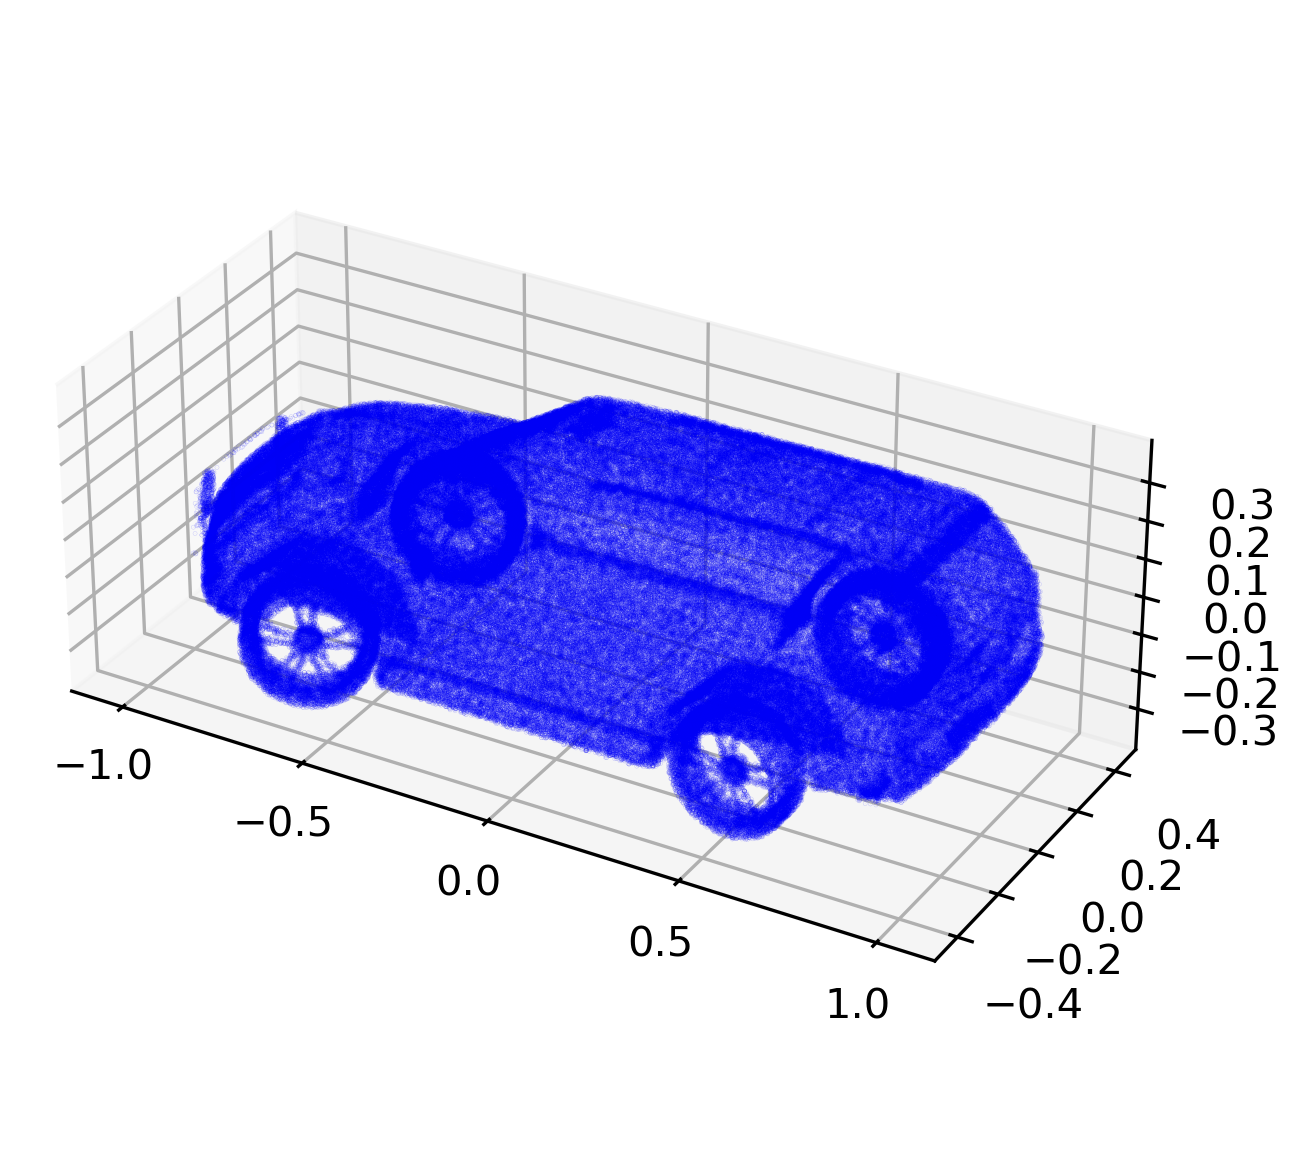

In [10]:
#data = np.load("/home/turbo/Qian/Triplane/cars/npys/" + np.random.choice(os.listdir("/home/turbo/Qian/Triplane/cars/npys")))
data = np.load("/home/turbo/Qian/Triplane/cars/npys_stage1/" + os.listdir('/home/turbo/Qian/Triplane/cars/npys_stage1')[0])
idx_ = np.random.randint(0,data.shape[0]//2, 1000000)
idx = []
for i in idx_: 
    if data[i,-1] == 1: 
        idx.append(i)
idx = np.array(idx)


fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')

ax.scatter(data[idx,0], data[idx,1], data[idx,2], color='b',alpha=0.2,s=0.01)
#ax.view_init(-140, 60)
plt.axis('scaled')

In [22]:
root_path_occ_npy = '/home/turbo/Qian/Triplane/cars/npys/'

list_stl_file = os.listdir(root_path_occ_npy )

In [30]:
data = np.load('/home/turbo/Qian/Triplane/cars/npys/'+ np.random.choice(list_stl_file))

(-1.099072552525986,
 1.0988677206351274,
 -0.4324998067830529,
 0.43390856816488793,
 -0.33554778369798044,
 0.335568206624498)

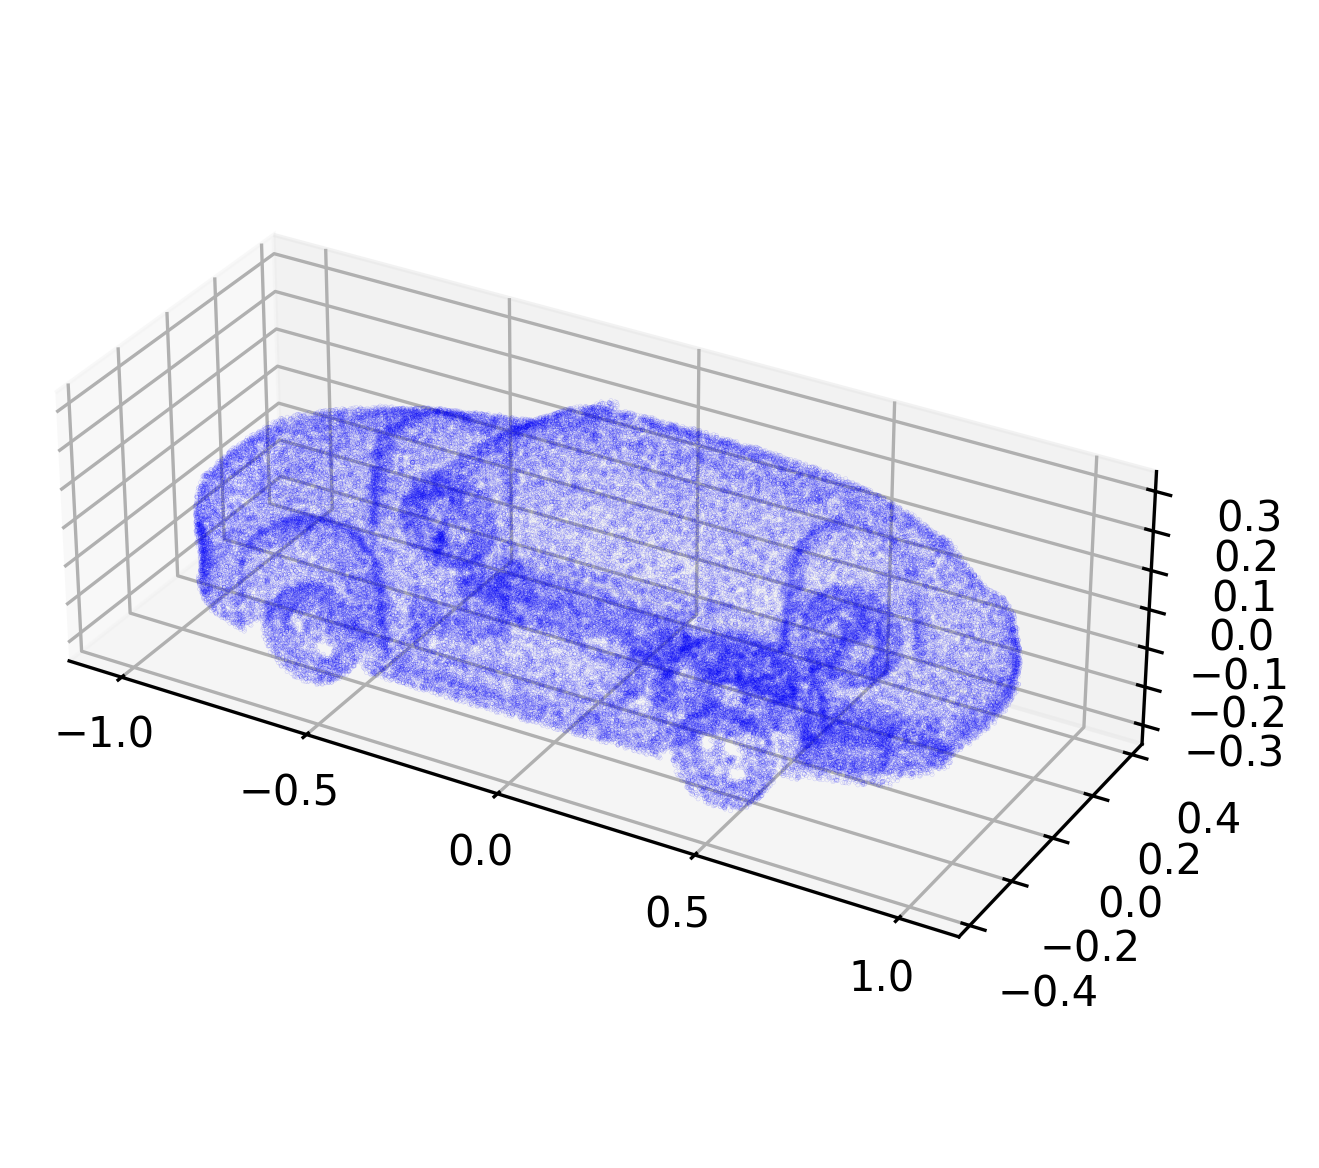

In [31]:
idx_ = np.random.randint(0,data.shape[0]//2, 200000)
idx = []
for i in idx_: 
    if data[i,-1] == 1: 
        idx.append(i)
idx = np.array(idx)


fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')

ax.scatter(data[idx,0], data[idx,1], data[idx,2], color='b',alpha=0.2,s=0.01)
plt.axis('scaled')